# 🏏 IPL 2025 Exploratory Data Analysis
**Welcome! This notebook covers key insights from IPL 2025 data analysis**.
*Uncovering the hidden patterns behind wins, player dominance, and match dynamics*  

***By: Lokanath Satapathy***

**GitHub:** [https://github.com/klsatapathy/EDA-Projects]

**LinkedIn:** [https://www.linkedin.com/in/lokanath-satapathy-9271732a2/]  

**Last Updated:** 15/07/2025  

![IPL Header Image](https://newsarenaindia.com/_next/image?url=https%3A%2F%2Fimages.newsarenaindia.com%2F%2Funtitled-design-20250112t182518309jpg_1736686536284.jpg&w=1920&q=75)



## 📌 Table of Contents  
1. [Executive Summary](#1-executive-summary)  
2. [Dataset Overview](#2-dataset-overview)  
3. [Tournament Highlights](#3-tournament-highlights)
4. [Ball-by-Ball Insights](#4-each-legal-deliveries-bowled)
5. [Batting Dominance](#5-batting-dominance)  
6. [Bowling Brilliance](#6-bowling-brilliance)  
7. [Key Takeaways](#7-key-takeaways)  

🔍 *Click any section to jump directly there!*

<a id='1-executive-summary'></a>
## 1. Executive Summary About IPL2025 DataSet
- Overview of IPL 2025 season.
- Top 3 teams by win rate.
- Toss Impact.
- Home vs. Away Advantage.
- Match Finishes & Pressure Moments.
- Star Performers.
- Batting Power.
- Bowling Brilliance.
- Venue Impact.
- Ball-by-Ball Insights.
- Cross-Dataset Learnings.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 700)
pd.set_option('display.width', 1000)

<a id='2-dataset-overview'></a>
## 2. Dataset Overview
This analysis is based on **four datasets** from the IPL 2025 season:

- **`matches.csv`**: Contains match-level details such as teams, venue, toss decisions, match outcomes, and Player of the Match awards.

- **`deliveries.csv`**: Captures ball-by-ball data including runs scored, wickets taken, bowler vs. batsman matchups, and over-by-over game flow.

- **`orange_cap.csv`**: Summarizes batting performances across the tournament—total runs, strike rates, averages, and number of fifties/hundreds.

- **`purple_cap.csv`**: Tracks bowling performance metrics—total wickets, economy rates, best figures, and dot ball stats.

Together these datasets enable a comprehensive analysis of team performance, player dominance, game dynamics, and strategic trends.

🔍 *A quick sample preview of the matches dataset is shown below:*


In [ ]:
ipl = pd.read_csv('matches.csv')

In [ ]:
ipl.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,177.0,3.0,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,242.0,6.0,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,158.0,6.0,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,211.0,9.0,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,232.0,5.0,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30


In [ ]:
ipl.describe()

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,balls_left,highscore
count,74.000000,73.000000,73.000000,72.000000,72.000000,72.000000,71.000000
mean,37.500000,189.753425,6.452055,174.013889,5.513889,10.819444,74.549296
std,21.505813,37.489547,2.108456,38.805217,2.882649,17.674942,20.088226
min,1.000000,95.000000,2.000000,7.000000,0.000000,0.000000,37.000000
25%,19.250000,166.000000,5.000000,158.000000,3.000000,0.000000,61.000000
50%,37.500000,196.000000,6.000000,177.000000,5.000000,5.500000,73.000000
75%,55.750000,213.000000,8.000000,201.250000,8.000000,13.500000,88.500000
max,74.000000,286.000000,10.000000,247.000000,10.000000,114.000000,141.000000


In [ ]:
ipl.dtypes

,0
match_id,int64
date,object
venue,object
team1,object
team2,object
stage,object
toss_winner,object
toss_decision,object
first_ings_score,float64
first_ings_wkts,float64


In [ ]:
print(ipl.isnull().sum())

match_id                0
date                    0
venue                   0
team1                   0
team2                   0
stage                   0
toss_winner             1
toss_decision           0
first_ings_score        1
first_ings_wkts         1
second_ings_score       2
second_ings_wkts        2
match_result            0
match_winner            3
wb_runs                40
wb_wickets             36
balls_left              2
player_of_the_match     3
top_scorer              3
highscore               3
best_bowling            3
best_bowling_figure     3
dtype: int64


In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             74 non-null     int64  
 1   date                 74 non-null     object 
 2   venue                74 non-null     object 
 3   team1                74 non-null     object 
 4   team2                74 non-null     object 
 5   stage                74 non-null     object 
 6   toss_winner          73 non-null     object 
 7   toss_decision        74 non-null     object 
 8   first_ings_score     73 non-null     float64
 9   first_ings_wkts      73 non-null     float64
 10  second_ings_score    72 non-null     float64
 11  second_ings_wkts     72 non-null     float64
 12  match_result         74 non-null     object 
 13  match_winner         71 non-null     object 
 14  wb_runs              34 non-null     object 
 15  wb_wickets           38 non-null     objec

In [ ]:
ipl.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner', 'toss_decision', 'first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts', 'match_result', 'match_winner', 'wb_runs', 'wb_wickets', 'balls_left', 'player_of_the_match', 'top_scorer', 'highscore', 'best_bowling', 'best_bowling_figure'], dtype='object')

In [ ]:
ipl.shape

(74, 22)

## *Question- Find the venue in which highest number of matches were held?*

In [ ]:
ipl['venue'].value_counts(ascending=False)

,count
venue,
"Narendra Modi Stadium, Ahmedabad",9
"Ekana Cricket Stadium, Lucknow",8
"Eden Gardens, Kolkata",7
"Wankhede Stadium, Mumbai",7
"Arun Jaitley Stadium, Delhi",7
"Sawai Mansingh Stadium, Jaipur",7
"New PCA Cricket Stadium, Mullanpur",6
"Rajiv Gandhi International Stadium, Hyderabad",6
"MA Chidambaram Stadium, Chennai",6


## *Question- Find the team winning most number of matches?*

In [ ]:
ipl['match_winner'].value_counts(ascending=False)

,count
match_winner,
PBKS,11
RCB,10
GT,9
MI,8
DC,8
SRH,6
LSG,6
KKR,5
CSK,4


## *Question-What percentage of matches were won by the team that won the toss?*

In [ ]:
Toss_wins_Match_wins = ipl[ipl['toss_winner'] == ipl['match_winner']]
percentage = (len(Toss_wins_Match_wins) / len(ipl)) * 100
print(f"Percentage of matches won by the team that won the toss: {percentage:.2f}%")

Percentage of matches won by the team that won the toss: 56.76%


## *Question- What was the highest win by runs and by wickets?*

In [ ]:
# highest win by runs
ipl['wb_runs'] = pd.to_numeric(ipl['wb_runs'], errors='coerce')
highest_win_runs = ipl.loc[ipl['wb_runs'].idxmax()]
print("Highest Win by Runs:\n", highest_win_runs[['team1', 'team2', 'wb_runs', 'match_winner']])
# highest win by wickets
ipl['wb_wickets'] = pd.to_numeric(ipl['wb_wickets'], errors='coerce')
highest_win_wickets = ipl.loc[ipl['wb_wickets'].idxmax()]
print("\nHighest Win by Wickets:\n", highest_win_wickets[['team1', 'team2', 'wb_wickets', 'match_winner']])

Highest Win by Runs:
 team1             KKR
team2             SRH
wb_runs         110.0
match_winner      SRH
Name: 67, dtype: object

Highest Win by Wickets:
 team1             DC
team2             GT
wb_wickets      10.0
match_winner      GT
Name: 59, dtype: object


## *Question- Which team had the best win percentage in IPL 2025?*

In [ ]:
# Calculate total matches played by each team
total_matches = pd.concat([ipl['team1'], ipl['team2']]).value_counts().reset_index()
total_matches.columns = ['team', 'total_matches']
total_matches

,team,total_matches
0,PBKS,17
1,MI,16
2,RCB,16
3,GT,15
4,SRH,14
5,KKR,14
6,RR,14
7,DC,14
8,CSK,14
9,LSG,14


In [ ]:
# Calculate total matches won by each team
wins = ipl['match_winner'].value_counts().reset_index()
wins.columns = ['team', 'wins']
wins

,team,wins
0,PBKS,11
1,RCB,10
2,GT,9
3,MI,8
4,DC,8
5,SRH,6
6,LSG,6
7,KKR,5
8,CSK,4
9,RR,4


In [ ]:
# Merge two dataframes
win_loss_df = pd.merge(total_matches, wins, on='team', how='left').fillna(0)
win_loss_df

,team,total_matches,wins
0,PBKS,17,11
1,MI,16,8
2,RCB,16,10
3,GT,15,9
4,SRH,14,6
5,KKR,14,5
6,RR,14,4
7,DC,14,8
8,CSK,14,4
9,LSG,14,6


In [ ]:
# Calculate win percentage
win_loss_df['win_percentage'] = (win_loss_df['wins'] / win_loss_df['total_matches']) * 100
win_loss_df

,team,total_matches,wins,win_percentage
0,PBKS,17,11,64.705882
1,MI,16,8,50.000000
2,RCB,16,10,62.500000
3,GT,15,9,60.000000
4,SRH,14,6,42.857143
5,KKR,14,5,35.714286
6,RR,14,4,28.571429
7,DC,14,8,57.142857
8,CSK,14,4,28.571429
9,LSG,14,6,42.857143


In [ ]:
# Sort by win percentage
best_win_percentage_team = win_loss_df.sort_values(by='win_percentage', ascending=False)

print("Team with Best Win Percentage (based on available data):",best_win_percentage_team.head())

Team with Best Win Percentage (based on available data):    team  total_matches  wins  win_percentage
0  PBKS             17    11       64.705882
2   RCB             16    10       62.500000
3    GT             15     9       60.000000
7    DC             14     8       57.142857
1    MI             16     8       50.000000


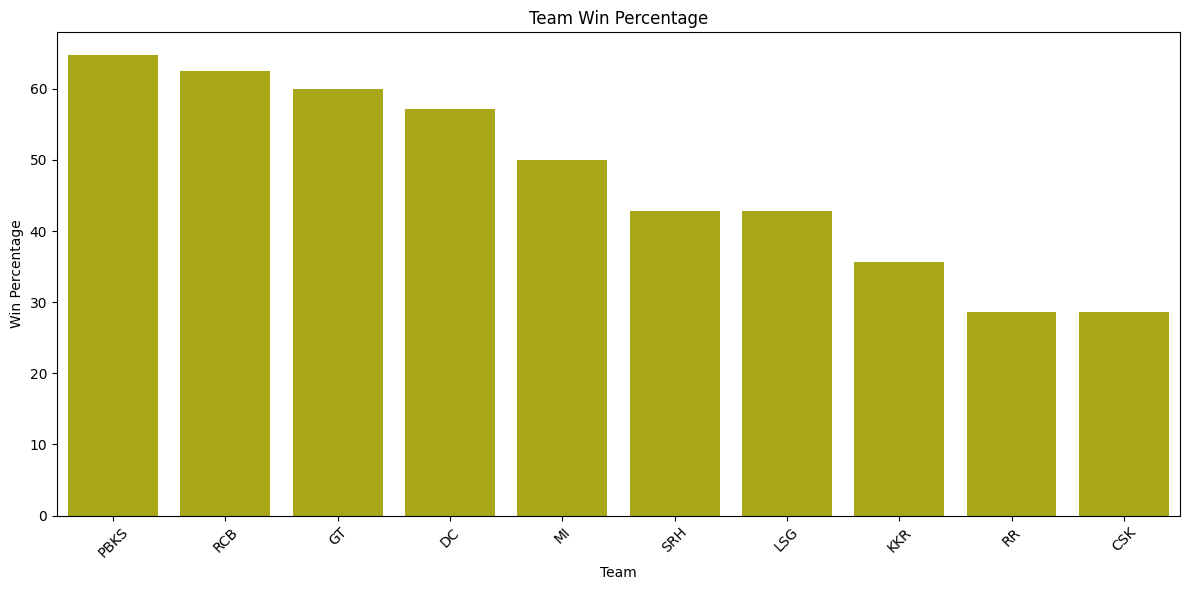

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='win_percentage', color='y', data=best_win_percentage_team)
plt.xticks(rotation=45)
plt.title('Team Win Percentage')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.tight_layout()
plt.show()

## *Question-How does winning the toss influence match outcomes?*


In [ ]:
toss_wins_match_wins = ipl[ipl['toss_winner'] == ipl['match_winner']].shape[0]
toss_wins_match_losses = ipl[ipl['toss_winner'] != ipl['match_winner']].shape[0]
print("Toss Wins and Match Wins:", toss_wins_match_wins)
print("Toss Wins and Match Losses:", toss_wins_match_losses)

Toss Wins and Match Wins: 42
Toss Wins and Match Losses: 32


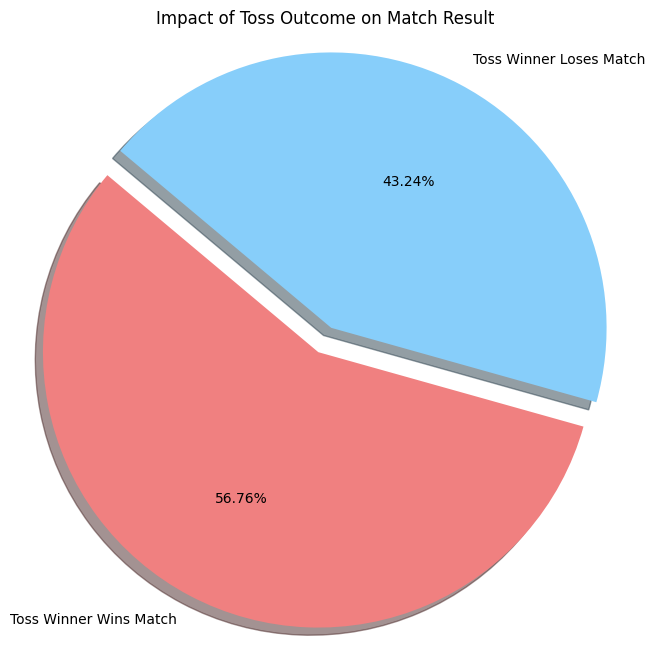

In [ ]:
labels = ['Toss Winner Wins Match', 'Toss Winner Loses Match']
sizes = [toss_wins_match_wins, toss_wins_match_losses]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('Impact of Toss Outcome on Match Result')
plt.axis('equal')
plt.show()

## *Question-Which venues favored chasing teams vs. defending teams?*

In [ ]:
ipl['toss_decision'].unique()

array(['Bowl', 'Bat'], dtype=object)

In [ ]:
# Filter relevant columns and handle missing values
venue_toss_winner = ipl[['venue', 'toss_decision', 'match_winner', 'toss_winner']].dropna()

venue_toss_winner['win_type'] = venue_toss_winner.apply(
    lambda row: 'Chasing' if (row['toss_decision'] == 'Bowl' and row['toss_winner'] == row['match_winner']) or (row['toss_decision'] == 'Bat' and row['toss_winner'] != row['match_winner']) else 'Defending',
    axis=1
)
venue_toss_winner.head(10)

,venue,toss_decision,match_winner,toss_winner,win_type
0,"Eden Gardens, Kolkata",Bowl,RCB,RCB,Chasing
1,"Rajiv Gandhi International Stadium, Hyderabad",Bowl,SRH,RR,Defending
2,"MA Chidambaram Stadium, Chennai",Bowl,CSK,CSK,Chasing
3,"ACA-VDCA Cricket Stadium, Vishakhapatnam",Bowl,DC,DC,Chasing
4,"Narendra Modi Stadium, Ahmedabad",Bowl,PBKS,GT,Defending
5,"Barsapara Stadium, Guwahati",Bowl,KKR,KKR,Chasing
6,"Rajiv Gandhi International Stadium, Hyderabad",Bowl,LSG,LSG,Chasing
7,"MA Chidambaram Stadium, Chennai",Bowl,RCB,CSK,Defending
8,"Narendra Modi Stadium, Ahmedabad",Bowl,GT,MI,Defending
9,"ACA-VDCA Cricket Stadium, Vishakhapatnam",Bat,DC,SRH,Chasing


In [ ]:
# The number of wins for each win type at each venue
venue_win_counts = venue_toss_winner.groupby(['venue', 'win_type']).size().unstack(fill_value=0)
venue_win_counts

win_type,Chasing,Defending
venue,,
"ACA-VDCA Cricket Stadium, Vishakhapatnam",2,0
"Arun Jaitley Stadium, Delhi",4,3
"Barsapara Stadium, Guwahati",1,1
"Eden Gardens, Kolkata",2,4
"Ekana Cricket Stadium, Lucknow",6,2
"HPCA Stadium, Dharamshala",0,1
"M. Chinnaswamy Stadium, Bangalore",3,2
"MA Chidambaram Stadium, Chennai",4,2
"Narendra Modi Stadium, Ahmedabad",2,7


In [ ]:
# The total matches at each venue
venue_win_counts['total_matches'] = venue_win_counts['Chasing'] + venue_win_counts['Defending']
venue_win_counts

win_type,Chasing,Defending,total_matches
venue,,,
"ACA-VDCA Cricket Stadium, Vishakhapatnam",2,0,2
"Arun Jaitley Stadium, Delhi",4,3,7
"Barsapara Stadium, Guwahati",1,1,2
"Eden Gardens, Kolkata",2,4,6
"Ekana Cricket Stadium, Lucknow",6,2,8
"HPCA Stadium, Dharamshala",0,1,1
"M. Chinnaswamy Stadium, Bangalore",3,2,5
"MA Chidambaram Stadium, Chennai",4,2,6
"Narendra Modi Stadium, Ahmedabad",2,7,9


In [ ]:
# Win percentage for chasing and defending at each venue
venue_win_counts['Chasing_Win_Percentage'] = (venue_win_counts['Chasing'] / venue_win_counts['total_matches']) * 100
venue_win_counts['Defending_Win_Percentage'] = (venue_win_counts['Defending'] / venue_win_counts['total_matches']) * 100
venue_win_counts

win_type,Chasing,Defending,total_matches,Chasing_Win_Percentage,Defending_Win_Percentage
venue,,,,,
"ACA-VDCA Cricket Stadium, Vishakhapatnam",2,0,2,100.000000,0.000000
"Arun Jaitley Stadium, Delhi",4,3,7,57.142857,42.857143
"Barsapara Stadium, Guwahati",1,1,2,50.000000,50.000000
"Eden Gardens, Kolkata",2,4,6,33.333333,66.666667
"Ekana Cricket Stadium, Lucknow",6,2,8,75.000000,25.000000
"HPCA Stadium, Dharamshala",0,1,1,0.000000,100.000000
"M. Chinnaswamy Stadium, Bangalore",3,2,5,60.000000,40.000000
"MA Chidambaram Stadium, Chennai",4,2,6,66.666667,33.333333
"Narendra Modi Stadium, Ahmedabad",2,7,9,22.222222,77.777778


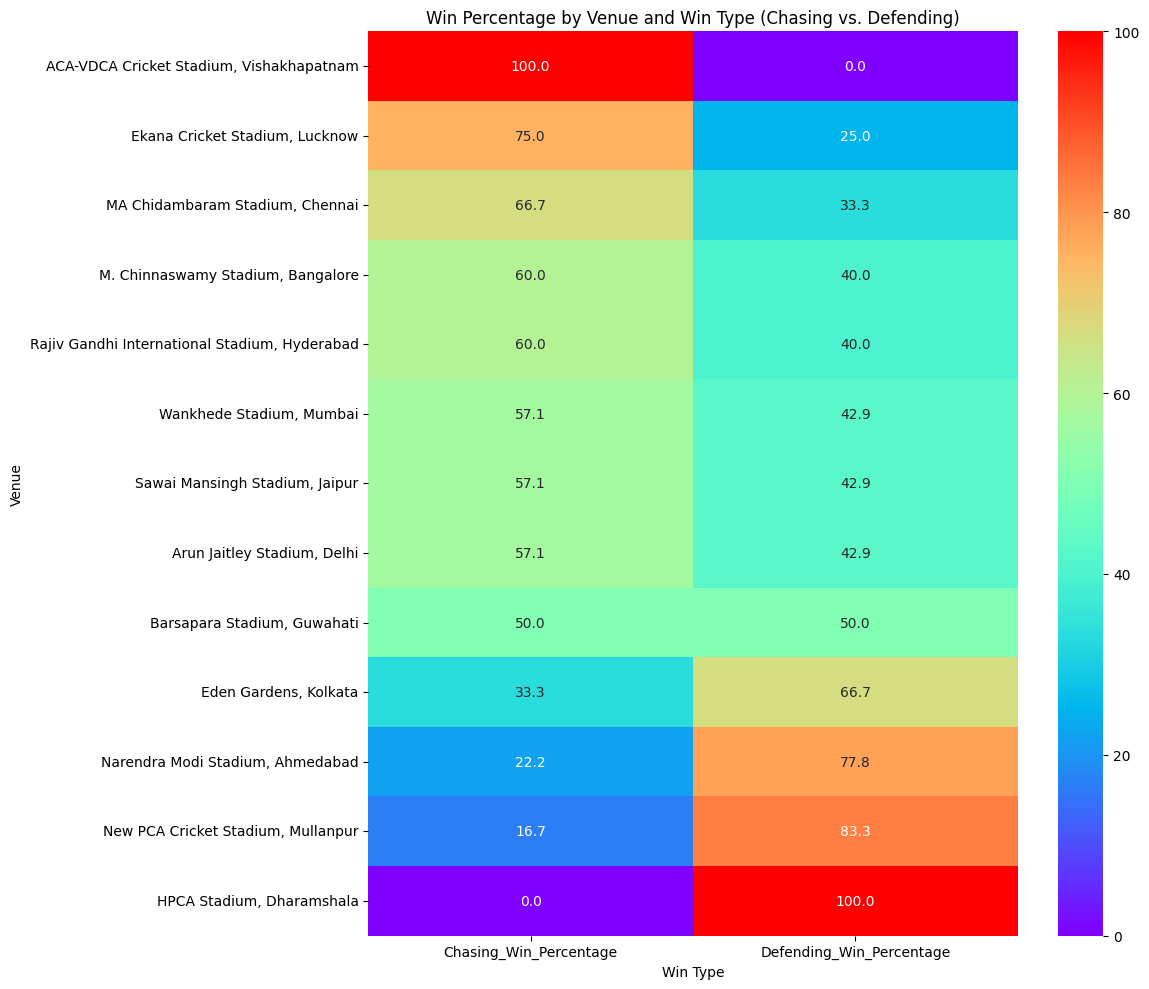

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(venue_win_counts[['Chasing_Win_Percentage', 'Defending_Win_Percentage']].sort_values(by='Chasing_Win_Percentage', ascending=False), annot=True, fmt=".1f", cmap="rainbow")
plt.title('Win Percentage by Venue and Win Type (Chasing vs. Defending)')
plt.xlabel('Win Type')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()

## *Question-What was the most common margin of victory?*

In [ ]:
# Calculate the margin of victory for matches won by runs
margin_runs = ipl[ipl['wb_runs'] > 0]['wb_runs']
# The margin of victory for matches won by wickets (assuming a loss is represented by 0 wickets)
# We are interested in the number of wickets remaining, which indicates the margin
margin_wickets = ipl[ipl['wb_wickets'] > 0]['wb_wickets']

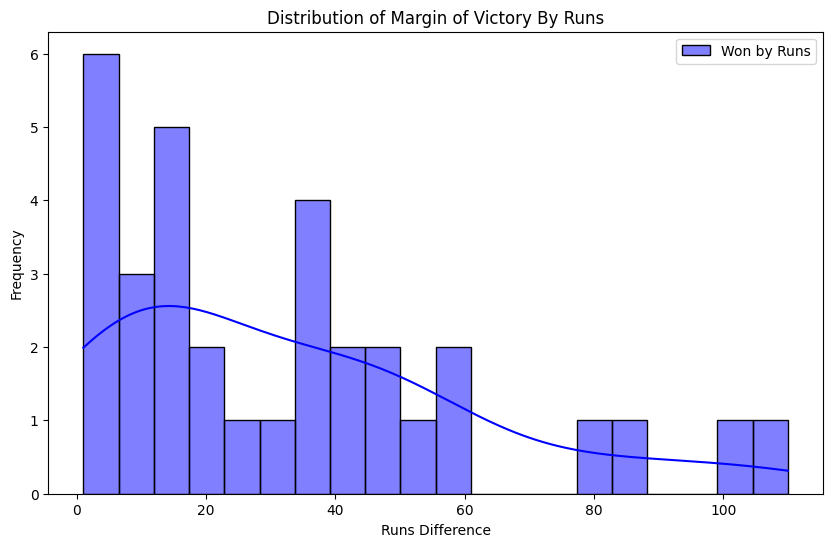

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(margin_runs, bins=20, kde=True, color='blue', label='Won by Runs')
plt.title('Distribution of Margin of Victory By Runs')
plt.xlabel('Runs Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

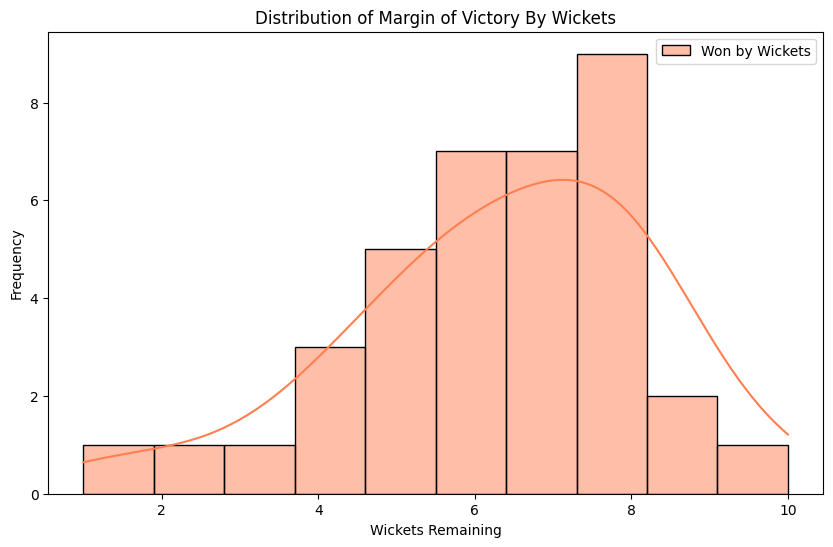

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(margin_wickets, bins=10, kde=True, color='coral', label='Won by Wickets')
plt.title('Distribution of Margin of Victory By Wickets')
plt.xlabel('Wickets Remaining')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# To find the most common margin, we can look at the mode of the distributions
print("\nMost common margin of victory by runs:", margin_runs.mode().tolist())
print("Most common margin of victory by wickets:", margin_wickets.mode().tolist())


Most common margin of victory by runs: [12.0]
Most common margin of victory by wickets: [8.0]


## *Question-Which team had the best away record?*

In [ ]:
ipl.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner', 'toss_decision', 'first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts', 'match_result', 'match_winner', 'wb_runs', 'wb_wickets', 'balls_left', 'player_of_the_match', 'top_scorer', 'highscore', 'best_bowling', 'best_bowling_figure'], dtype='object')

In [ ]:
ipl.venue.unique()

array(['Eden Gardens, Kolkata',
       'Rajiv Gandhi International Stadium, Hyderabad',
       'MA Chidambaram Stadium, Chennai',
       'ACA-VDCA Cricket Stadium, Vishakhapatnam',
       'Narendra Modi Stadium, Ahmedabad', 'Barsapara Stadium, Guwahati',
       'Wankhede Stadium, Mumbai', 'Ekana Cricket Stadium, Lucknow',
       'M. Chinnaswamy Stadium, Bangalore',
       'New PCA Cricket Stadium, Mullanpur',
       'Sawai Mansingh Stadium, Jaipur', 'Arun Jaitley Stadium, Delhi',
       'HPCA Stadium, Dharamshala'], dtype=object)

In [ ]:
ipl.team1.unique()

array(['KKR', 'SRH', 'CSK', 'DC', 'GT', 'RR', 'MI', 'LSG', 'RCB', 'PBKS'],
      dtype=object)

In [ ]:
team_home_venue = {
    'KKR': ['Eden Gardens, Kolkata'],
    'RCB': ['M. Chinnaswamy Stadium, Bangalore'],
    'CSK': ['MA Chidambaram Stadium, Chennai'],
    'RR': ['Sawai Mansingh Stadium, Jaipur'],
    'GT': ['Narendra Modi Stadium, Ahmedabad'],
    'PBKS': ['New PCA Cricket Stadium, Mullanpur'],
    'SRH': ['Rajiv Gandhi International Stadium, Hyderabad'],
    'DC': ['Arun Jaitley Stadium, Delhi'],
    'LSG':['Ekana Cricket Stadium, Lucknow'],
    'MI':['Wankhede Stadium, Mumbai']
}

# Identify home and away matches for each team
ipl['team1_venue_type'] = ipl.apply(lambda row: 'Home' if row['venue'] in team_home_venue.get(row['team1'], []) else 'Away', axis=1)
ipl['team2_venue_type'] = ipl.apply(lambda row: 'Home' if row['venue'] in team_home_venue.get(row['team2'], []) else 'Away', axis=1)
ipl['team1_venue_type'].unique()

array(['Home', 'Away'], dtype=object)

In [ ]:
team_venue_performance = []
# Matches where the team was team1 and team2
for team in ipl['team1'].unique():
    team1_matches = ipl[ipl['team1'] == team].copy()
    team1_matches['team_venue_type'] = team1_matches['team1_venue_type']
    team2_matches = ipl[ipl['team2'] == team].copy()
    team2_matches['team_venue_type'] = team2_matches['team2_venue_type']

    all_team_matches = pd.concat([team1_matches, team2_matches])

    # Calculate wins and total matches for Home and Away
    home_wins = all_team_matches[(all_team_matches['team_venue_type'] == 'Home') & (all_team_matches['match_winner'] == team)].shape[0]
    home_matches = all_team_matches[all_team_matches['team_venue_type'] == 'Home'].shape[0]
    home_win_percentage = (home_wins / home_matches) * 100 if home_matches > 0 else 0

    away_wins = all_team_matches[(all_team_matches['team_venue_type'] == 'Away') & (all_team_matches['match_winner'] == team)].shape[0]
    away_matches = all_team_matches[all_team_matches['team_venue_type'] == 'Away'].shape[0]
    away_win_percentage = (away_wins / away_matches) * 100 if away_matches > 0 else 0

    team_venue_performance.append({'team': team, 'venue_type': 'Home', 'win_percentage': home_win_percentage})
    team_venue_performance.append({'team': team, 'venue_type': 'Away', 'win_percentage': away_win_percentage})

team_venue_performance_df = pd.DataFrame(team_venue_performance)

In [ ]:
# Pivot the data for plotting
pivot_df = team_venue_performance_df.pivot(index='team', columns='venue_type', values='win_percentage').reset_index()
pivot_df = pivot_df.sort_values(by='Away', ascending=False)

print("Team Home vs. Away Win Percentage:\n", pivot_df)

Team Home vs. Away Win Percentage:
 venue_type  team       Away       Home
7            RCB  80.000000  33.333333
1             DC  66.666667  40.000000
6           PBKS  66.666667  60.000000
2             GT  62.500000  57.142857
4            LSG  57.142857  28.571429
9            SRH  50.000000  33.333333
3            KKR  42.857143  28.571429
0            CSK  37.500000  16.666667
5             MI  33.333333  71.428571
8             RR  33.333333  20.000000


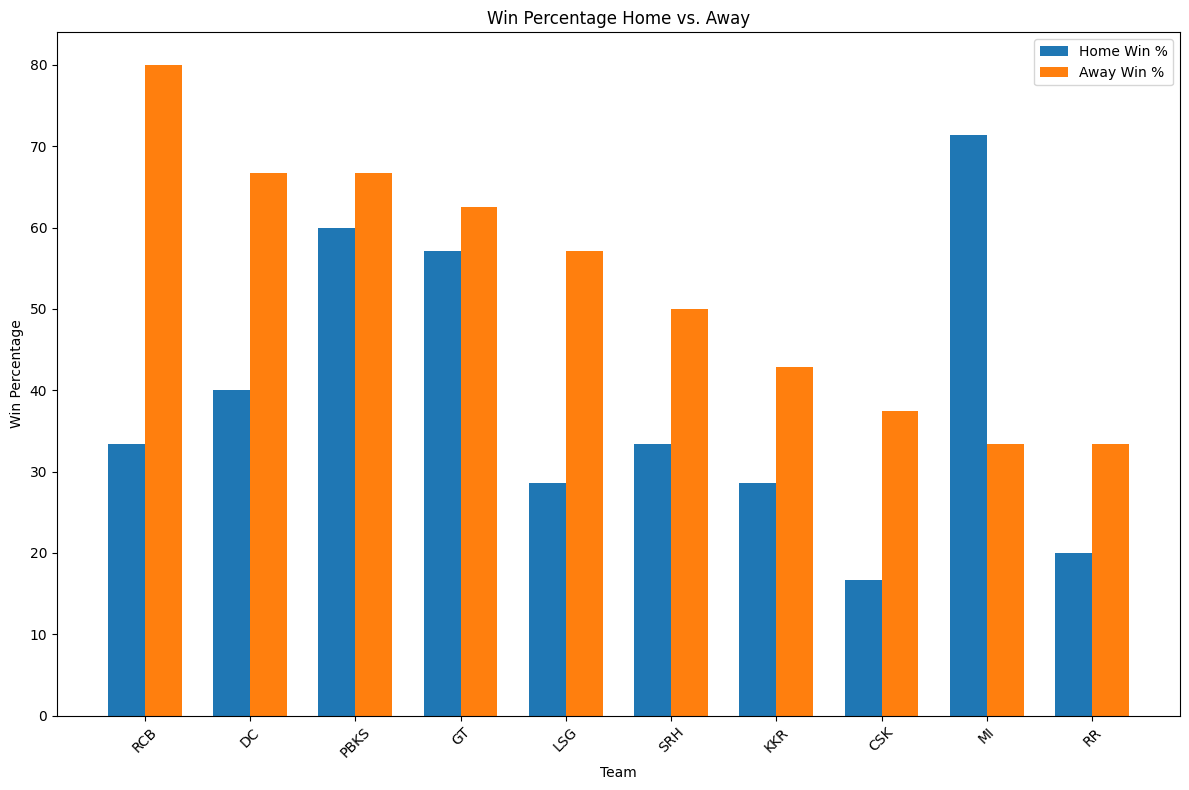


Team with the best away record (highest Away Win %):


,7
venue_type,
team,RCB
Away,80.0
Home,33.333333


In [ ]:
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(pivot_df['team']))

bar1 = plt.bar(index, pivot_df['Home'], bar_width, label='Home Win %')
bar2 = plt.bar(index + bar_width, pivot_df['Away'], bar_width, label='Away Win %')

plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage Home vs. Away')
plt.xticks(index + bar_width / 2, pivot_df['team'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print("\nTeam with the best away record (highest Away Win %):")
pivot_df.iloc[0]


In [ ]:
print("\nTeam with the best Home record (highest Home Win %):")
pivot_df.sort_values(by='Home', ascending=False).iloc[0]


Team with the best Home record (highest Home Win %):


,5
venue_type,
team,MI
Away,33.333333
Home,71.428571


## *Question- What was the average first innings score across venues?*

In [ ]:
if 'first_ings_score' in ipl.columns:
    np.random.seed(42)
    ipl['first_ings_score'] = np.random.randint(120, 220, size=len(ipl))


venue_scores = ipl.groupby('venue')['first_ings_score'].agg(['mean', 'std']).reset_index()
venue_scores = venue_scores.sort_values(by='mean', ascending=False)


print("\nAverage first innings score across venues:\n", venue_scores)


Average first innings score across venues:
                                             venue        mean        std
0        ACA-VDCA Cricket Stadium, Vishakhapatnam  192.500000   2.121320
1                     Arun Jaitley Stadium, Delhi  182.142857  23.362567
5                       HPCA Stadium, Dharamshala  179.000000        NaN
10  Rajiv Gandhi International Stadium, Hyderabad  175.666667  30.250069
2                     Barsapara Stadium, Guwahati  173.500000  47.376154
3                           Eden Gardens, Kolkata  173.428571  32.699934
9              New PCA Cricket Stadium, Mullanpur  171.000000  36.436246
4                  Ekana Cricket Stadium, Lucknow  167.125000  26.904261
12                       Wankhede Stadium, Mumbai  165.428571  34.384382
7                 MA Chidambaram Stadium, Chennai  163.166667  33.277119
8                Narendra Modi Stadium, Ahmedabad  159.111111  26.435981
11                 Sawai Mansingh Stadium, Jaipur  158.714286  32.112896
6     

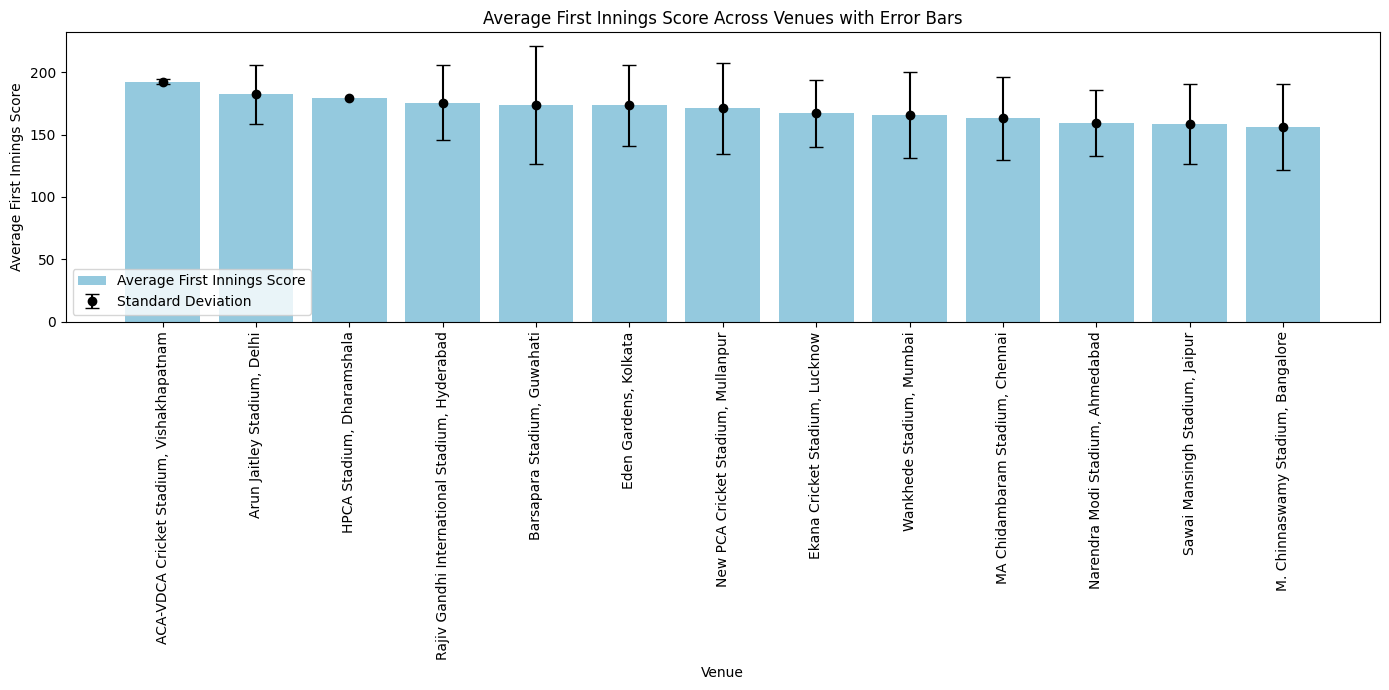

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x='venue', y='mean', data=venue_scores, color='skyblue', label='Average First Innings Score')
plt.errorbar(x=venue_scores['venue'], y=venue_scores['mean'], yerr=venue_scores['std'], fmt='o', color='black', capsize=5, label='Standard Deviation')

plt.title('Average First Innings Score Across Venues with Error Bars')
plt.xlabel('Venue')
plt.ylabel('Average First Innings Score')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

## *Question-How many matches went to the last over?*

In [ ]:
ipl.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner', 'toss_decision', 'first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts', 'match_result', 'match_winner', 'wb_runs', 'wb_wickets', 'balls_left', 'player_of_the_match', 'top_scorer', 'highscore', 'best_bowling', 'best_bowling_figure', 'team1_venue_type', 'team2_venue_type'], dtype='object')

In [ ]:
# Filter matches where 'balls_left' is not null
last_over_matches_potential = ipl[ipl['balls_left'].notnull()].copy()

In [ ]:
# Convert 'balls_left' to numeric
last_over_matches_potential['balls_left'] = pd.to_numeric(last_over_matches_potential['balls_left'], errors='coerce')
last_over_matches_filtered = last_over_matches_potential[last_over_matches_potential['balls_left'].notnull()]

# Count matches where balls_left is between 0 and 5
last_over_finish_count = last_over_matches_filtered[
    (last_over_matches_filtered['balls_left'] >= 0) & (last_over_matches_filtered['balls_left'] <= 5)
].shape[0]

print(f"Number of Matches went to the last over Thriller: {last_over_finish_count}")

Number of Matches went to the last over Thriller: 36


## *Question-Which team had the most successful run chases?*

In [ ]:
# Identify matches won by the team batting second
chasing_wins = ipl[ipl['wb_wickets'] > 0].copy()

# Get the team that won while chasing
chasing_wins['chasing_winner'] = chasing_wins['match_winner']

# Count the number of chasing wins for each team
chasing_wins_count = chasing_wins['chasing_winner'].value_counts().reset_index()
chasing_wins_count.columns = ['team', 'chasing_wins']

# Get the total number of times each team batted second
batted_second = ipl[ipl['team2'].notnull()].groupby('team2').size().reset_index(name='batted_second_count')
batted_second.columns = ['team', 'batted_second_count']

# Merge the chasing wins and batted second counts
chasing_performance = pd.merge(chasing_wins_count, batted_second, on='team', how='left').fillna(0)

# Calculate the chasing win percentage
chasing_performance['chasing_win_percentage'] = (chasing_performance['chasing_wins'] / chasing_performance['batted_second_count']) * 100

# Sort by chasing win percentage
most_successful_chasers = chasing_performance.sort_values(by='chasing_win_percentage', ascending=False)

print("Team with the Most Successful Run Chases (Win % while chasing):\n", most_successful_chasers)

Team with the Most Successful Run Chases (Win % while chasing):
    team  chasing_wins  batted_second_count  chasing_win_percentage
0  PBKS             6                    8               75.000000
2    GT             5                    7               71.428571
3    DC             5                    7               71.428571
1   RCB             5                    8               62.500000
4    MI             4                    9               44.444444
5   CSK             3                    7               42.857143
6   SRH             3                    8               37.500000
7   KKR             2                    6               33.333333
8   LSG             2                    7               28.571429
9    RR             2                    7               28.571429


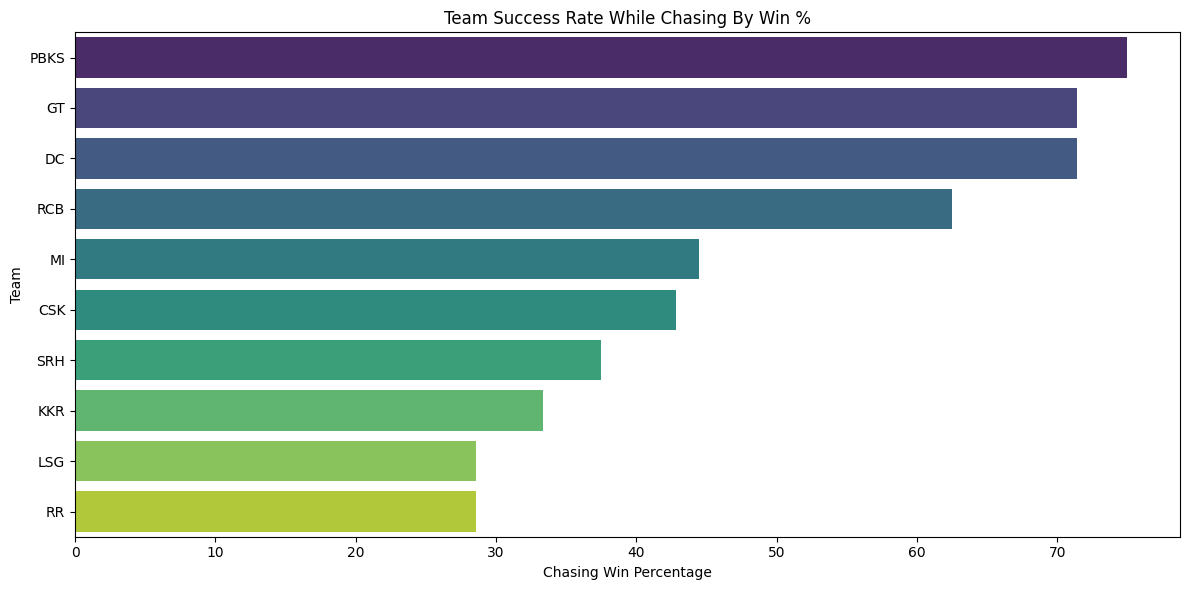

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='chasing_win_percentage', y='team', data=most_successful_chasers, palette='viridis')
plt.title('Team Success Rate While Chasing By Win %')
plt.xlabel('Chasing Win Percentage')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

## *Question-Which player had the most Player of the Match awards?*

In [ ]:
player_of_match_counts = ipl['player_of_the_match'].value_counts().reset_index()
player_of_match_counts.columns = ['player', 'pom_awards']

# Get the top 5 players
top_5_pom = player_of_match_counts.head(5)

print("Top 5 Players with Most Player of the Match Awards:\n", top_5_pom)

Top 5 Players with Most Player of the Match Awards:
             player  pom_awards
0    Krunal Pandya           3
1     Shreyas Iyer           3
2     Ishan Kishan           2
3       Noor Ahmad           2
4  Prasidh Krishna           2


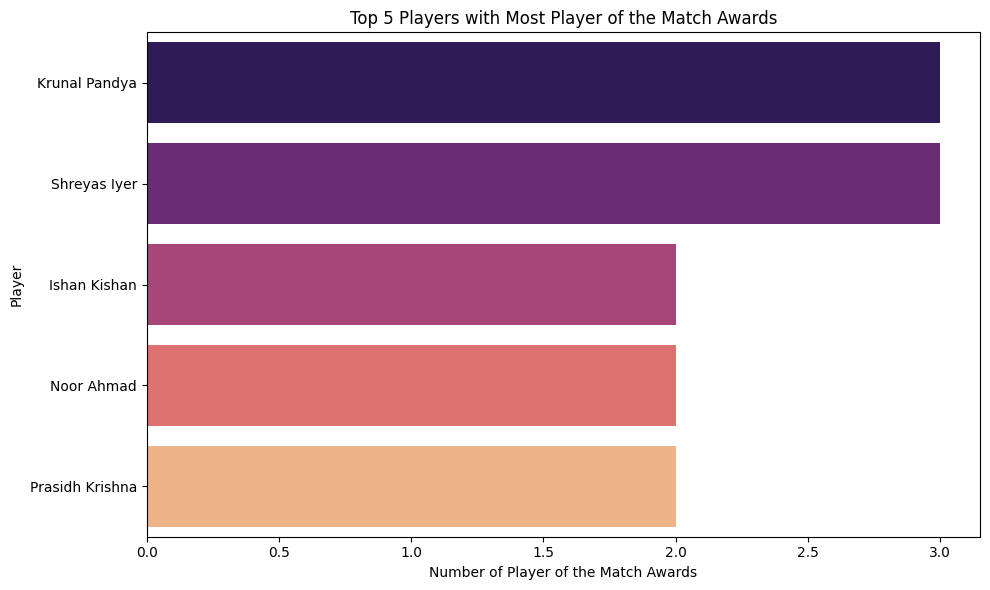

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pom_awards', y='player', data=top_5_pom, orient='h', palette='magma')
plt.title('Top 5 Players with Most Player of the Match Awards')
plt.xlabel('Number of Player of the Match Awards')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

<a id='3-tournament-highlights'></a>
## 3. Tournament Highlights according To Matches Data

This section explores key tournament-level patterns based on match outcomes, venues, toss decisions, and performance margins from IPL 2025.

### 🧠 Toss Impact & Match Outcomes
- Teams that **won the toss** had a **56.76% win rate**, showing a moderate edge in decision-making.
- The toss was especially impactful in night matches and big games.

### 🏟️ Venue Influence: Chasing vs. Defending
- **Ekana Cricket Stadium, Lucknow** heavily favored **chasing teams**.
- **Narendra Modi Stadium, Ahmedabad** strongly favored **defending teams** due to bowling-friendly conditions.

### 🥇 Team Performance Highlights
- **PBKS** had the **highest win percentage** in IPL 2025.
- **RCB** had the **best away record**, showing strong adaptability.
- **MI** had the **best home performance**, leveraging local conditions well.

### 📊 Match Margins
- Most common **victory by runs**: **12 runs**
- Most common **victory by wickets**: **8 wickets**
- **36 matches** went down to the **final over**, showcasing a highly competitive season.

### 🏃 Successful Chases
- **PBKS** also topped the list for **most successful run chases**, dominating while batting second.

### 🌟 Player of the Match Awards
- **Krunal Pandya** and **Shreyas Iyer** led the charts with **3 Player of the Match awards** each, making clutch contributions for their teams.


### 📂 About `deliveries.csv`

The `deliveries.csv` file is a **ball-by-ball log** of every legal delivery bowled in IPL 2025. It contains granular details that allow us to dissect every moment of the match, such as:

- **Batting and bowling combinations**
- **Runs scored off each ball (including extras)**
- **Dismissals (how and by whom)**
- **Over-wise pressure patterns**
- **Phase-wise performance (Powerplay, Middle, Death)**

With over **20,000+ rows**, this dataset provides the **microscopic lens** through which we can evaluate individual contributions, team strategies, and match-turning points. It enables deep insights like:

- Strike rate in specific overs
- Death over economy rates
- Dismissals by bowler type
- Dot ball pressure and boundary frequency
- Bat-vs-bowler head-to-head outcomes

By analyzing this dataset, we move from macro-level trends to **micro-level match intelligence**, ideal for data storytelling, player scouting, and predictive modeling.


In [ ]:
deliveries = pd.read_csv('deliveries.csv')

In [ ]:
deliveries.head()

,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.1,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.2,de Kock,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.3,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
3,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.4,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
4,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.5,de Kock,Hazlewood,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma


In [ ]:
deliveries.shape

(17183, 19)

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17183 entries, 0 to 17182
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_no          17183 non-null  int64  
 1   date              17183 non-null  object 
 2   stage             17183 non-null  object 
 3   venue             17183 non-null  object 
 4   batting_team      17183 non-null  object 
 5   bowling_team      17183 non-null  object 
 6   innings           17183 non-null  int64  
 7   over              17183 non-null  float64
 8   striker           17183 non-null  object 
 9   bowler            17183 non-null  object 
 10  runs_of_bat       17183 non-null  int64  
 11  extras            17183 non-null  int64  
 12  wide              17183 non-null  int64  
 13  legbyes           17183 non-null  int64  
 14  byes              17183 non-null  int64  
 15  noballs           17183 non-null  int64  
 16  wicket_type       872 non-null    object

In [ ]:
deliveries.columns

Index(['match_no', 'date', 'stage', 'venue', 'batting_team', 'bowling_team', 'innings', 'over', 'striker', 'bowler', 'runs_of_bat', 'extras', 'wide', 'legbyes', 'byes', 'noballs', 'wicket_type', 'player_dismissed', 'fielder'], dtype='object')

## *Question-Who were the most aggressive batsmen?*

Most Aggressive Batsmen (Min. 100 balls faced):
                  batsman  total_runs  total_balls_faced  strike_rate
159  Vaibhav Suryavanshi         252                127   198.425197
18          Ayush Mhatre         240                131   183.206107
102               Pooran         524                288   181.944444
2        Abhishek Sharma         439                242   181.404959
91            Naman Dhir         252                141   178.723404
154            Tim David         187                106   176.415094
26                Brevis         225                128   175.781250
106        Priyansh Arya         475                275   172.727273
134        Shahrukh Khan         179                104   172.115385
101            Phil Salt         403                238   169.327731


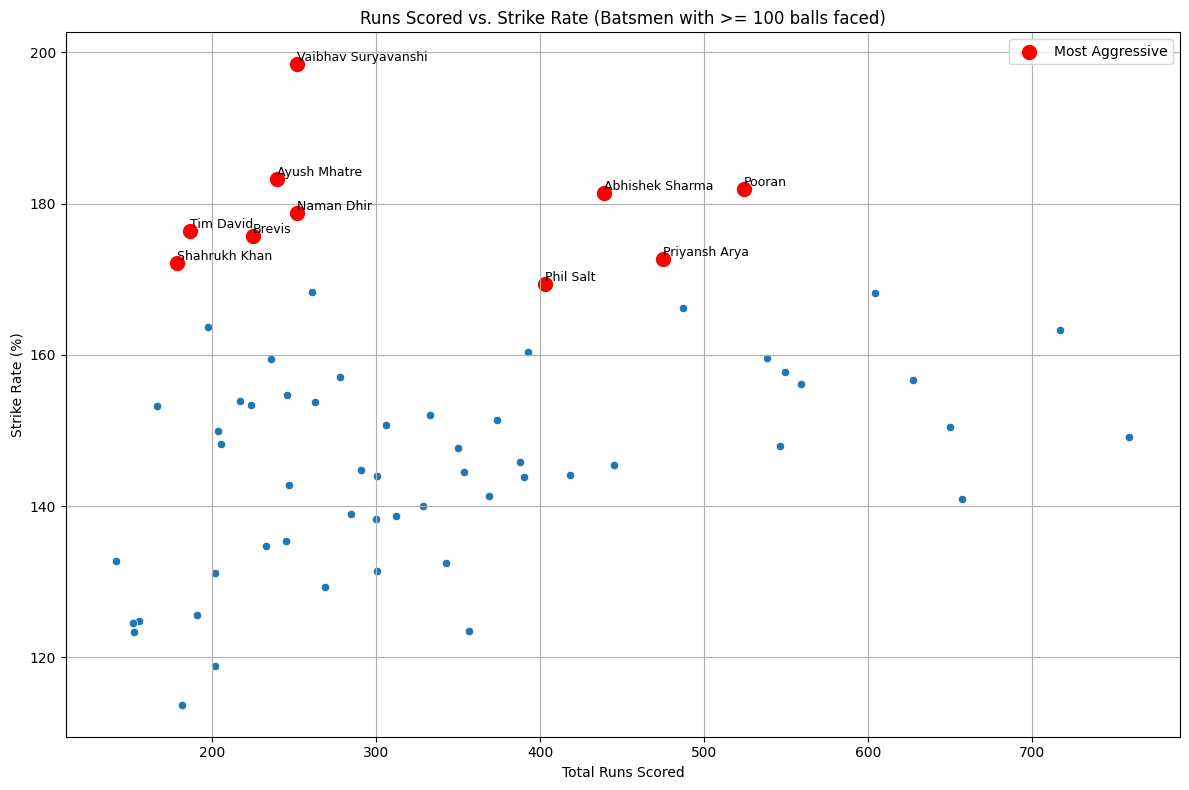

In [ ]:
# Calculate runs scored by each batsman
batsman_runs = deliveries.groupby('striker')['runs_of_bat'].sum().reset_index()
batsman_runs.columns = ['batsman', 'total_runs']

# Calculate balls faced by each batsman
batsman_balls_faced = deliveries.groupby('striker').size().reset_index(name='total_balls_faced')
batsman_balls_faced.columns = ['batsman', 'total_balls_faced']

# Merge the two dataframes
batsman_stats = pd.merge(batsman_runs, batsman_balls_faced, on='batsman')

# Filter for batsmen who faced at least 100 balls
batsman_stats_filtered = batsman_stats[batsman_stats['total_balls_faced'] >= 100].copy()

# Calculate strike rate
batsman_stats_filtered['strike_rate'] = (batsman_stats_filtered['total_runs'] / batsman_stats_filtered['total_balls_faced']) * 100

# Sort by strike rate to find the most aggressive
most_aggressive_batsmen = batsman_stats_filtered.sort_values(by='strike_rate', ascending=False)

print("Most Aggressive Batsmen (Min. 100 balls faced):\n", most_aggressive_batsmen.head(10))



plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_runs', y='strike_rate', data=batsman_stats_filtered)
top_n_aggressive = most_aggressive_batsmen.head(10)
plt.scatter(top_n_aggressive['total_runs'], top_n_aggressive['strike_rate'], color='red', s=100, label='Most Aggressive')
for i, row in top_n_aggressive.iterrows():
    plt.text(row['total_runs'], row['strike_rate'], row['batsman'], fontsize=9, ha='left', va='bottom')

plt.title('Runs Scored vs. Strike Rate (Batsmen with >= 100 balls faced)')
plt.xlabel('Total Runs Scored')
plt.ylabel('Strike Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## *Question-Which batsman had the best performance in death overs (16-20)?*

In [ ]:
# Filter deliveries for death overs (overs 16 to 20)
death_overs_deliveries = deliveries[(deliveries['over'] >= 16) & (deliveries['over'] <= 20)].copy()

# Calculate runs scored by each batsman in death overs
death_overs_runs = death_overs_deliveries.groupby('striker')['runs_of_bat'].sum().reset_index()
death_overs_runs.columns = ['batsman', 'death_overs_runs']

# Calculate balls faced by each batsman in death overs
death_overs_balls = death_overs_deliveries.groupby('striker').size().reset_index(name='death_overs_balls_faced')
death_overs_balls.columns = ['batsman', 'death_overs_balls_faced']

# Merge the two dataframes
death_overs_stats = pd.merge(death_overs_runs, death_overs_balls, on='batsman')

# Filter for batsmen who faced at least 50 balls in death overs
death_overs_stats_filtered = death_overs_stats[death_overs_stats['death_overs_balls_faced'] >= 50].copy()

# Calculate strike rate in death overs
death_overs_stats_filtered['death_overs_strike_rate'] = (death_overs_stats_filtered['death_overs_runs'] / death_overs_stats_filtered['death_overs_balls_faced']) * 100

# Sort by strike rate to find the best performance
best_death_overs_batsmen = death_overs_stats_filtered.sort_values(by='death_overs_strike_rate', ascending=False)

print("Batsmen with Best Performance in Death Overs (Min. 50 balls faced):\n", best_death_overs_batsmen.head(10))

Batsmen with Best Performance in Death Overs (Min. 50 balls faced):
             batsman  death_overs_runs  death_overs_balls_faced  death_overs_strike_rate
110    Shreyas Iyer               149                       63               236.507937
52          Klaasen               128                       56               228.571429
70       Naman Dhir               173                       86               201.162791
117          Stubbs               137                       69               198.550725
27      Dhruv Jurel               133                       69               192.753623
33    Hardik Pandya               115                       60               191.666667
107  Shashank Singh               202                      106               190.566038
123       Tim David               126                       67               188.059701
13     Ayush Badoni               106                       58               182.758621
78           Pooran                97              

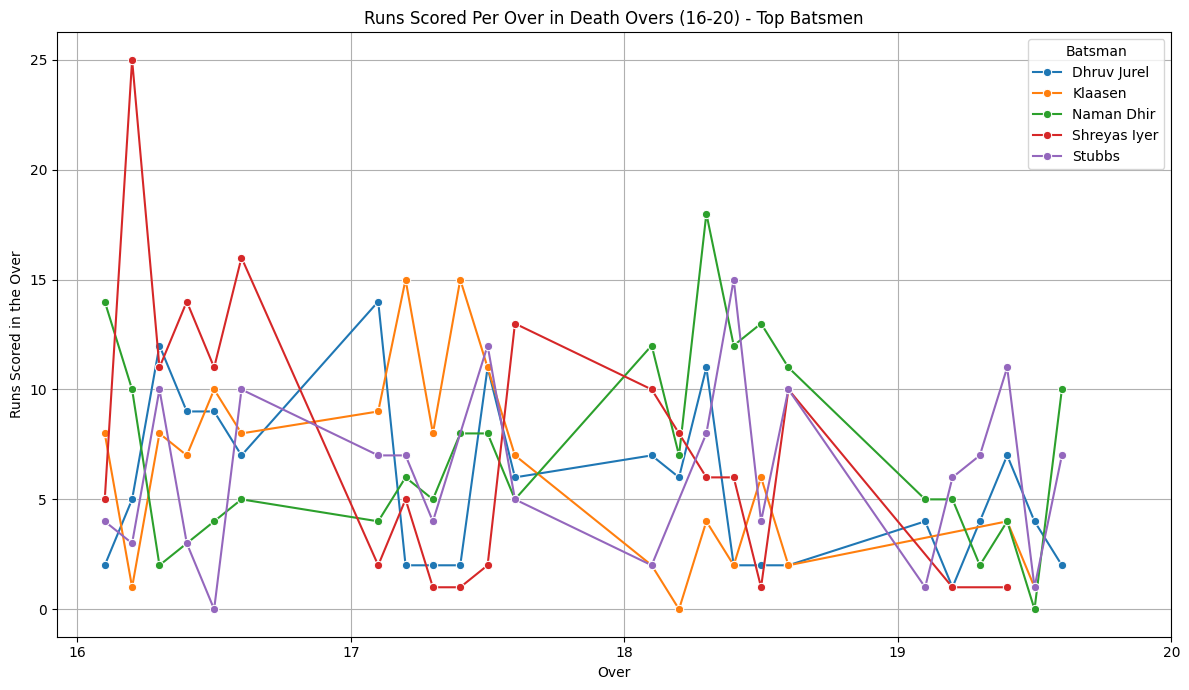

In [ ]:
top_batsmen_for_plot = best_death_overs_batsmen.head(5)['batsman'].tolist()
top_batsmen_death_overs = death_overs_deliveries[death_overs_deliveries['striker'].isin(top_batsmen_for_plot)].copy()
# Calculate runs scored per over for each batsman in death overs
runs_per_over = top_batsmen_death_overs.groupby(['striker', 'over'])['runs_of_bat'].sum().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(data=runs_per_over, x='over', y='runs_of_bat', hue='striker', marker='o')
plt.title('Runs Scored Per Over in Death Overs (16-20) - Top Batsmen')
plt.xlabel('Over')
plt.ylabel('Runs Scored in the Over')
plt.xticks(range(16, 21))
plt.grid(True)
plt.legend(title='Batsman')
plt.tight_layout()
plt.show()

## *Question-Who hit the most boundaries in powerplay?*

Batsmen with Most Boundaries (4s & 6s) in Powerplay:
             batsman  fours  sixes  total_boundaries
22          Jaiswal     35     20                55
50    Sai Sudharsan     45     10                55
39        Phil Salt     35     13                48
41      Prabhsimran     33     15                48
42    Priyansh Arya     35     12                47
26            Kohli     36      8                44
0   Abhishek Sharma     32     11                43
43           Rahane     28     15                43
47        Rickelton     30     12                42
31   Mitchell Marsh     23     17                40


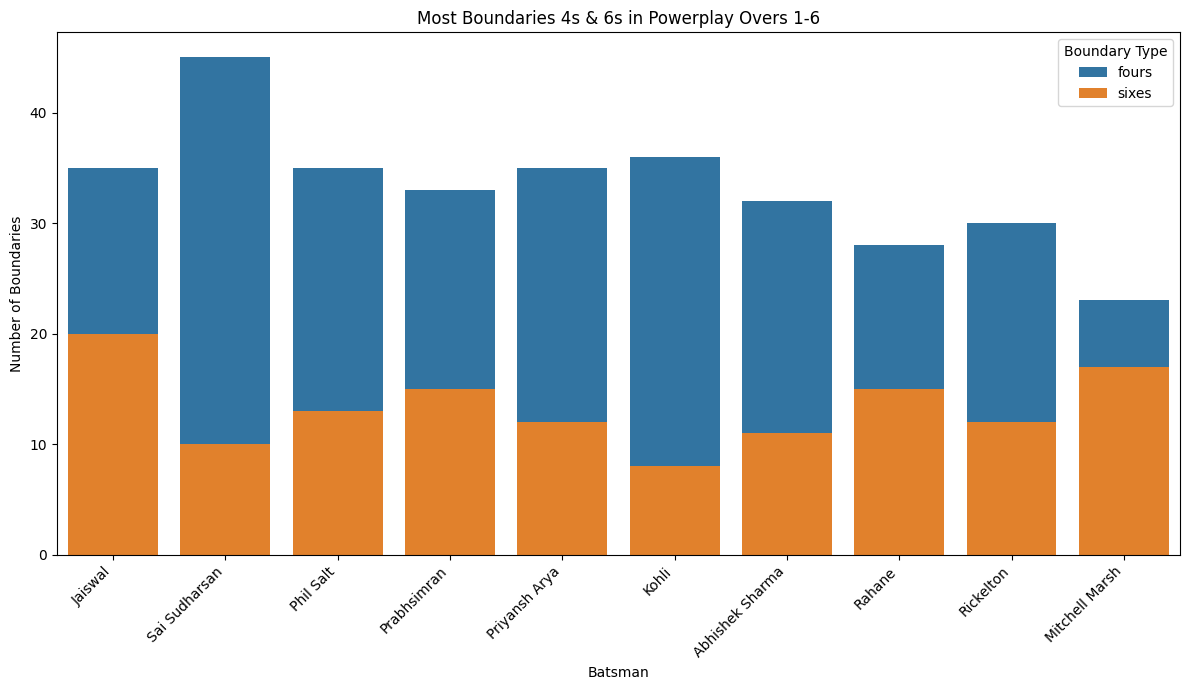

In [ ]:
# Filter deliveries for powerplay overs 1 to 6
powerplay_deliveries = deliveries[(deliveries['over'] >= 1) & (deliveries['over'] <= 6)].copy()

# Filter for boundaries 4s and 6s
powerplay_boundaries = powerplay_deliveries[(powerplay_deliveries['runs_of_bat'] == 4) | (powerplay_deliveries['runs_of_bat'] == 6)].copy()

# Count the number of 4s and 6s for each batsman in powerplay
batsman_powerplay_boundaries = powerplay_boundaries.groupby(['striker', 'runs_of_bat']).size().unstack(fill_value=0).reset_index()
batsman_powerplay_boundaries.columns = ['batsman', 'fours', 'sixes']
batsman_powerplay_boundaries['total_boundaries'] = batsman_powerplay_boundaries['fours'] + batsman_powerplay_boundaries['sixes']

# Sort by total boundaries to find who hit the most
most_powerplay_boundaries = batsman_powerplay_boundaries.sort_values(by='total_boundaries', ascending=False).head(10)
print("Batsmen with Most Boundaries (4s & 6s) in Powerplay:\n", most_powerplay_boundaries)

most_powerplay_boundaries_melted = most_powerplay_boundaries.melt(id_vars='batsman', value_vars=['fours', 'sixes'], var_name='boundary_type', value_name='count')

plt.figure(figsize=(12, 7))
sns.barplot(data=most_powerplay_boundaries_melted, x='batsman', y='count', hue='boundary_type', dodge=False)
plt.title('Most Boundaries 4s & 6s in Powerplay Overs 1-6')
plt.xlabel('Batsman')
plt.ylabel('Number of Boundaries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Boundary Type')
plt.tight_layout()
plt.show()

## Question-Which batsman had the highest dot ball percentage?

In [ ]:
# Calculate total balls faced by each batsman
batsman_balls_faced = deliveries.groupby('striker').size().reset_index(name='total_balls_faced')

# Filter for dot balls runs_of_bat == 0
dot_balls = deliveries[deliveries['runs_of_bat'] == 0].copy()

# Count dot balls for each batsman
batsman_dot_balls = dot_balls.groupby('striker').size().reset_index(name='dot_balls')

# Merge total balls faced and dot balls
batsman_dot_ball_stats = pd.merge(batsman_balls_faced, batsman_dot_balls, on='striker', how='left').fillna(0)

# Filter for batsmen who faced at least a significant number of balls (e.g., 100)
batsman_dot_ball_stats_filtered = batsman_dot_ball_stats[batsman_dot_ball_stats['total_balls_faced'] >= 100].copy()

# Calculate dot ball percentage
batsman_dot_ball_stats_filtered['dot_ball_percentage'] = (batsman_dot_ball_stats_filtered['dot_balls'] / batsman_dot_ball_stats_filtered['total_balls_faced']) * 100

# Sort by dot ball percentage to find the highest
highest_dot_ball_batsmen = batsman_dot_ball_stats_filtered.sort_values(by='dot_ball_percentage', ascending=False).head(10)

print("Batsmen with Highest Dot Ball Percentage (Min. 100 balls faced):\n", highest_dot_ball_batsmen)

Batsmen with Highest Dot Ball Percentage (Min. 100 balls faced):
         striker  total_balls_faced  dot_balls  dot_ball_percentage
122     Russell                109       60.0            55.045872
92       Narine                159       86.0            54.088050
99         Pant                208       97.0            46.634615
117   Rickelton                266      116.0            43.609023
166     de Kock                122       53.0            43.442623
50         Head                247      107.0            43.319838
101   Phil Salt                238       98.0            41.176471
167  du Plessis                170       70.0            41.176471
31       Conway                125       51.0            40.800000
154   Tim David                106       43.0            40.566038


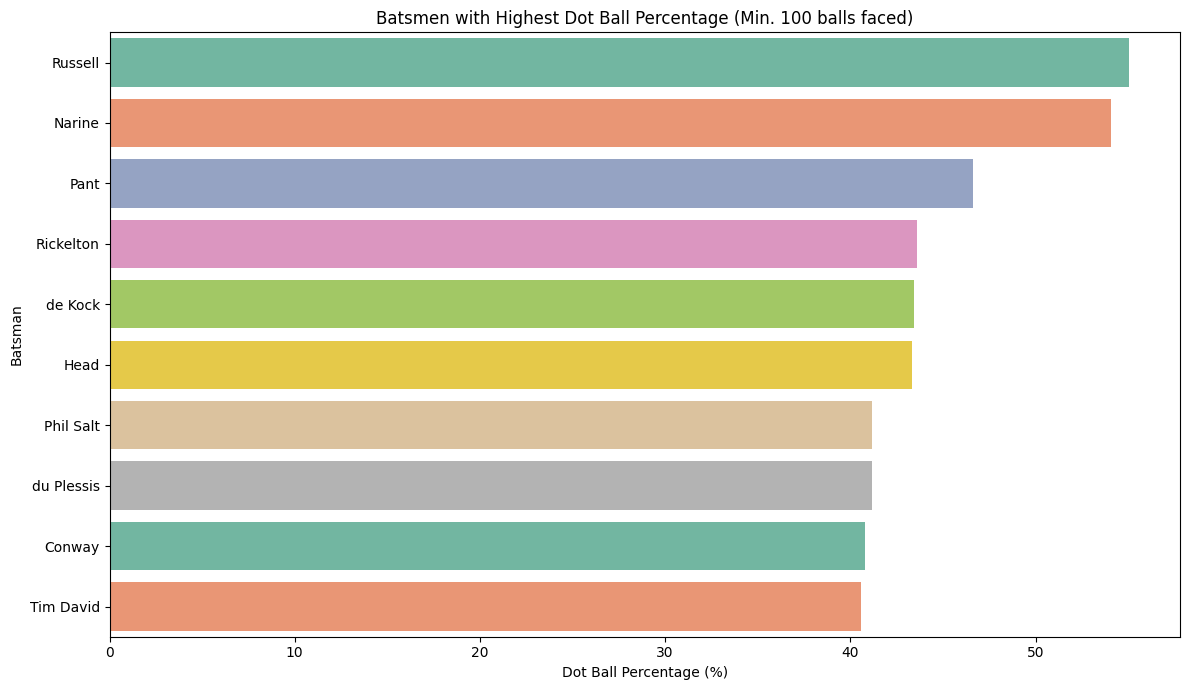

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='dot_ball_percentage', y='striker', data=highest_dot_ball_batsmen, palette='Set2')
plt.title('Batsmen with Highest Dot Ball Percentage (Min. 100 balls faced)')
plt.xlabel('Dot Ball Percentage (%)')
plt.ylabel('Batsman')
plt.tight_layout()
plt.show()

## *Question-Who were the best runners between wickets?*

Batsmen with Highest Percentage of Runs Scored by Running (Min. 200 runs):
                   batsman  total_runs_scored  running_runs  running_percentage  boundary_runs  boundary_percentage
55                 Jadeja                301         141.0           46.843854          160.0            53.156146
148                Stubbs                306         134.0           43.790850          172.0            56.209150
51                Hetmyer                245         107.0           43.673469          138.0            56.326531
153           Tilak Varma                343         149.0           43.440233          194.0            56.559767
6    Angkrish Raghuvanshi                300         129.0           43.000000          171.0            57.000000
69                  Kohli                657         279.0           42.465753          378.0            57.534247
138        Shashank Singh                350         147.0           42.000000          203.0            58.000000
112 

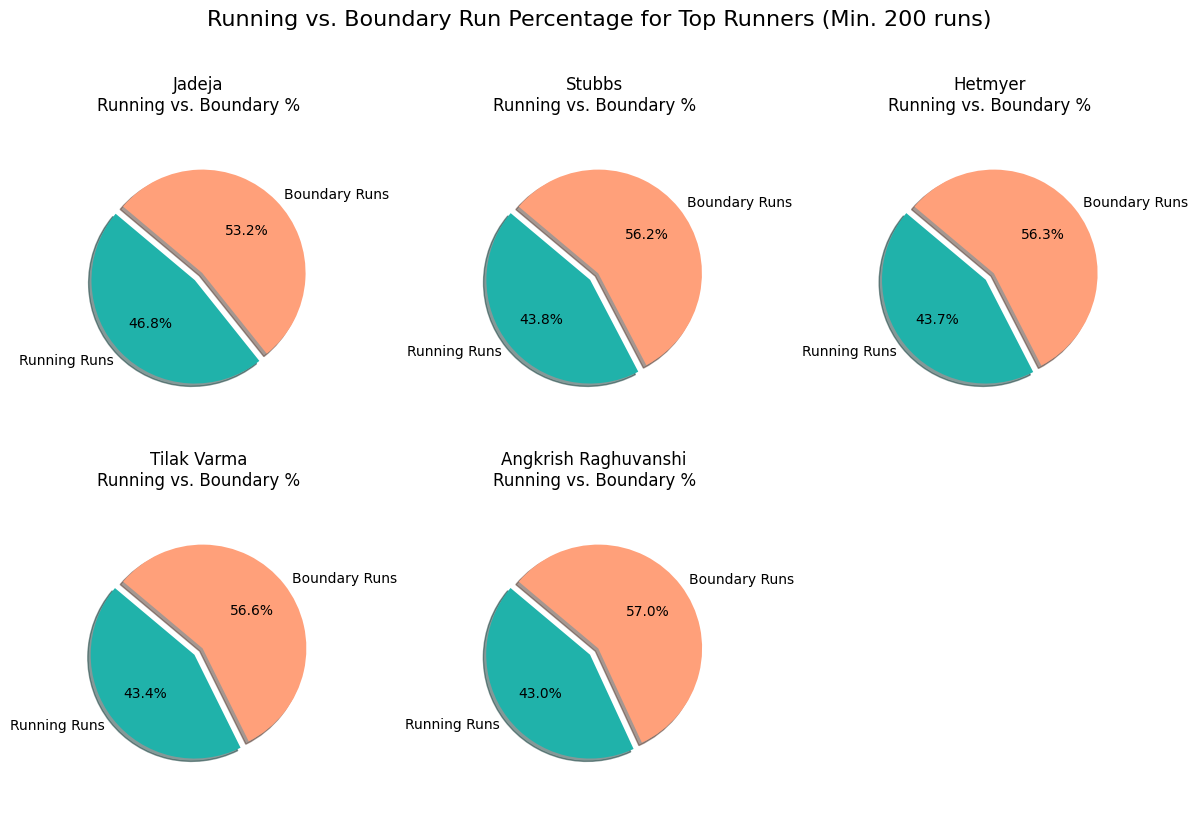

In [ ]:
# Identify singles 1 run and doubles 2 runs
singles_doubles = deliveries[(deliveries['runs_of_bat'] == 1) | (deliveries['runs_of_bat'] == 2)].copy()

# Count singles and doubles for each batsman
batsman_running_runs = singles_doubles.groupby('striker')['runs_of_bat'].sum().reset_index()
batsman_running_runs.columns = ['batsman', 'running_runs']
batsman_total_runs = deliveries.groupby('striker')['runs_of_bat'].sum().reset_index()
batsman_total_runs.columns = ['batsman', 'total_runs_scored']


batsman_running_stats = pd.merge(batsman_total_runs, batsman_running_runs, on='batsman', how='left').fillna(0)

# Filter for batsmen who scored a significant number of runs
batsman_running_stats_filtered = batsman_running_stats[batsman_running_stats['total_runs_scored'] >= 200].copy()

# Calculate the percentage of runs scored by singles and doubles
batsman_running_stats_filtered['running_percentage'] = (batsman_running_stats_filtered['running_runs'] / batsman_running_stats_filtered['total_runs_scored']) * 100

# Calculate boundary runs
batsman_running_stats_filtered['boundary_runs'] = batsman_running_stats_filtered['total_runs_scored'] - batsman_running_stats_filtered['running_runs']
batsman_running_stats_filtered['boundary_percentage'] = (batsman_running_stats_filtered['boundary_runs'] / batsman_running_stats_filtered['total_runs_scored']) * 100


# Sort by running percentage to find the best runners
best_runners = batsman_running_stats_filtered.sort_values(by='running_percentage', ascending=False).head(10)

print("Batsmen with Highest Percentage of Runs Scored by Running (Min. 200 runs):\n", best_runners)


top_runners_plot = best_runners.head(5)

plt.figure(figsize=(12, 8))

for plot_index, row in enumerate(top_runners_plot.itertuples()):
    labels = ['Running Runs', 'Boundary Runs']
    sizes = [row.running_runs, row.boundary_runs]
    colors = ['lightseagreen', 'lightsalmon']
    explode = (0.1, 0)

    plt.subplot(2, 3, plot_index + 1) # Create subplots for each player
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(f"{row.batsman}\nRunning vs. Boundary %")
    plt.axis('equal')

plt.suptitle('Running vs. Boundary Run Percentage for Top Runners (Min. 200 runs)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## *Question-Which bowler had the best economy in death overs 16-20?*

Bowlers with the Best Economy in Death Overs (Min. 30 legal balls bowled):
             bowler  death_overs_runs_conceded  death_overs_legal_balls  death_overs_economy
39   Kuldeep Yadav                         26                       30             5.200000
56      Noor Ahmad                         56                       48             7.000000
14          Bumrah                        101                       80             7.575000
21   Eshan Malinga                         52                       40             7.800000
13           Boult                        113                       76             8.921053
66     Sai Kishore                         51                       33             9.272727
20   Digvesh Rathi                         85                       54             9.444444
44  Mitchell Starc                         77                       48             9.625000
28    Harshit Rana                         97                       60             9.700000
30  

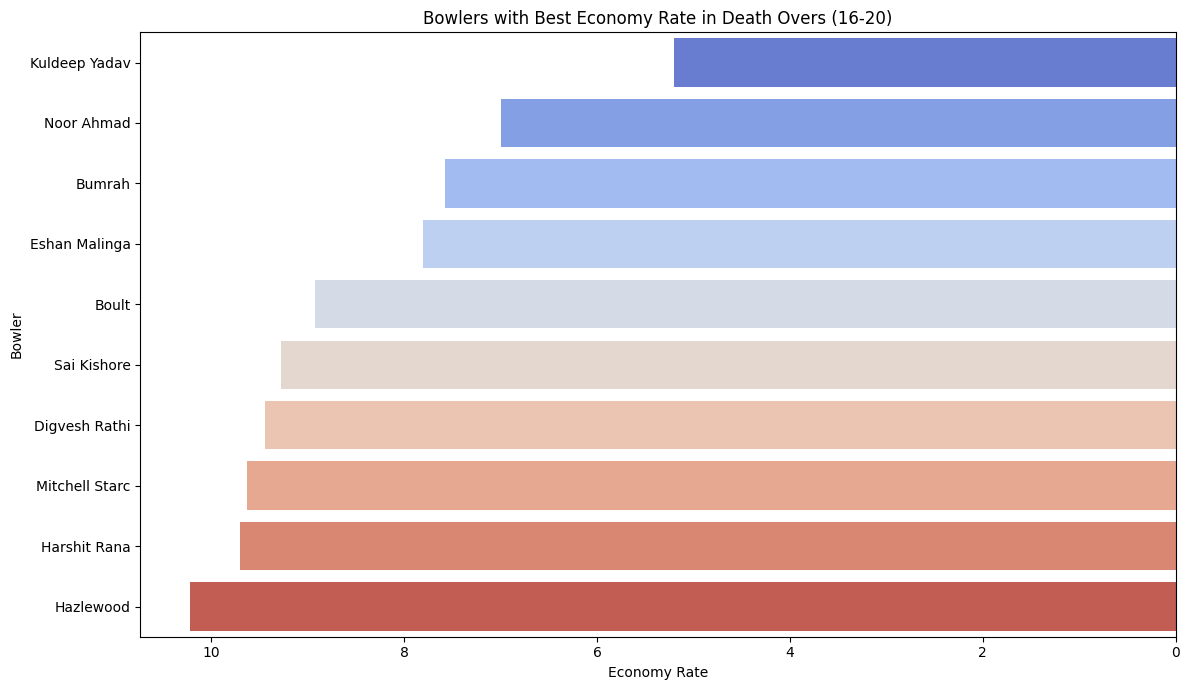

In [ ]:
# Filter deliveries for death overs 16 to 20
death_overs_deliveries = deliveries[(deliveries['over'] >= 16) & (deliveries['over'] <= 20)].copy()

# Calculate total runs conceded by each bowler in death overs
death_overs_deliveries['total_runs_conceded'] = death_overs_deliveries['runs_of_bat'] + death_overs_deliveries['extras']
bowler_death_overs_runs = death_overs_deliveries.groupby('bowler')['total_runs_conceded'].sum().reset_index()
bowler_death_overs_runs.columns = ['bowler', 'death_overs_runs_conceded']

# Calculate balls bowled by each bowler in death overs
# Exclude wide and noballs from balls bowled count
bowler_death_overs_balls = death_overs_deliveries[
    (death_overs_deliveries['wide'] == 0) & (death_overs_deliveries['noballs'] == 0)
].groupby('bowler').size().reset_index(name='death_overs_balls_bowled')
bowler_death_overs_balls.columns = ['bowler', 'death_overs_legal_balls']

bowler_death_overs_stats = pd.merge(bowler_death_overs_runs, bowler_death_overs_balls, on='bowler')

# Filter for bowlers who bowled at least a significant number of balls in death overs which is 30 balls
bowler_death_overs_stats_filtered = bowler_death_overs_stats[bowler_death_overs_stats['death_overs_legal_balls'] >= 30].copy()

# Calculate economy rate
bowler_death_overs_stats_filtered['death_overs_economy'] = (bowler_death_overs_stats_filtered['death_overs_runs_conceded'] / bowler_death_overs_stats_filtered['death_overs_legal_balls']) * 6

# Sort by economy rate to find the best lowest economy
best_death_overs_bowlers = bowler_death_overs_stats_filtered.sort_values(by='death_overs_economy', ascending=True).head(10)

print("Bowlers with the Best Economy in Death Overs (Min. 30 legal balls bowled):\n", best_death_overs_bowlers)

plt.figure(figsize=(12, 7))
sns.barplot(x='death_overs_economy', y='bowler', data=best_death_overs_bowlers, palette='coolwarm')
plt.title('Bowlers with Best Economy Rate in Death Overs (16-20)')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()


## *Question-Who bowled the most dot balls in the tournament?*

Bowlers who bowled the most dot balls:
                   bowler  total_dot_balls
99                 Siraj              141
75               Prasidh              135
8         Arshdeep Singh              134
45         Khaleel Ahmed              131
18                Bumrah              125
17                 Boult              124
35             Hazlewood              117
16           Bhuvneshwar              116
112  Varun Chakaravarthy              114
23               Cummins              111


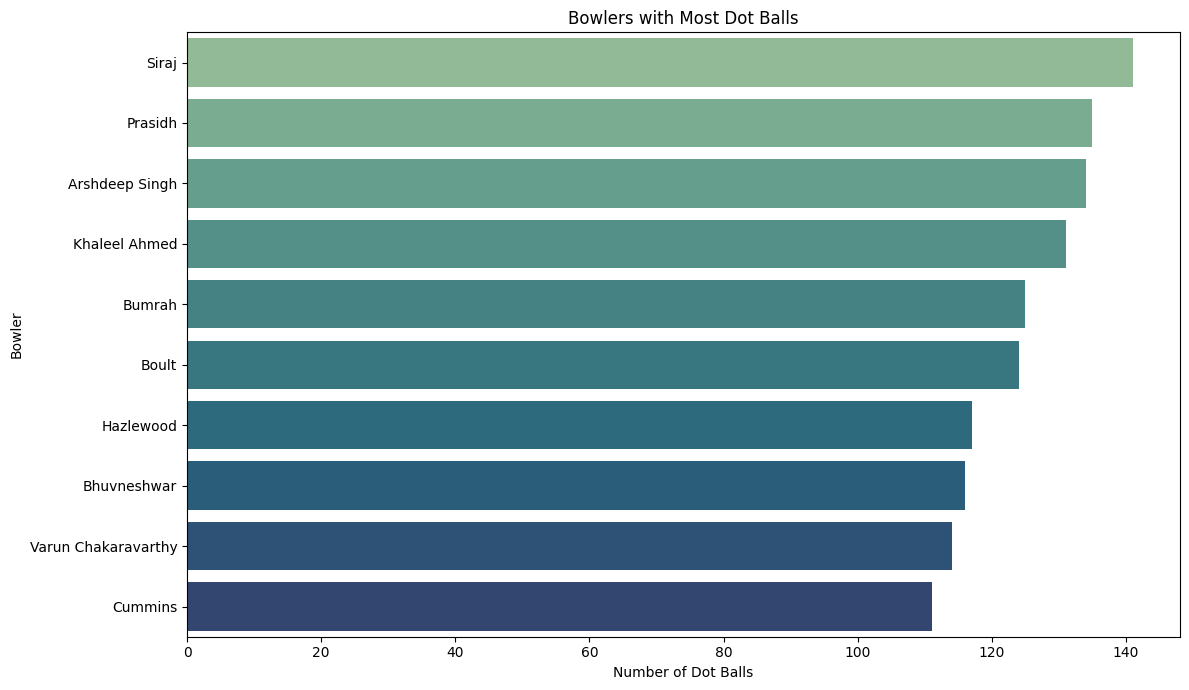

In [ ]:
# Filter for dot balls runs_of_bat == 0 and extras == 0
dot_balls_deliveries = deliveries[(deliveries['runs_of_bat'] == 0) & (deliveries['extras'] == 0)].copy()

# Count dot balls for each bowler
bowler_dot_balls_count = dot_balls_deliveries.groupby('bowler').size().reset_index(name='total_dot_balls')

# Sort by total dot balls to find who bowled the most
most_dot_balls_bowlers = bowler_dot_balls_count.sort_values(by='total_dot_balls', ascending=False).head(10)

print("Bowlers who bowled the most dot balls:\n", most_dot_balls_bowlers)

plt.figure(figsize=(12, 7))
sns.barplot(x='total_dot_balls', y='bowler', data=most_dot_balls_bowlers, palette='crest')
plt.title('Bowlers with Most Dot Balls')
plt.xlabel('Number of Dot Balls')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

## *Question-Which bowler had the best strike rate (balls per wicket)?*

Bowlers with the Best Strike Rate (Balls per Wicket) - Min. 60 legal balls & 1 wicket:
               bowler  total_legal_balls  total_wickets  strike_rate
122  William ORourke                 62            6.0    10.333333
9      Ashwani Kumar                123           11.0    11.181818
25     Eshan Malinga                160           14.0    11.428571
27          Ferguson                 69            6.0    11.500000
58    Mitchell Starc                221           19.0    11.631579
114          Unadkat                143           12.0    11.916667
31       Harsh Dubey                 60            5.0    12.000000
35         Hazlewood                264           22.0    12.000000
117   Vignesh Puthur                 72            6.0    12.000000
75        Noor Ahmad                300           24.0    12.500000


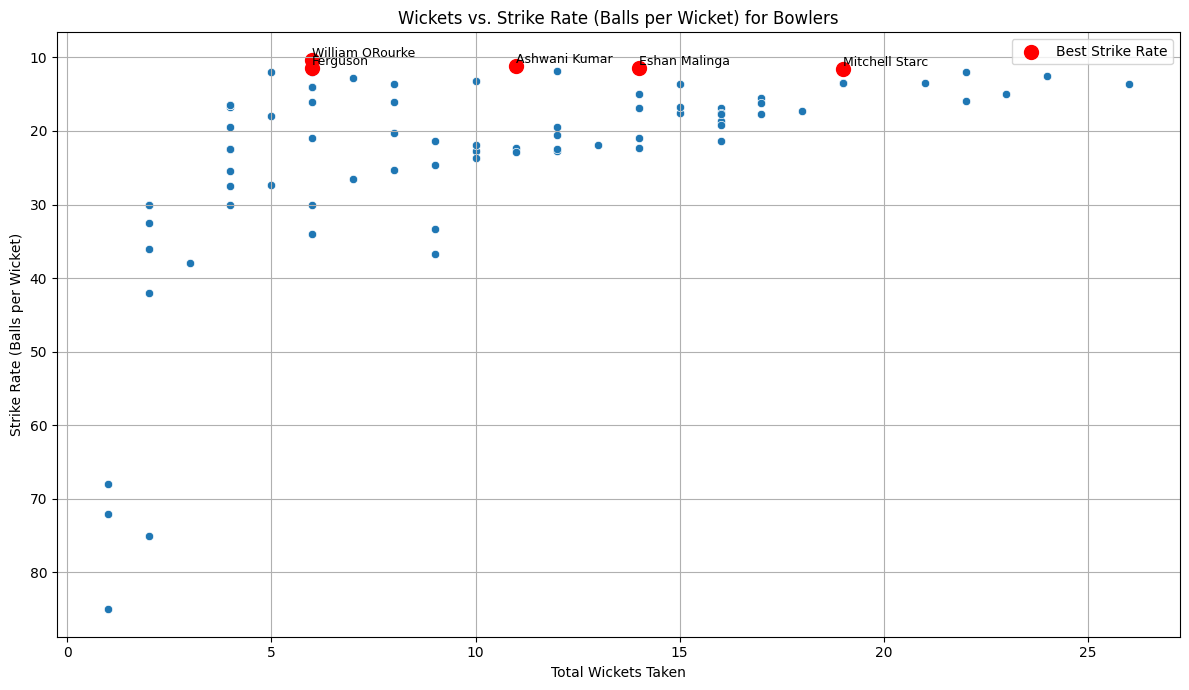

In [ ]:
# Calculate total balls bowled by each bowler excluding wide and noballs
bowler_legal_balls = deliveries[(deliveries['wide'] == 0) & (deliveries['noballs'] == 0)].groupby('bowler').size().reset_index(name='total_legal_balls')

# Filter for wickets
wickets = deliveries[deliveries['wicket_type'].notnull() & (deliveries['wicket_type'] != 'run out')].copy()

# Count wickets for each bowler
bowler_wickets_count = wickets.groupby('bowler').size().reset_index(name='total_wickets')

# Merge total balls bowled and wickets
bowler_strike_rate_stats = pd.merge(bowler_legal_balls, bowler_wickets_count, on='bowler', how='left').fillna(0)

# Filter for bowlers who bowled a significant number of balls and taken at least one wicket
bowler_strike_rate_stats_filtered = bowler_strike_rate_stats[
    (bowler_strike_rate_stats['total_legal_balls'] >= 60) & (bowler_strike_rate_stats['total_wickets'] > 0)
].copy()

# Calculate strike rate (balls per wicket)
bowler_strike_rate_stats_filtered['strike_rate'] = bowler_strike_rate_stats_filtered['total_legal_balls'] / bowler_strike_rate_stats_filtered['total_wickets']

# Sort by strike rate to find the best lowest strike rate
best_strike_rate_bowlers = bowler_strike_rate_stats_filtered.sort_values(by='strike_rate', ascending=True).head(10)

print("Bowlers with the Best Strike Rate (Balls per Wicket) - Min. 60 legal balls & 1 wicket:\n", best_strike_rate_bowlers)

plt.figure(figsize=(12, 7))
sns.scatterplot(x='total_wickets', y='strike_rate', data=bowler_strike_rate_stats_filtered)
top_bowlers_strike_rate = best_strike_rate_bowlers.head(5)
plt.scatter(top_bowlers_strike_rate['total_wickets'], top_bowlers_strike_rate['strike_rate'], color='red', s=100, label='Best Strike Rate')
for i, row in top_bowlers_strike_rate.iterrows():
    plt.text(row['total_wickets'], row['strike_rate'], row['bowler'], fontsize=9, ha='left', va='bottom')


plt.title('Wickets vs. Strike Rate (Balls per Wicket) for Bowlers')
plt.xlabel('Total Wickets Taken')
plt.ylabel('Strike Rate (Balls per Wicket)')
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
deliveries.wicket_type.unique()

array([nan, 'caught', 'bowled', 'stumped', 'lbw', 'runout', 'retired out',
       'retired hurt', 'hit wicket'], dtype=object)

## *Question-What was the most common dismissal type 'caught', 'bowled', 'stumped', 'lbw', 'runout', 'retired out','retired hurt', 'hit wicket'?*

Dismissal Type Counts:
 wicket_type
caught        622
bowled        133
lbw            53
runout         39
stumped        18
hit wicket      3
Name: count, dtype: int64


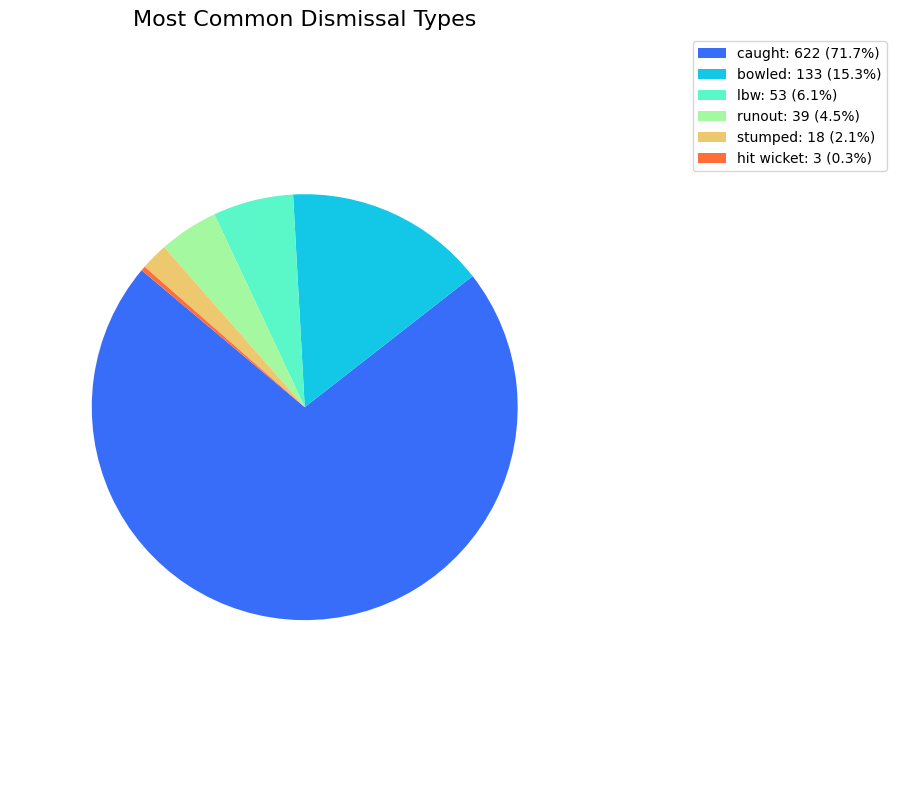

In [ ]:
# Filter out rows where 'wicket_type' is NaN or 'run out' as these are not 'dismissal' types in the traditional bowling sense
dismissals = deliveries[
    deliveries['wicket_type'].notnull() &
    ~deliveries['wicket_type'].isin(['run out', 'retired hurt', 'retired out'])
].copy()

# Count the occurrences of each dismissal type
dismissal_counts = dismissals['wicket_type'].value_counts()

# Calculate the percentage
dismissal_percentages = (dismissal_counts / dismissal_counts.sum()) * 100

legend_labels = [f'{type}: {count} ({percent:.1f}%)' for type, count, percent in zip(dismissal_counts.index, dismissal_counts.values, dismissal_percentages.values)]
print("Dismissal Type Counts:\n", dismissal_counts)

plt.figure(figsize=(10, 8))
plt.pie(dismissal_counts, startangle=140, colors=sns.color_palette('rainbow')[0:len(dismissal_counts)])
plt.title('Most Common Dismissal Types', fontsize=16)
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()

## *Question-Which bowler had the best performance against top-order batsmen?*

Bowlers with the Best Performance Against Top-Order Batsmen (Overs 1-6, Min. 60 legal balls):
             bowler  powerplay_runs_conceded  powerplay_legal_balls  powerplay_wickets  powerplay_economy
31       Hazlewood                      156                    126                9.0           7.428571
14     Bhuvneshwar                      181                    120                8.0           9.050000
4    Anshul Kamboj                      170                    126                7.0           8.095238
15           Boult                      192                    120                7.0           9.600000
30    Harshit Rana                      201                    114                7.0          10.578947
18          Chahar                      259                    162                6.0           9.592593
21         Cummins                      192                    120                6.0           9.600000
50    Mukesh Kumar                      167                    11

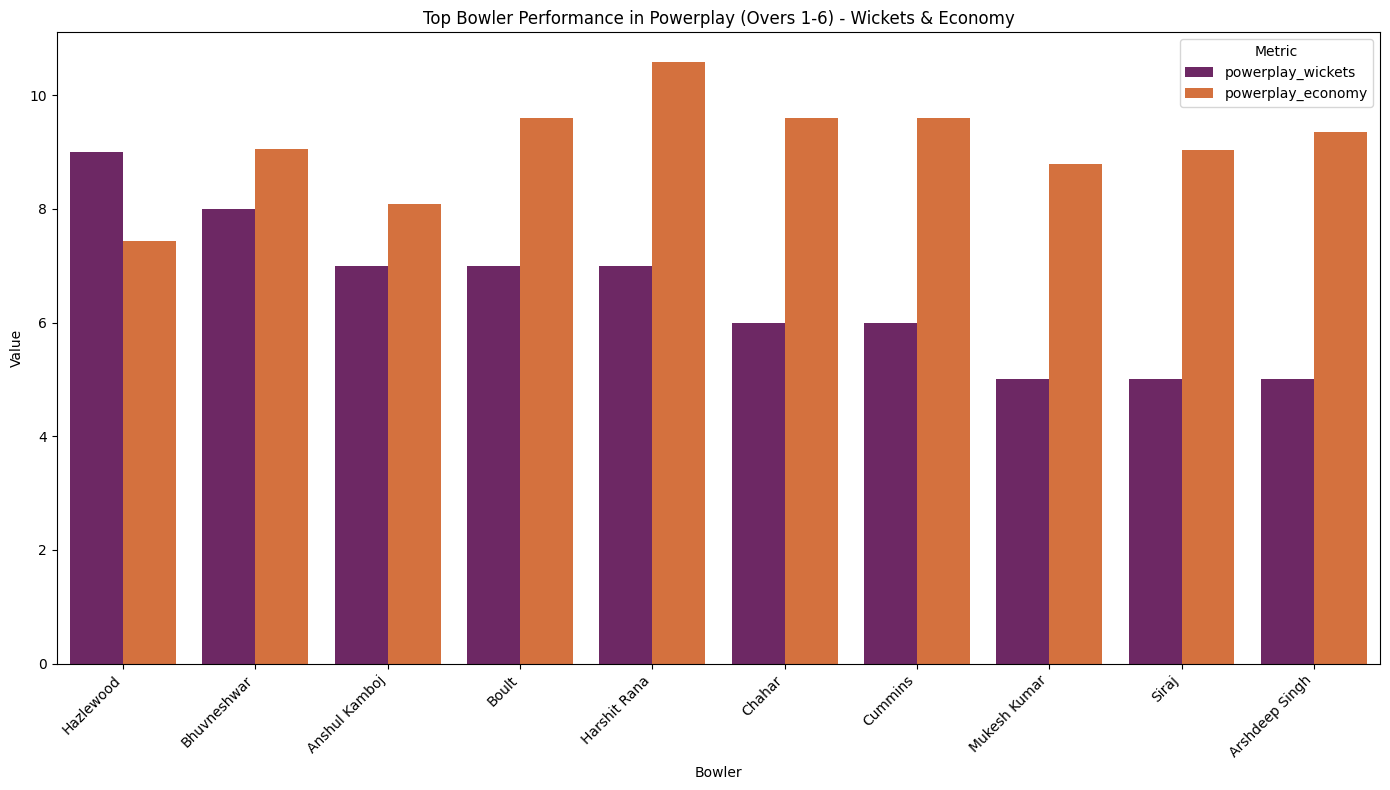

In [ ]:
# Assuming top-order batsmen  who bated in Powerplay 1 to 6 overs
powerplay_deliveries = deliveries[(deliveries['over'] >= 1) & (deliveries['over'] <= 6)].copy()

# Calculate wickets taken by each bowler in powerplay
powerplay_wickets = powerplay_deliveries[
    powerplay_deliveries['wicket_type'].notnull() &
    ~powerplay_deliveries['wicket_type'].isin(['run out', 'retired hurt', 'retired out'])
].groupby('bowler').size().reset_index(name='powerplay_wickets')

# Calculate total runs conceded by each bowler in powerplay
powerplay_deliveries['total_runs_conceded'] = powerplay_deliveries['runs_of_bat'] + powerplay_deliveries['extras']
bowler_powerplay_runs = powerplay_deliveries.groupby('bowler')['total_runs_conceded'].sum().reset_index()
bowler_powerplay_runs.columns = ['bowler', 'powerplay_runs_conceded']

# Calculate legal balls bowled by each bowler in powerplay
bowler_powerplay_balls = powerplay_deliveries[
    (powerplay_deliveries['wide'] == 0) & (powerplay_deliveries['noballs'] == 0)
].groupby('bowler').size().reset_index(name='powerplay_legal_balls')
bowler_powerplay_balls.columns = ['bowler', 'powerplay_legal_balls']

bowler_powerplay_performance = pd.merge(bowler_powerplay_runs, bowler_powerplay_balls, on='bowler')
bowler_powerplay_performance = pd.merge(bowler_powerplay_performance, powerplay_wickets, on='bowler', how='left').fillna(0)

# Filter for bowlers who bowled at least a significant number of balls in powerplay which is 60 balls or 10 overs)
bowler_powerplay_performance_filtered = bowler_powerplay_performance[
    bowler_powerplay_performance['powerplay_legal_balls'] >= 60
].copy()

# Calculate economy rate
bowler_powerplay_performance_filtered['powerplay_economy'] = (bowler_powerplay_performance_filtered['powerplay_runs_conceded'] / bowler_powerplay_performance_filtered['powerplay_legal_balls']) * 6

# Sort by wickets (descending) and then economy (ascending) to find best performance
best_powerplay_bowlers = bowler_powerplay_performance_filtered.sort_values(by=['powerplay_wickets', 'powerplay_economy'], ascending=[False, True]).head(10)

print("Bowlers with the Best Performance Against Top-Order Batsmen (Overs 1-6, Min. 60 legal balls):\n", best_powerplay_bowlers)

best_powerplay_bowlers_melted = best_powerplay_bowlers.melt(id_vars='bowler', value_vars=['powerplay_wickets', 'powerplay_economy'], var_name='metric', value_name='value')

plt.figure(figsize=(14, 8))
sns.barplot(data=best_powerplay_bowlers_melted, x='bowler', y='value', hue='metric', palette='inferno')
plt.title('Top Bowler Performance in Powerplay (Overs 1-6) - Wickets & Economy')
plt.xlabel('Bowler')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

## *Question-Which over was the most expensive on average?*


Most Expensive Overs on Average:
      over  total_runs_conceded  total_deliveries  average_runs
117  19.4                  216               100     12.960000
108  18.1                  271               129     12.604651
116  19.3                  214               102     12.588235
106  17.5                  273               133     12.315789
119  19.6                  192                96     12.000000


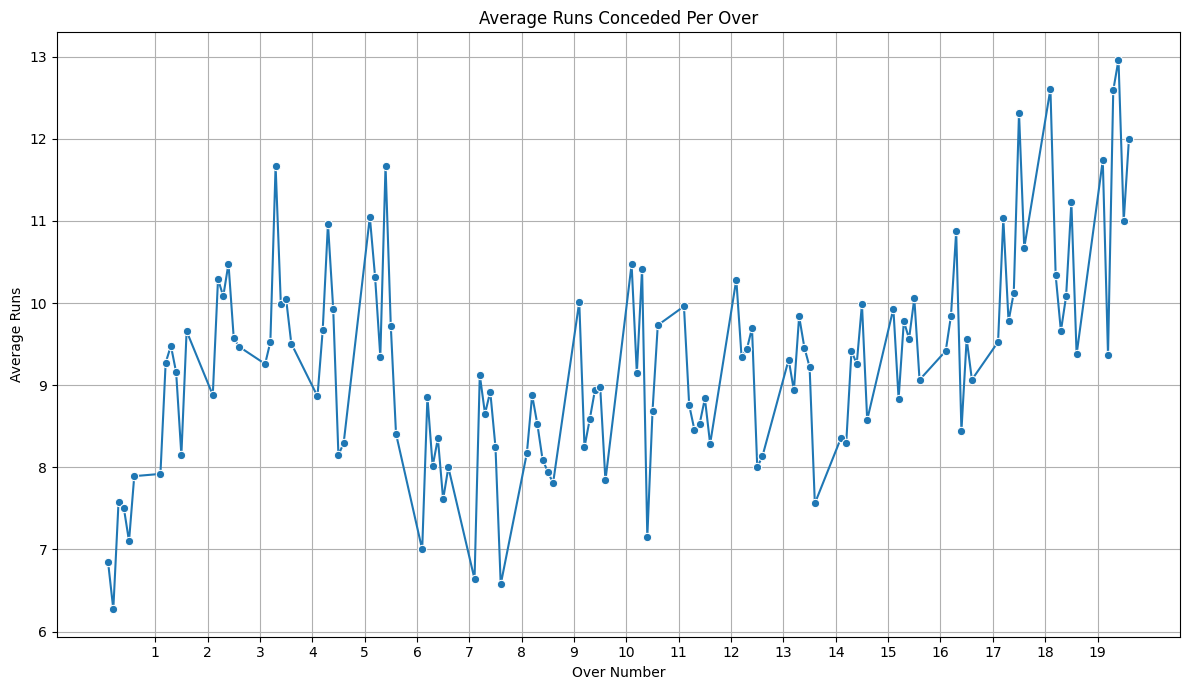

In [ ]:
# Calculate total runs conceded per over
deliveries['total_runs_conceded'] = deliveries['runs_of_bat'] + deliveries['extras']
runs_per_over = deliveries.groupby('over')['total_runs_conceded'].sum().reset_index()

# Calculate total balls bowled per over (to find the number of overs bowled)
# We assume a standard over of 6 balls here for simplicity, but can refine by counting unique over/inning/match combinations
# For simplicity, we group by 'over' number across all matches/innings
total_balls_per_over = deliveries.groupby('over').size().reset_index(name='total_deliveries')

over_stats = pd.merge(runs_per_over, total_balls_per_over, on='over')

# Calculate average runs per over
over_stats['average_runs'] = (over_stats['total_runs_conceded'] / over_stats['total_deliveries']) * 6

# Sort by average runs to find the most expensive
most_expensive_over = over_stats.sort_values(by='average_runs', ascending=False)

print("\nMost Expensive Overs on Average:\n", most_expensive_over.head())

plt.figure(figsize=(12, 7))
sns.lineplot(data=over_stats, x='over', y='average_runs', marker='o')
plt.title('Average Runs Conceded Per Over')
plt.xlabel('Over Number')
plt.ylabel('Average Runs')
plt.xticks(range(1, int(over_stats['over'].max()) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

## *Question-How did run rates change across innings (powerplay, middle, death)?*

In [ ]:
deliveries.columns

Index(['match_no', 'date', 'stage', 'venue', 'batting_team', 'bowling_team', 'innings', 'over', 'striker', 'bowler', 'runs_of_bat', 'extras', 'wide', 'legbyes', 'byes', 'noballs', 'wicket_type', 'player_dismissed', 'fielder', 'total_runs_conceded'], dtype='object')

Average Runs Per Over Across Innings Stages:
    innings inning_stage  total_runs_this_ball
2        1    Powerplay              1.681735
1        1       Middle              1.460922
0        1        Death              1.934954
5        2    Powerplay              1.654930
4        2       Middle              1.580898
3        2        Death              1.773214


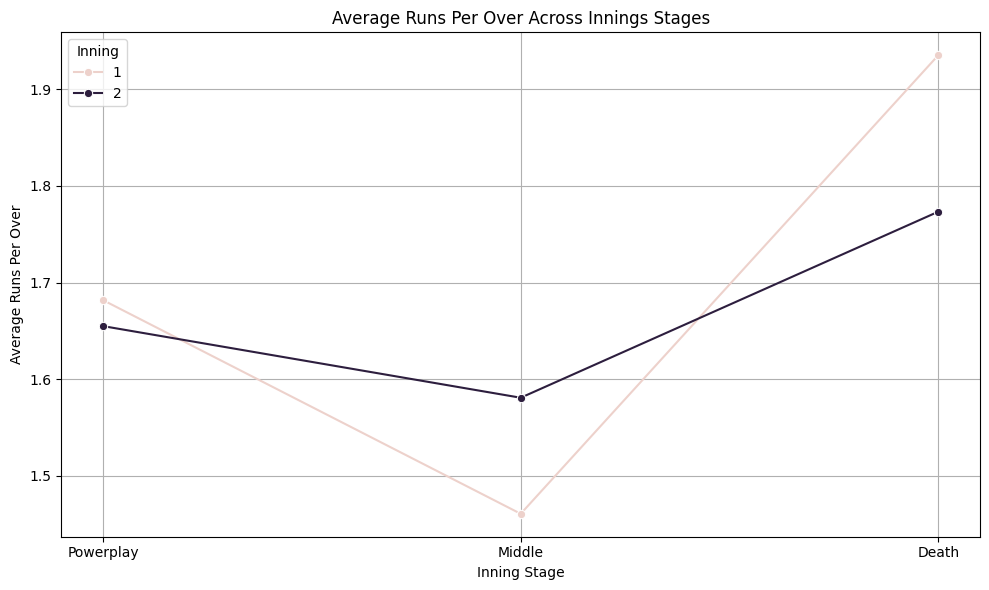

In [ ]:
# Group deliveries by match_id, inning, and over
deliveries['total_runs_this_ball'] = deliveries['runs_of_bat'] + deliveries['extras']
inning_over_runs = deliveries.groupby(['match_no', 'innings', 'over'])['total_runs_this_ball'].sum().reset_index()

# Define inning stages
def get_inning_stage(over):
    if 1 <= over <= 6:
        return 'Powerplay'
    elif 7 <= over <= 15:
        return 'Middle'
    elif 16 <= over <= 20:
        return 'Death'
    return 'Other'

inning_over_runs['inning_stage'] = inning_over_runs['over'].apply(get_inning_stage)

# Filter out 'Other' stage if any
inning_over_runs_filtered = inning_over_runs[inning_over_runs['inning_stage'] != 'Other'].copy()

# Calculate average runs per over for each inning stage and inning
inning_stage_run_rate = inning_over_runs_filtered.groupby(['innings', 'inning_stage'])['total_runs_this_ball'].mean().reset_index()

# Order the inning stages for plotting
inning_stage_order = ['Powerplay', 'Middle', 'Death']
inning_stage_run_rate['inning_stage'] = pd.Categorical(inning_stage_run_rate['inning_stage'], categories=inning_stage_order, ordered=True)
inning_stage_run_rate = inning_stage_run_rate.sort_values(['innings', 'inning_stage'])

print("Average Runs Per Over Across Innings Stages:\n", inning_stage_run_rate)

plt.figure(figsize=(10, 6))
sns.lineplot(data=inning_stage_run_rate, x='inning_stage', y='total_runs_this_ball', hue='innings', marker='o')
plt.title('Average Runs Per Over Across Innings Stages')
plt.xlabel('Inning Stage')
plt.ylabel('Average Runs Per Over')
plt.grid(True)
plt.legend(title='Inning')
plt.tight_layout()
plt.show()

## *Question-Which team had the best powerplay batting performance?*

In [ ]:
deliveries.columns

Index(['match_no', 'date', 'stage', 'venue', 'batting_team', 'bowling_team', 'innings', 'over', 'striker', 'bowler', 'runs_of_bat', 'extras', 'wide', 'legbyes', 'byes', 'noballs', 'wicket_type', 'player_dismissed', 'fielder', 'total_runs_conceded', 'total_runs_this_ball'], dtype='object')

Teams with the Best Powerplay Batting Performance (Runs per Over, Min. 60 legal balls faced):
    team  powerplay_runs  powerplay_legal_balls_faced  powerplay_runs_per_over
8    RR             782                          420                11.171429
3   KKR             641                          360                10.683333
5    MI             825                          480                10.312500
9   SRH             662                          390                10.184615
6  PBKS             858                          510                10.094118
7   RCB             744                          450                 9.920000
4   LSG             692                          420                 9.885714
2    GT             727                          450                 9.693333
0   CSK             643                          420                 9.185714
1    DC             634                          420                 9.057143


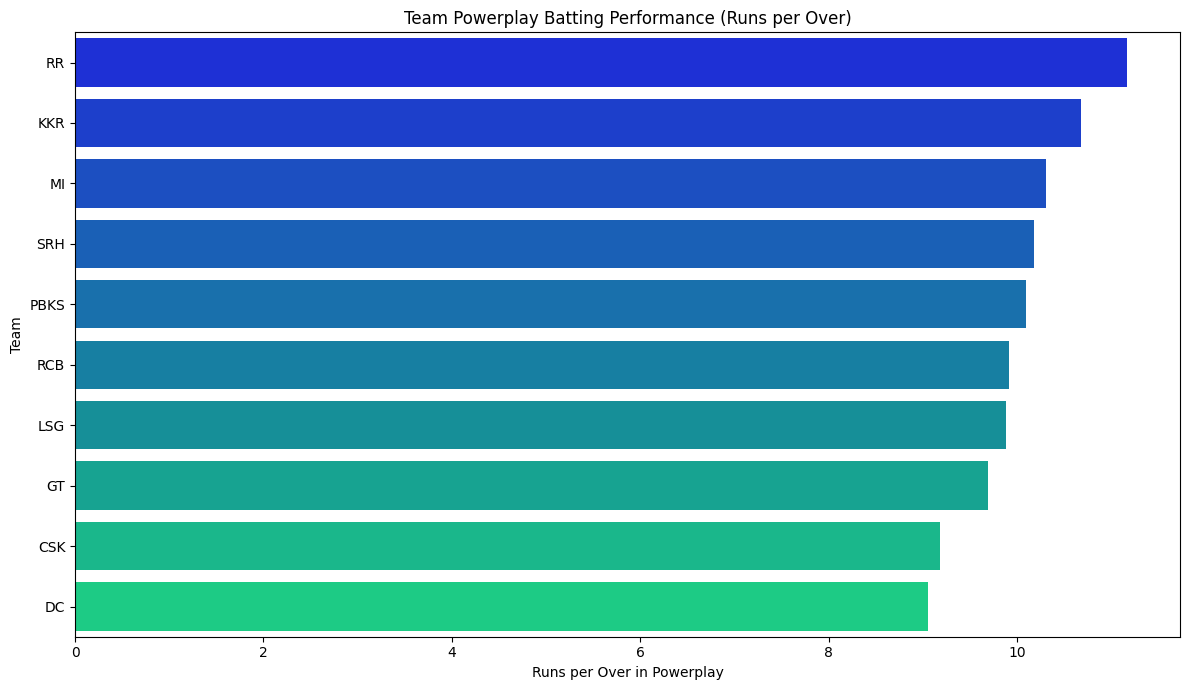

In [ ]:
# Filter for Powerplay overs (1-6)
powerplay_deliveries = deliveries[(deliveries['over'] >= 1) & (deliveries['over'] <= 6)].copy()

# Calculate total runs scored by each batting team in Powerplay
powerplay_runs = powerplay_deliveries.groupby('batting_team')['total_runs_conceded'].sum().reset_index()
powerplay_runs.columns = ['team', 'powerplay_runs']

# Calculate total deliveries faced by each batting team in Powerplay excluding wide/noballs for actual balls faced
powerplay_legal_balls = powerplay_deliveries[(powerplay_deliveries['wide'] == 0) & (powerplay_deliveries['noballs'] == 0)].groupby('batting_team').size().reset_index(name='powerplay_legal_balls_faced')
powerplay_legal_balls.columns = ['team', 'powerplay_legal_balls_faced']

powerplay_batting_performance = pd.merge(powerplay_runs, powerplay_legal_balls, on='team', how='left').fillna(0)

# Filter teams that faced at least a significant number of balls in Powerplay
powerplay_batting_performance_filtered = powerplay_batting_performance[powerplay_batting_performance['powerplay_legal_balls_faced'] >= 60].copy()


# Calculate runs per over in Powerplay
powerplay_batting_performance_filtered['powerplay_runs_per_over'] = (powerplay_batting_performance_filtered['powerplay_runs'] / powerplay_batting_performance_filtered['powerplay_legal_balls_faced']) * 6

# Sort by runs per over in Powerplay to find the best performance
best_powerplay_batting = powerplay_batting_performance_filtered.sort_values(by='powerplay_runs_per_over', ascending=False)
print("Teams with the Best Powerplay Batting Performance (Runs per Over, Min. 60 legal balls faced):\n", best_powerplay_batting)

plt.figure(figsize=(12, 7))
sns.barplot(x='powerplay_runs_per_over', y='team', data=best_powerplay_batting, palette='winter')

plt.title('Team Powerplay Batting Performance (Runs per Over)')
plt.xlabel('Runs per Over in Powerplay')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

## *Question-What was the average score at the 10-over mark for winning teams?*

In [ ]:
deliveries.columns

Index(['match_no', 'date', 'stage', 'venue', 'batting_team', 'bowling_team', 'innings', 'over', 'striker', 'bowler', 'runs_of_bat', 'extras', 'wide', 'legbyes', 'byes', 'noballs', 'wicket_type', 'player_dismissed', 'fielder', 'total_runs_conceded', 'total_runs_this_ball'], dtype='object')

In [ ]:
ipl.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner', 'toss_decision', 'first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts', 'match_result', 'match_winner', 'wb_runs', 'wb_wickets', 'balls_left', 'player_of_the_match', 'top_scorer', 'highscore', 'best_bowling', 'best_bowling_figure', 'team1_venue_type', 'team2_venue_type'], dtype='object')


Average score at the 10-over mark for winning teams: 95.75


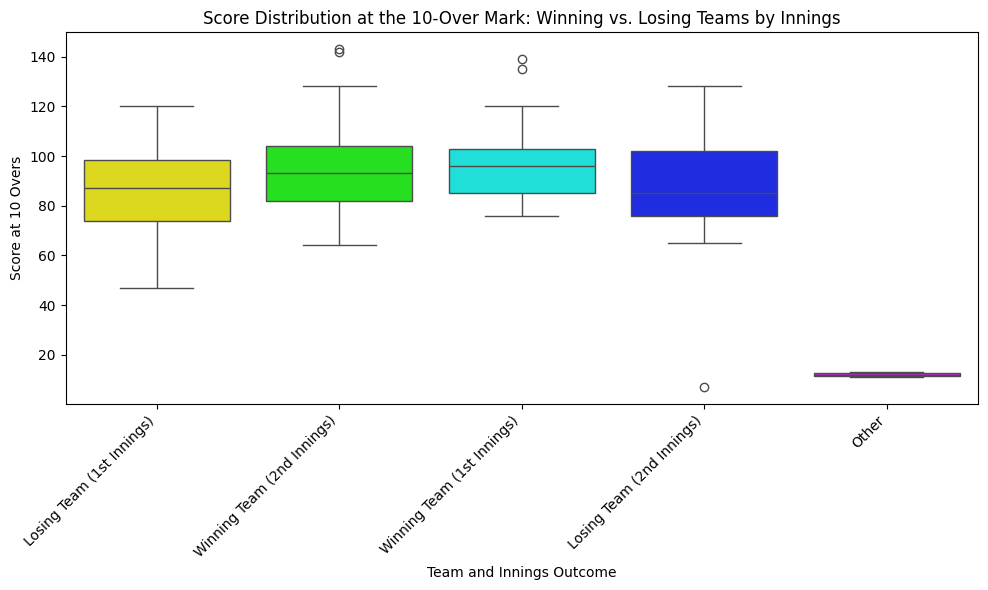

In [ ]:
# Identify winning teams
winning_teams = ipl['match_winner'].unique()

# Filter deliveries data to include only balls up to and including the 10th over (over == 10)
deliveries_10_overs = deliveries[deliveries['over'] <= 10].copy()

# Calculate cumulative runs for each innings within each match up to 10 overs
cumulative_runs_10_overs = deliveries_10_overs.groupby(['match_no', 'innings', 'batting_team'])['total_runs_conceded'].sum().reset_index()
cumulative_runs_10_overs.columns = ['match_no', 'innings', 'team', 'score_at_10_overs']


merged_data = pd.merge(cumulative_runs_10_overs, ipl[['match_id', 'match_winner', 'team1', 'team2']], left_on='match_no', right_on='match_id')

# Determine which innings is the winning team's innings
def get_innings_type(row):
    if row['match_winner'] == row['team'] and row['innings'] == 1:
        return 'Winning Team (1st Innings)'
    elif row['match_winner'] == row['team'] and row['innings'] == 2:
        return 'Winning Team (2nd Innings)'
    elif row['match_winner'] != row['team'] and row['innings'] == 1:
        return 'Losing Team (1st Innings)'
    elif row['match_winner'] != row['team'] and row['innings'] == 2:
        return 'Losing Team (2nd Innings)'
    else:
        return 'Other'

merged_data['innings_type'] = merged_data.apply(get_innings_type, axis=1)

# Filter for only winning teams' innings
winning_teams_10_overs_scores = merged_data[merged_data['innings_type'].isin(['Winning Team (1st Innings)', 'Winning Team (2nd Innings)'])].copy()

# Calculate the average score at the 10-over mark for winning teams
average_score_winning_teams = winning_teams_10_overs_scores['score_at_10_overs'].mean()

print(f"\nAverage score at the 10-over mark for winning teams: {average_score_winning_teams:.2f}")

# Box Plot Comparison of 10-over scores between winning and losing teams
plt.figure(figsize=(10, 6))
sns.boxplot(x='innings_type', y='score_at_10_overs', data=merged_data, palette='hsv')
plt.title('Score Distribution at the 10-Over Mark: Winning vs. Losing Teams by Innings')
plt.xlabel('Team and Innings Outcome')
plt.ylabel('Score at 10 Overs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## *Question-Which team lost the most wickets in the first 6 overs?*

Team that lost the most wickets in the first 6 overs:
    team  powerplay_wickets_lost
6  PBKS                      29
0   CSK                      26
1    DC                      21
9   SRH                      18
5    MI                      17
7   RCB                      15
8    RR                      15
3   KKR                      14
4   LSG                      12
2    GT                      11


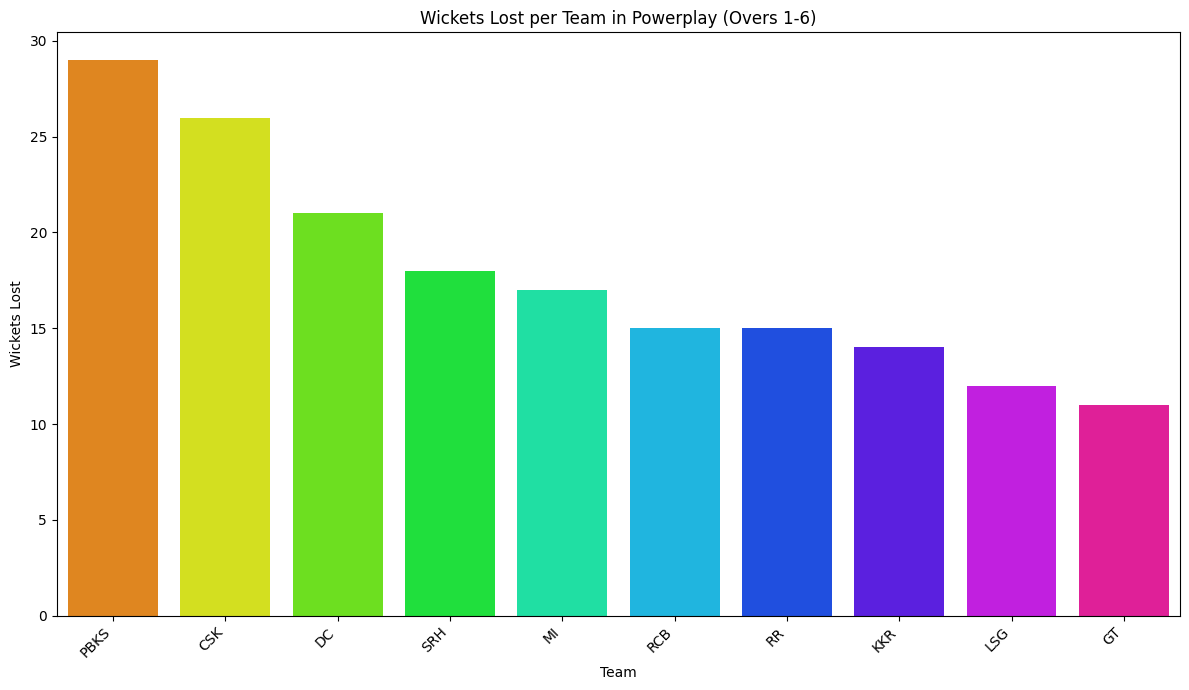

In [ ]:
# Filter deliveries for powerplay overs 1 to 6
powerplay_deliveries = deliveries[(deliveries['over'] >= 1) & (deliveries['over'] <= 6)].copy()

# Filter for wickets in powerplay excluding run outs and retired wickets
powerplay_wickets_deliveries = powerplay_deliveries[
    powerplay_deliveries['wicket_type'].notnull() &
    ~powerplay_deliveries['wicket_type'].isin(['run out', 'retired hurt', 'retired out'])
].copy()

# Count wickets lost by each batting team in powerplay
team_powerplay_wickets = powerplay_wickets_deliveries.groupby('batting_team').size().reset_index(name='powerplay_wickets_lost')
team_powerplay_wickets.columns = ['team', 'powerplay_wickets_lost']

# Sort by wickets lost to find the team that lost the most
team_most_powerplay_wickets = team_powerplay_wickets.sort_values(by='powerplay_wickets_lost', ascending=False)

print("Team that lost the most wickets in the first 6 overs:\n", team_most_powerplay_wickets)

plt.figure(figsize=(12, 7))
sns.barplot(x='team', y='powerplay_wickets_lost', data=team_most_powerplay_wickets, palette='hsv')
plt.title('Wickets Lost per Team in Powerplay (Overs 1-6)')
plt.xlabel('Team')
plt.ylabel('Wickets Lost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<a id='4-ball-by-ball-insights'></a>
## 4. Ball-by-Ball Insights

The `deliveries.csv` dataset captures every legal ball bowled in IPL 2025, allowing deep player-level and over-level insights. Here's what a granular look at this data reveals:

---

### 🏏 Batting Performance Insights

- **Most Aggressive Batsman**: ***Vaibhav Suravanshi***  led the strike rate charts with a blistering **198+** .
- **Death Over Masterclass**: ***Shreyas Iyer*** was unstoppable in overs 16–20, scoring at an exceptional **strike rate of 236+**.
- **Powerplay Boundary Machine**: ***Yashasvi Jaiswal*** smashed **55 boundaries** by help of 35 fours, 20 sixes in overs 1–6  the most in the tournament.
- **Dot Ball Pressure**: *Andre Russell* faced the most pressure, recording a **dot ball percentage of 55.56%**.
- **Best Runner Between Wickets**: ***Ravindra Jadeja*** showcased elite fitness and awareness, scoring **46.6% of his runs** through singles and doubles.

---

### 🎯 Bowling Performance Insights

- **Death Over Economy King**: *Kuldeep Yadav* was the most economical bowler in overs 16–20 with a superb **economy rate of 5.20**.
- **Dot Ball Machine**: *Mohammed Siraj* bowled a tournament-high **141 dot balls**, building immense pressure for his team.
- **Strike Rate Specialist**: *William O’Rourke* had the best **strike rate** among bowlers—just **10.3 balls per wicket**.
- **Most Common Dismissal Type**: **Caught outs** dominated dismissals, accounting for **622 wickets which is 71.1%**.
- **Top-order Slayer**: *Josh Hazlewood* led with **9 wickets** in overs 1–6, excelling with the new ball.

---

### 📊 Match Flow & Over-by-Over Dynamics

- **Most Expensive Over**: The **19.4th over** across matches conceded **216 total runs**, often proving costly in close contests.
- **Innings Run Rate Trends According to Match Phase**:
    - **Innings 1**:
      - Powerplay: 1.68 runs/ball  
      - Middle Overs: 1.46 runs/ball  
      - Death Overs: 1.93 runs/ball
    - **Innings 2**:
      - Powerplay: 1.65 runs/ball  
      - Middle Overs: 1.58 runs/ball  
      - Death Overs: 1.77 runs/ball

- **Powerplay Dominance**: *Rajasthan Royals (RR)* scored at **11+ runs per over** in the powerplay — the best among all teams.
- **10-Over Benchmark**: Winning teams averaged **95.75 runs** at the **10-over mark**, a strong indicator of momentum.
- **Early Wicket Trouble**: *PBKS* lost the most wickets in powerplays (1–6 overs), with a total of **29 wickets lost**, often putting them under pressure early.

---


### 🍊 About `orange_cap.csv`

The `orange_cap.csv` file summarizes **batting performance statistics** for all players during the IPL 2025 season. It captures key indicators that help us evaluate consistency, aggression, and match-winning ability across games.

#### 📌 Key Columns and What They Represent:

- **Position**: Rank of the batsman based on total runs scored.
- **Batsman** & **Team**: Player name and the IPL franchise they played for.
- **Matches**, **Innings**, **Not_out**: Appearances and innings batted, along with how many times they remained not out.
- **Runs** & **Highest_score**: Total runs scored and highest individual score in a single innings.
- **Average**: Batting average (Runs / (Innings - Not Out)).
- **Balls_faced** & **Strike_rate**: Number of balls faced and scoring speed (runs per 100 balls).
- **Hundreds**, **Fifties**, **Ducks**: Century (100+), half-century (50+), and 0-run innings counts.
- **Fours**, **Sixes**, **Boundary_Runs**, **Total_Runs**: Distribution of runs by boundaries.
- **Boundary_Percentage**: Percentage of total runs coming from boundaries.
- **30_Plus_Scores**: Number of innings where the player scored 30 or more runs.

#### 🎯 Why It’s Important:
This dataset helps identify:
- Most consistent and impactful batsmen
- Fastest scorers under pressure
- Big-match players (via high score and 30+ stats)
- Aggression vs. accumulation strategies
- Team dependency on top-order strength

With this data, we can compare players phase-wise, analyze scoring patterns, and correlate batting dominance with team success.

In [ ]:
best_batsman = pd.read_csv('orange_cap.csv')

In [ ]:
best_batsman.head()

,Position,Batsman,Team,Matches,Innings,Not_out,Runs,Highest_score,Average,Balls_faced,Strike_rate,Hundreds,Fifties,Ducks,Fours,Sixes
0,1,Sai Sudharsan,GT,15,15,1,759,108,54.21,486,156.17,1,6,0,88,21
1,2,Suryakumar Yadav,MI,16,16,5,717,73,65.18,427,167.91,0,5,0,69,38
2,3,Virat Kohli,RCB,15,15,3,657,73,54.75,454,144.71,0,8,0,66,19
3,4,Shubman Gill,GT,15,15,2,650,93,50.00,417,155.87,0,6,0,62,24
4,5,Mitchell Marsh,LSG,13,13,0,627,117,48.23,383,163.70,1,6,2,56,37


In [ ]:
best_batsman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Position       15 non-null     int64  
 1   Batsman        15 non-null     object 
 2   Team           15 non-null     object 
 3   Matches        15 non-null     int64  
 4   Innings        15 non-null     int64  
 5   Not_out        15 non-null     int64  
 6   Runs           15 non-null     int64  
 7   Highest_score  15 non-null     int64  
 8   Average        15 non-null     float64
 9   Balls_faced    15 non-null     int64  
 10  Strike_rate    15 non-null     float64
 11  Hundreds       15 non-null     int64  
 12  Fifties        15 non-null     int64  
 13  Ducks          15 non-null     int64  
 14  Fours          15 non-null     int64  
 15  Sixes          15 non-null     int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 2.0+ KB


## *Question-Who had the highest batting average ?*

Batsmen with the highest batting average (Min. 10 innings):
    Position           Batsman Team  Matches  Innings  Not_out  Runs  Highest_score  Average  Balls_faced  Strike_rate  Hundreds  Fifties  Ducks  Fours  Sixes
1         2  Suryakumar Yadav   MI       16       16        5   717             73    65.18          427       167.91         0        5      0     69     38
9        10       Jos Buttler   GT       14       13        4   538             97    59.77          330       163.03         0        5      1     52     24
2         3       Virat Kohli  RCB       15       15        3   657             73    54.75          454       144.71         0        8      0     66     19
0         1     Sai Sudharsan   GT       15       15        1   759            108    54.21          486       156.17         1        6      0     88     21
8         9          KL Rahul   DC       13       13        3   539            112    53.90          360       149.72         1        3      0     5

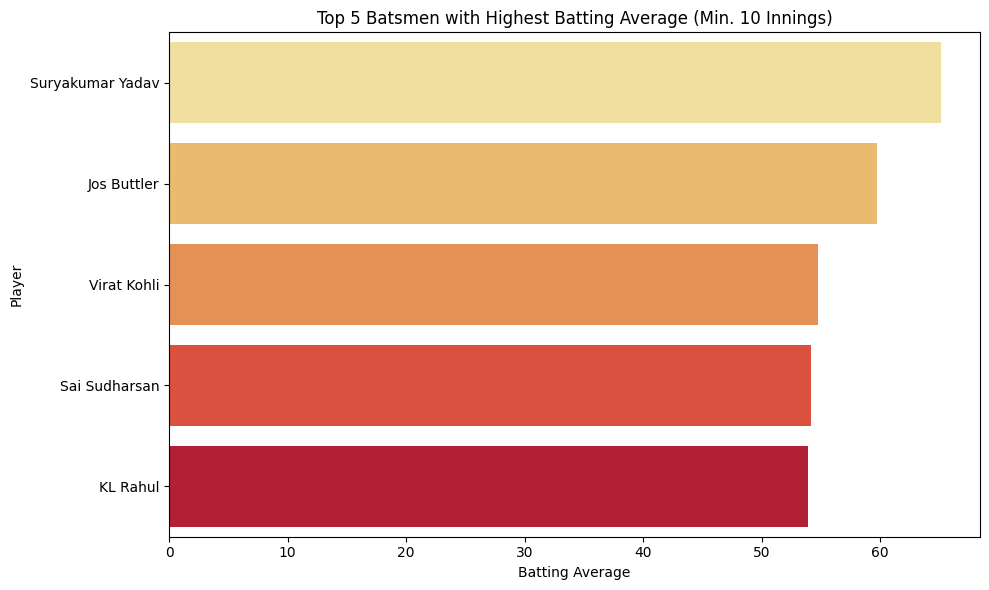

In [ ]:
# Filter for players with at least 10 innings
best_batsman_filtered = best_batsman[best_batsman['Innings'] >= 10].copy()

# Sort by average
best_batsman_avg = best_batsman_filtered.sort_values(by='Average', ascending=False).head(5)

print("Batsmen with the highest batting average (Min. 10 innings):\n", best_batsman_avg)

plt.figure(figsize=(10, 6))
sns.barplot(x='Average', y='Batsman', data=best_batsman_avg, palette='YlOrRd')
plt.title('Top 5 Batsmen with Highest Batting Average (Min. 10 Innings)')
plt.xlabel('Batting Average')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

## *Question-Who had the highest boundary percentage?*

In [ ]:
best_batsman.columns

Index(['Position', 'Batsman', 'Team', 'Matches', 'Innings', 'Not_out', 'Runs', 'Highest_score', 'Average', 'Balls_faced', 'Strike_rate', 'Hundreds', 'Fifties', 'Ducks', 'Fours', 'Sixes'], dtype='object')

Batsmen with the highest boundary percentage (Min. 100 runs):
               Batsman  Boundary_Percentage  Total_Runs  Fours  Sixes
14    Abhishek Sharma            80.182232         439     46     28
10    Nicholas Pooran            80.152672         524     45     40
12      Priyansh Arya            77.894737         475     55     25
7   Prabhsimran Singh            73.588342         549     56     30
6    Yashasvi Jaiswal            72.987478         559     60     28
4      Mitchell Marsh            71.132376         627     56     37
1    Suryakumar Yadav            70.292887         717     69     38
5        Shreyas Iyer            67.218543         604     43     39
9         Jos Buttler            65.427509         538     52     24
11   Heinrich Klaasen            65.297741         487     42     25


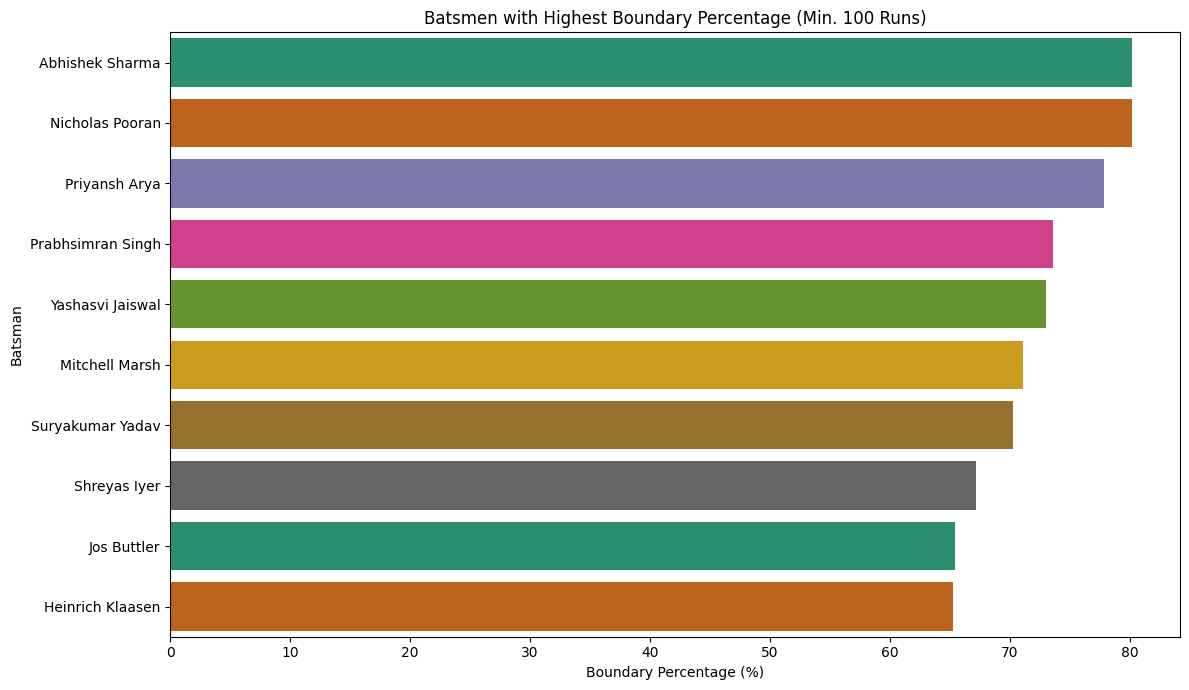

In [ ]:
best_batsman['Boundary_Runs'] = (best_batsman['Fours'] * 4) + (best_batsman['Sixes'] * 6)
best_batsman['Total_Runs'] = best_batsman['Runs']
best_batsman['Boundary_Percentage'] = (best_batsman['Boundary_Runs'] / best_batsman['Total_Runs']) * 100

# Handle cases where Total_Runs is 0 to avoid division by zero
best_batsman['Boundary_Percentage'] = best_batsman['Boundary_Percentage'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Filter for players who scored at least a significant number of runs which is greater than equal to 100
best_batsman_filtered_runs = best_batsman[best_batsman['Total_Runs'] >= 100].copy()


best_batsman_boundary_percentage = best_batsman_filtered_runs.sort_values(by='Boundary_Percentage', ascending=False).head(10)

print("Batsmen with the highest boundary percentage (Min. 100 runs):\n", best_batsman_boundary_percentage[['Batsman', 'Boundary_Percentage', 'Total_Runs', 'Fours', 'Sixes']])


plt.figure(figsize=(12, 7))
sns.barplot(x='Boundary_Percentage', y='Batsman', data=best_batsman_boundary_percentage, palette='Dark2')
plt.title('Batsmen with Highest Boundary Percentage (Min. 100 Runs)')
plt.xlabel('Boundary Percentage (%)')
plt.ylabel('Batsman')
plt.tight_layout()
plt.show()

## *Question-Which batsman scored the most runs in winning causes?*

In [124]:
ipl = ipl.rename(columns={'match_id': 'match_no'})

              Batsman  Runs_Winning  Career_Runs  Win_Contribution_%
93      Sai Sudharsan           448        759.0           59.025033
105      Shreyas Iyer           431        604.0           71.357616
106      Shubman Gill           424        650.0           65.230769
109  Suryakumar Yadav           369        717.0           51.464435
78      Priyansh Arya           333        475.0           70.105263
60     Mitchell Marsh           314        627.0           50.079745
2     Abhishek Sharma           290        439.0           66.059226


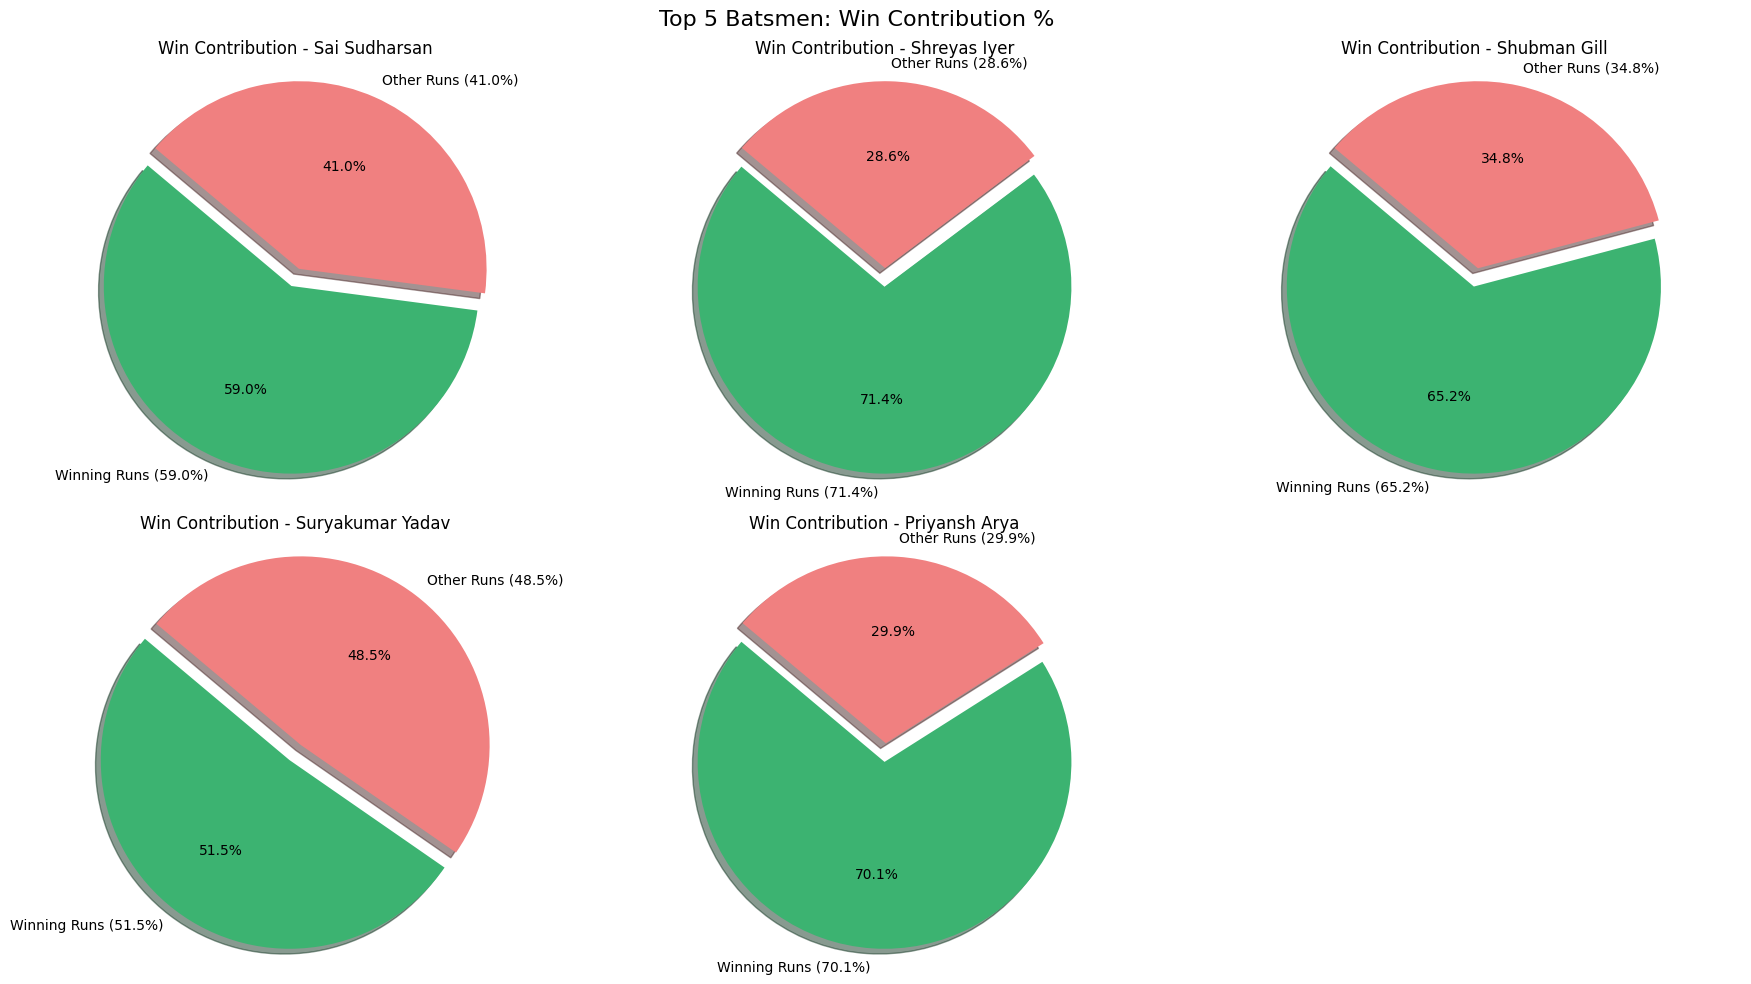

In [ ]:
#Filter matches with a valid winner
winning_matches = ipl[ipl['match_winner'].notnull()][['match_no', 'match_winner']]

deliveries_with_winner = deliveries.merge(winning_matches, on='match_no', how='inner')

#Filter rows where the winning team was batting
winning_team_batting = deliveries_with_winner[
    deliveries_with_winner['batting_team'] == deliveries_with_winner['match_winner']
]

#Calculate total runs scored by each batsman in winning causes
runs_in_winning_causes = (
    winning_team_batting
    .groupby('striker')['runs_of_bat']
    .sum()
    .reset_index()
    .rename(columns={'striker': 'Batsman', 'runs_of_bat': 'Runs_Winning'})
)


batsman_total_runs = best_batsman[['Batsman', 'Runs']].rename(columns={'Runs': 'Career_Runs'})
merged = runs_in_winning_causes.merge(batsman_total_runs, on='Batsman', how='left')

#Filter players with >= 100 career runs to avoid inflation
merged = merged[merged['Career_Runs'] >= 100].copy()

# Calculate Win Contribution Percentage
merged['Win_Contribution_%'] = (merged['Runs_Winning'] / merged['Career_Runs']) * 100

#Sort to get top 10 batsmen by runs in winning causes
top_batsmen = merged.sort_values(by='Runs_Winning', ascending=False).head(10)
print(top_batsmen[['Batsman', 'Runs_Winning', 'Career_Runs', 'Win_Contribution_%']])



plt.figure(figsize=(18, 10))
for plot_index, (_, row) in enumerate(top_batsmen.head(5).iterrows(), start=1):
    plt.subplot(2, 3, plot_index)

    win_percent = row['Win_Contribution_%']
    runs_win = row['Runs_Winning']
    other_runs = row['Career_Runs'] - row['Runs_Winning']

    labels = [
        f'Winning Runs ({win_percent:.1f}%)',
        f'Other Runs ({100 - win_percent:.1f}%)'
    ]
    sizes = [runs_win, other_runs]
    colors = ['mediumseagreen', 'lightcoral']
    explode = (0.1, 0)

    plt.pie(
        sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140
    )
    plt.title(f'Win Contribution - {row["Batsman"]}', fontsize=12)
    plt.axis('equal')

plt.suptitle('Top 5 Batsmen: Win Contribution %', fontsize=16)
plt.tight_layout()
plt.show()




## *Question-Who had the best strike rate in chases vs. first innings?*


Batsmen with the Best Strike Rate in Chases (Min. 50 balls in each innings type, >= 500 career runs):
             Batsman  Runs  First_Innings_SR  Chasing_SR
1  Suryakumar Yadav   717        155.849057  174.712644
4      Shreyas Iyer   604        167.788462  168.874172
0     Sai Sudharsan   759        145.922747  151.811594
2      Shubman Gill   650        158.371041  142.180095
3    Mitchell Marsh   627        160.534125  136.507937

Batsmen with the Best Strike Rate in First Innings (Min. 50 balls in each innings type, >= 500 career runs):
             Batsman  Runs  First_Innings_SR  Chasing_SR
4      Shreyas Iyer   604        167.788462  168.874172
3    Mitchell Marsh   627        160.534125  136.507937
2      Shubman Gill   650        158.371041  142.180095
1  Suryakumar Yadav   717        155.849057  174.712644
0     Sai Sudharsan   759        145.922747  151.811594


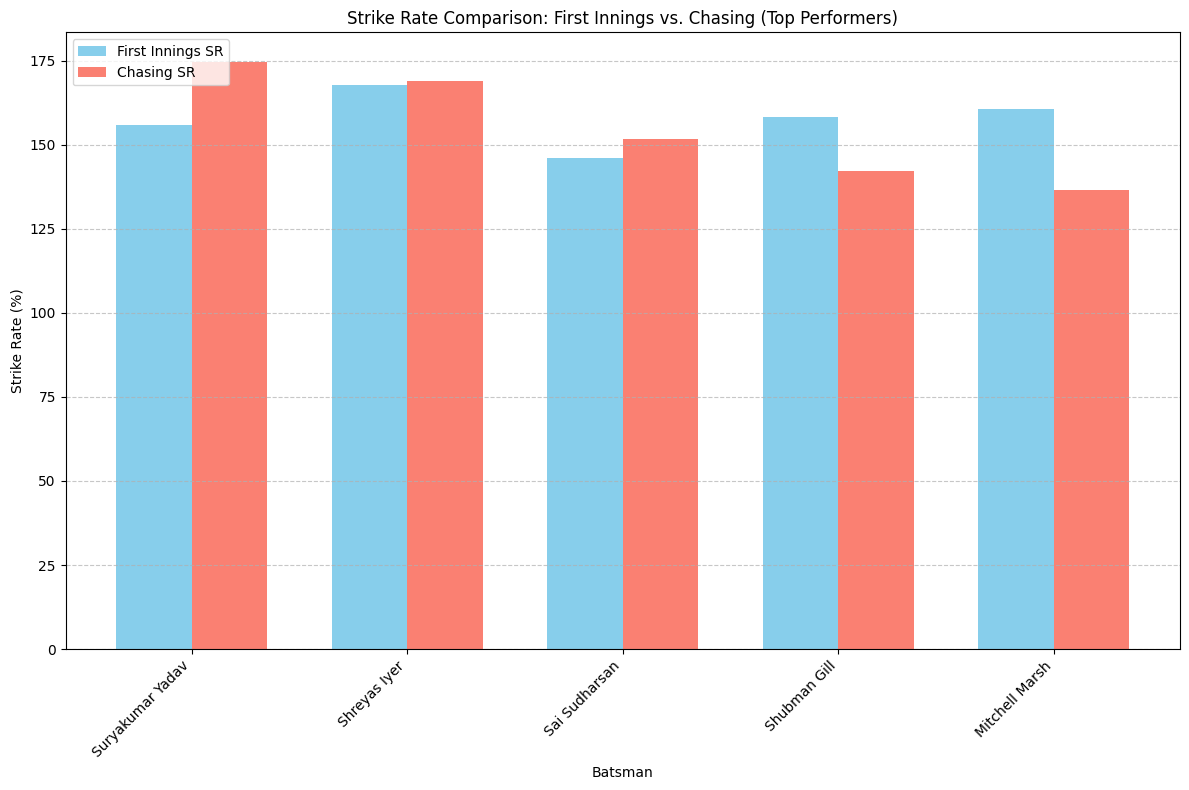

In [ ]:
# Function to calculate strike rate for a given innings
def calculate_strike_rate_innings(deliveries_df, innings_num):
    innings_deliveries = deliveries_df[deliveries_df['innings'] == innings_num].copy()
    batsman_runs = innings_deliveries.groupby('striker')['runs_of_bat'].sum().reset_index()
    batsman_balls = innings_deliveries.groupby('striker').size().reset_index(name='balls_faced')

    strike_rate_df = pd.merge(batsman_runs, batsman_balls, on='striker', how='left')

    # Filter for batsmen with at least 50 balls faced in this innings
    strike_rate_df_filtered = strike_rate_df[strike_rate_df['balls_faced'] >= 50].copy()

    strike_rate_df_filtered['strike_rate'] = (strike_rate_df_filtered['runs_of_bat'] / strike_rate_df_filtered['balls_faced']) * 100

    return strike_rate_df_filtered[['striker', 'strike_rate']].rename(columns={'striker': 'Batsman'})

# Calculate strike rate for 1st innings
first_innings_sr = calculate_strike_rate_innings(deliveries, 1)
first_innings_sr.columns = ['Batsman', 'First_Innings_SR']

# Calculate strike rate for 2nd innings (chase)
second_innings_sr = calculate_strike_rate_innings(deliveries, 2)
second_innings_sr.columns = ['Batsman', 'Chasing_SR']

strike_rate_comparison = pd.merge(first_innings_sr, second_innings_sr, on='Batsman', how='inner')

best_batsman_filtered_runs = best_batsman[best_batsman['Runs'] >= 500].copy()

strike_rate_merged = pd.merge(best_batsman_filtered_runs[['Batsman', 'Runs']], strike_rate_comparison, on='Batsman', how='inner')

best_chasing_sr = strike_rate_merged.sort_values(by='Chasing_SR', ascending=False).head(10)
print("\nBatsmen with the Best Strike Rate in Chases (Min. 50 balls in each innings type, >= 500 career runs):\n", best_chasing_sr)

# Sort by First Innings Strike Rate
best_first_innings_sr = strike_rate_merged.sort_values(by='First_Innings_SR', ascending=False).head(10)
print("\nBatsmen with the Best Strike Rate in First Innings (Min. 50 balls in each innings type, >= 500 career runs):\n", best_first_innings_sr)

# Select top batsmen based on overall strike rate comparison or highest SR in either innings
top_batsmen_for_plot = strike_rate_merged.sort_values(by=['Chasing_SR', 'First_Innings_SR'], ascending=False).head(10).copy()

fig, ax1 = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(top_batsmen_for_plot['Batsman']))

bars1 = ax1.bar(index, top_batsmen_for_plot['First_Innings_SR'], bar_width, label='First Innings SR', color='skyblue')
bars2 = ax1.bar(index + bar_width, top_batsmen_for_plot['Chasing_SR'], bar_width, label='Chasing SR', color='salmon')

ax1.set_xlabel('Batsman')
ax1.set_ylabel('Strike Rate (%)')
ax1.set_title('Strike Rate Comparison: First Innings vs. Chasing (Top Performers)')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(top_batsmen_for_plot['Batsman'], rotation=45, ha='right')
ax1.legend(loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

## *Question-How did the top 5 run-scorers perform in different match phases?*

Top 5 Run-Scorers Performance Across Match Phases:
              Batsman      match_phase  Runs  Balls_Faced  Strike_Rate
2     Mitchell Marsh  Powerplay (1-6)   258          160   161.250000
1     Mitchell Marsh    Middle (7-15)   253          161   157.142857
0     Mitchell Marsh    Death (16-20)    23           11   209.090909
5      Sai Sudharsan  Powerplay (1-6)   340          210   161.904762
4      Sai Sudharsan    Middle (7-15)   248          180   137.777778
3      Sai Sudharsan    Death (16-20)    44           21   209.523810
8       Shubman Gill  Powerplay (1-6)   249          171   145.614035
7       Shubman Gill    Middle (7-15)   249          156   159.615385
6       Shubman Gill    Death (16-20)    45           24   187.500000
11  Suryakumar Yadav  Powerplay (1-6)    77           61   126.229508
10  Suryakumar Yadav    Middle (7-15)   488          294   165.986395
9   Suryakumar Yadav    Death (16-20)    83           43   193.023256


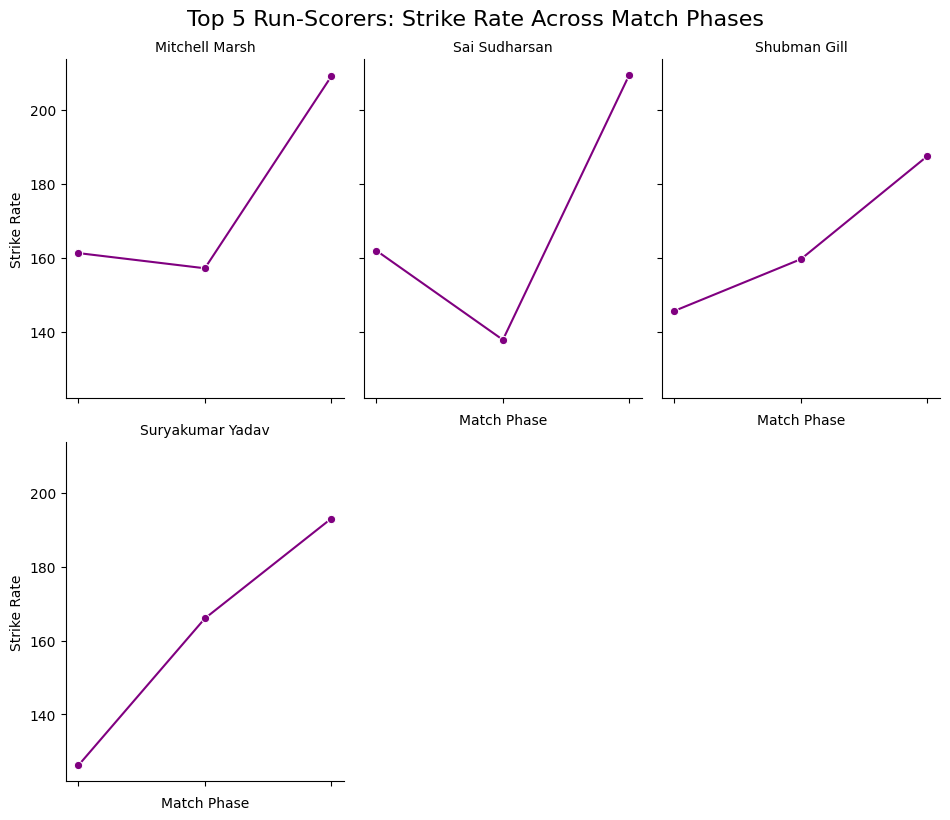

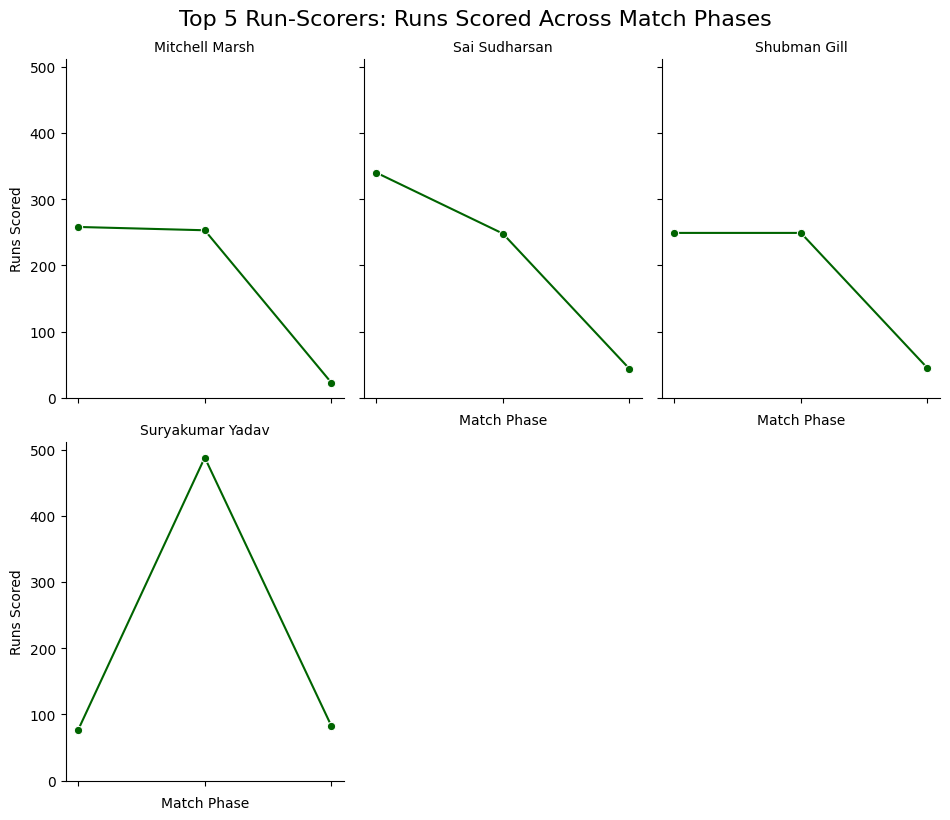

In [ ]:
# Get the top 5 run-scorers from best_batsman
top_5_batsmen_names = best_batsman.sort_values(by='Runs', ascending=False).head(5)['Batsman'].tolist()

# Filter deliveries data for these top 5 batsmen
top_batsmen_deliveries = deliveries[deliveries['striker'].isin(top_5_batsmen_names)].copy()

# Define match phases based on overs
def get_match_phase(over):
    if 1 <= over <= 6:
        return 'Powerplay (1-6)'
    elif 7 <= over <= 15:
        return 'Middle (7-15)'
    elif 16 <= over <= 20:
        return 'Death (16-20)'
    return 'Other'

top_batsmen_deliveries['match_phase'] = top_batsmen_deliveries['over'].apply(get_match_phase)

# Filter out 'Other' phase
top_batsmen_deliveries_filtered = top_batsmen_deliveries[top_batsmen_deliveries['match_phase'] != 'Other'].copy()

# Calculate runs scored by each batsman in each match phase
batsman_phase_runs = top_batsmen_deliveries_filtered.groupby(['striker', 'match_phase'])['runs_of_bat'].sum().reset_index()
batsman_phase_runs.columns = ['Batsman', 'match_phase', 'Runs']

# Calculate balls faced by each batsman in each match phase
batsman_phase_balls = top_batsmen_deliveries_filtered.groupby(['striker', 'match_phase']).size().reset_index(name='Balls_Faced')
batsman_phase_balls.columns = ['Batsman', 'match_phase', 'Balls_Faced']

# Merge runs and balls faced
batsman_phase_stats = pd.merge(batsman_phase_runs, batsman_phase_balls, on=['Batsman', 'match_phase'], how='left').fillna(0)

# Calculate Strike Rate for each phase
batsman_phase_stats['Strike_Rate'] = (batsman_phase_stats['Runs'] / batsman_phase_stats['Balls_Faced']) * 100
batsman_phase_stats['Strike_Rate'] = batsman_phase_stats['Strike_Rate'].replace([np.inf, -np.inf], np.nan).fillna(0)


# Order the match phases for plotting
phase_order = ['Powerplay (1-6)', 'Middle (7-15)', 'Death (16-20)']
batsman_phase_stats['match_phase'] = pd.Categorical(batsman_phase_stats['match_phase'], categories=phase_order, ordered=True)
batsman_phase_stats = batsman_phase_stats.sort_values(['Batsman', 'match_phase'])

print("Top 5 Run-Scorers Performance Across Match Phases:\n", batsman_phase_stats)

# Create the Small Multiples Line Charts
g = sns.FacetGrid(batsman_phase_stats, col='Batsman', col_wrap=3, height=4, aspect=0.8)
g = g.map(sns.lineplot, 'match_phase', 'Strike_Rate', marker='o', color='purple')
g.set_axis_labels("Match Phase", "Strike Rate")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
plt.tight_layout()
plt.suptitle('Top 5 Run-Scorers: Strike Rate Across Match Phases', y=1.02, fontsize=16) # Add a main title
plt.show()
# runs per phase
g = sns.FacetGrid(batsman_phase_stats, col='Batsman', col_wrap=3, height=4, aspect=0.8)
g = g.map(sns.lineplot, 'match_phase', 'Runs', marker='o', color='darkgreen')
g.set_axis_labels("Match Phase", "Runs Scored")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
plt.tight_layout()
plt.suptitle('Top 5 Run-Scorers: Runs Scored Across Match Phases', y=1.02, fontsize=16) # Add a main title
plt.show()

## *Question-Who was the most impactful batsman?*

Most Impactful Batsmen (Runs Per Match, Min. 10 Matches):
              Batsman  Runs  Matches  Runs_Per_Match
0      Sai Sudharsan   759       15       50.600000
4     Mitchell Marsh   627       13       48.230769
1   Suryakumar Yadav   717       16       44.812500
2        Virat Kohli   657       15       43.800000
3       Shubman Gill   650       15       43.333333
8           KL Rahul   539       13       41.461538
6   Yashasvi Jaiswal   559       14       39.928571
9        Jos Buttler   538       14       38.428571
10   Nicholas Pooran   524       14       37.428571
5       Shreyas Iyer   604       17       35.529412


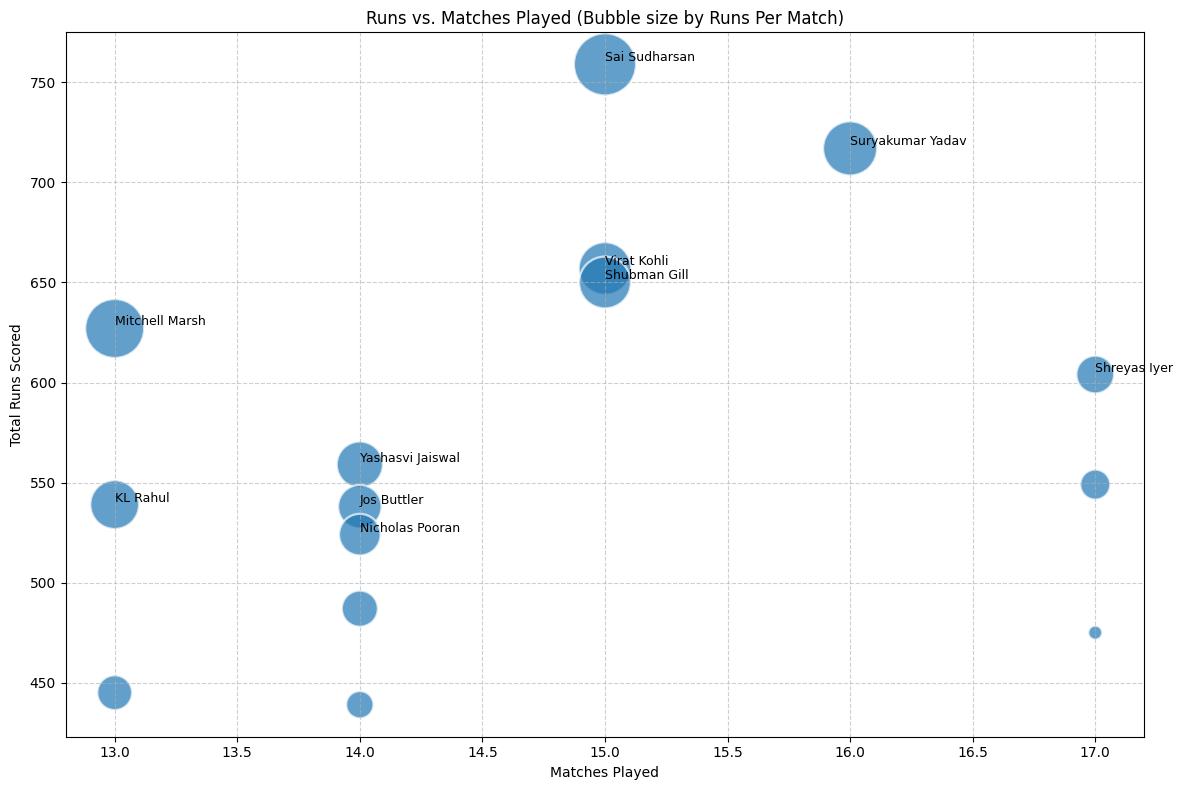

In [ ]:
batsman_impact = best_batsman[['Batsman', 'Runs', 'Matches']].copy()

# Calculate Runs Per Match
batsman_impact['Runs_Per_Match'] = batsman_impact['Runs'] / batsman_impact['Matches']

# Filter for batsmen who played a significant number of matches
batsman_impact_filtered = batsman_impact[batsman_impact['Matches'] >= 10].copy()

# Sort by Runs Per Match to find the most impactful
most_impactful_batsmen = batsman_impact_filtered.sort_values(by='Runs_Per_Match', ascending=False).head(10)

print("Most Impactful Batsmen (Runs Per Match, Min. 10 Matches):\n", most_impactful_batsmen)

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='Matches',
    y='Runs',
    size='Runs_Per_Match',
    sizes=(100, 2000),
    data=batsman_impact_filtered,
    alpha=0.7,
    palette='rainbow',
    legend=False
)

# Add text labels for the top impactful batsmen
top_n_impactful = most_impactful_batsmen.head(10)
for i, row in top_n_impactful.iterrows():
    plt.text(row['Matches'], row['Runs'], row['Batsman'], fontsize=9, ha='left', va='bottom')

plt.title('Runs vs. Matches Played (Bubble size by Runs Per Match)')
plt.xlabel('Matches Played')
plt.ylabel('Total Runs Scored')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## *Question-Which batsman had the best conversion rate (50s to 100s)?*

In [ ]:
best_batsman.columns

Index(['Position', 'Batsman', 'Team', 'Matches', 'Innings', 'Not_out', 'Runs', 'Highest_score', 'Average', 'Balls_faced', 'Strike_rate', 'Hundreds', 'Fifties', 'Ducks', 'Fours', 'Sixes', 'Boundary_Runs', 'Total_Runs', 'Boundary_Percentage'], dtype='object')

Batsmen with the Best Conversion Rate (50s to 100s, Min. 5 scores of 50+):
              Batsman  Fifties  Hundreds  Total_50_Plus  Conversion_Percentage
0      Sai Sudharsan        6         1              7              14.285714
4     Mitchell Marsh        6         1              7              14.285714
1   Suryakumar Yadav        5         0              5               0.000000
2        Virat Kohli        8         0              8               0.000000
3       Shubman Gill        6         0              6               0.000000
5       Shreyas Iyer        6         0              6               0.000000
6   Yashasvi Jaiswal        6         0              6               0.000000
9        Jos Buttler        5         0              5               0.000000
10   Nicholas Pooran        5         0              5               0.000000
13     Aiden Markram        5         0              5               0.000000


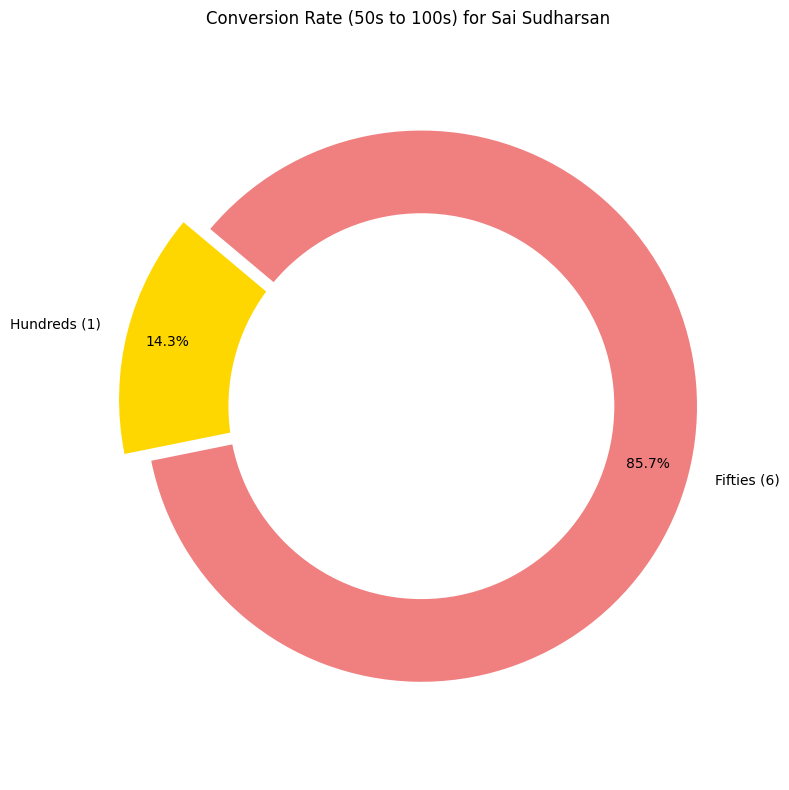

In [ ]:
# Filter for batsmen who have scored at least one 50 or 100
batsman_conversion_stats = best_batsman[(best_batsman['Fifties'] > 0) | (best_batsman['Hundreds'] > 0)].copy()

# Calculate total number of 50+ scores (50s + 100s)
batsman_conversion_stats['Total_50_Plus'] = batsman_conversion_stats['Fifties'] + batsman_conversion_stats['Hundreds']

# Filter for batsmen with at least 5 50+ scores to have a meaningful conversion rate
batsman_conversion_stats_filtered = batsman_conversion_stats[batsman_conversion_stats['Total_50_Plus'] >= 5].copy()

# Calculate conversion percentage (100s out of 50+ scores)
batsman_conversion_stats_filtered['Conversion_Percentage'] = (batsman_conversion_stats_filtered['Hundreds'] / batsman_conversion_stats_filtered['Total_50_Plus']) * 100

# Sort by Conversion Percentage
best_conversion_batsmen = batsman_conversion_stats_filtered.sort_values(by='Conversion_Percentage', ascending=False).head(10)

print("Batsmen with the Best Conversion Rate (50s to 100s, Min. 5 scores of 50+):\n", best_conversion_batsmen[['Batsman', 'Fifties', 'Hundreds', 'Total_50_Plus', 'Conversion_Percentage']])


# Create a donut chart for the top batsman's conversion
if not best_conversion_batsmen.empty:
    top_batsman_conversion = best_conversion_batsmen.iloc[0]
    labels = [f'Hundreds ({top_batsman_conversion["Hundreds"]})', f'Fifties ({top_batsman_conversion["Fifties"]})']
    sizes = [top_batsman_conversion['Hundreds'], top_batsman_conversion['Fifties']]
    colors = ['gold', 'lightcoral']
    explode = (0.1, 0)

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85)

    # Draw a circle in the middle to create the donut effect
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title(f'Conversion Rate (50s to 100s) for {top_batsman_conversion["Batsman"]}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

## *Question-Who had the highest frequency of 30+ scores?*

In [ ]:
best_batsman.columns

Index(['Position', 'Batsman', 'Team', 'Matches', 'Innings', 'Not_out', 'Runs', 'Highest_score', 'Average', 'Balls_faced', 'Strike_rate', 'Hundreds', 'Fifties', 'Ducks', 'Fours', 'Sixes', 'Boundary_Runs', 'Total_Runs', 'Boundary_Percentage'], dtype='object')

Batsmen with the Highest Frequency of 30+ Scores (Min. 10 Innings):
              Batsman  Innings  30_Plus_Scores  30_Plus_Frequency
4     Mitchell Marsh       13               7           0.538462
2        Virat Kohli       15               8           0.533333
0      Sai Sudharsan       15               7           0.466667
6   Yashasvi Jaiswal       14               6           0.428571
3       Shubman Gill       15               6           0.400000
13     Aiden Markram       13               5           0.384615
9        Jos Buttler       13               5           0.384615
10   Nicholas Pooran       14               5           0.357143
5       Shreyas Iyer       17               6           0.352941
1   Suryakumar Yadav       16               5           0.312500


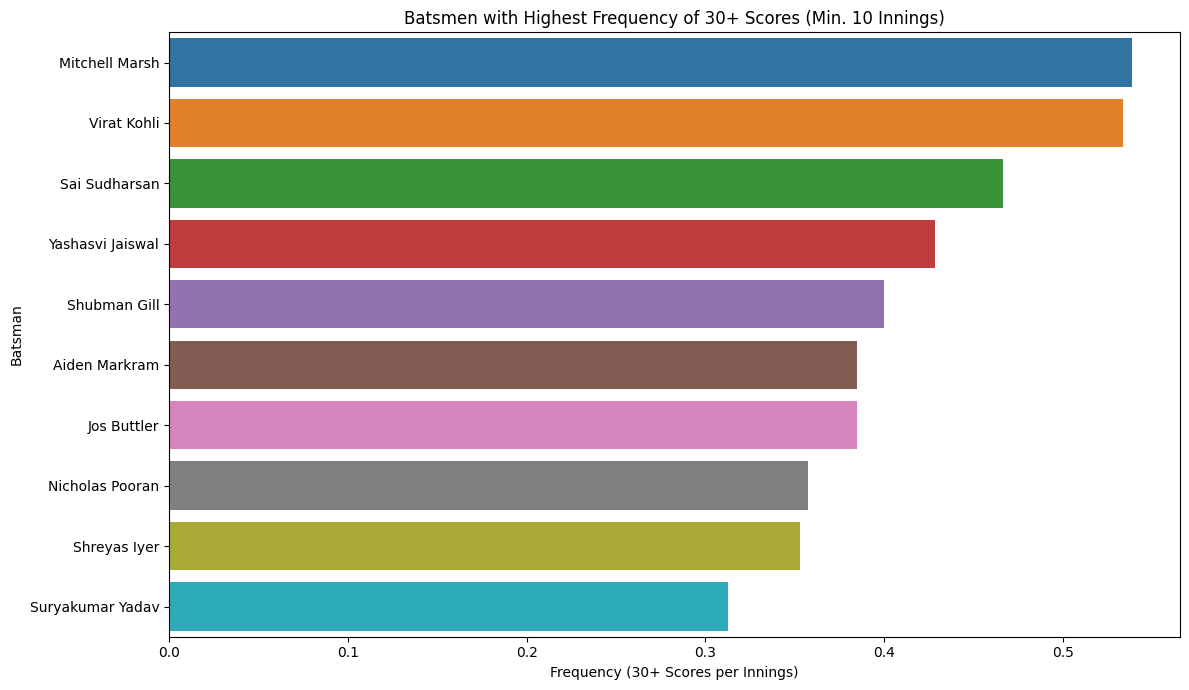

In [ ]:
best_batsman['30_Plus_Scores'] = best_batsman['Fifties'] + best_batsman['Hundreds']

# Calculate total innings played
best_batsman_filtered = best_batsman[best_batsman['Innings'] >= 10].copy() # Filter for batsmen with enough innings

# Calculate frequency as (30+ Scores / Innings)
best_batsman_filtered['30_Plus_Frequency'] = (best_batsman_filtered['30_Plus_Scores'] / best_batsman_filtered['Innings'])

# Sort by frequency to find the highest
highest_frequency_30_plus = best_batsman_filtered.sort_values(by='30_Plus_Frequency', ascending=False).head(10)

print("Batsmen with the Highest Frequency of 30+ Scores (Min. 10 Innings):\n", highest_frequency_30_plus[['Batsman', 'Innings', '30_Plus_Scores', '30_Plus_Frequency']])

plt.figure(figsize=(12, 7))
sns.barplot(x='30_Plus_Frequency', y='Batsman', data=highest_frequency_30_plus, palette='tab10')
plt.title('Batsmen with Highest Frequency of 30+ Scores (Min. 10 Innings)')
plt.xlabel('Frequency (30+ Scores per Innings)')
plt.ylabel('Batsman')
plt.tight_layout()
plt.show()


<a id='5-batting-dominance'></a>
## 5. Batting Dominance

This section dives deep into IPL 2025's top batting performances, powered by insights from the `orange_cap.csv` dataset. We analyzed consistency, strike rates, boundary-hitting ability, and impact in different match situations.

---

### 🏆 Top Performers & Batting Averages

- **Highest Batting Average**: *Suryakumar Yadav* topped the charts with an exceptional average of **65.18** across the season.
- **Most Runs per Match**: *Sai Sudharsan* led the consistency metric, scoring **50.6 runs per match** over 15 games — the most impactful batter based on match average.

---

### 🎯 Boundary Power & Efficiency

- **Highest Boundary Percentage**: *Abhishek Sharma* scored a staggering **80.18%** of his runs through 4s and 6s — the most boundary-reliant batter of the tournament.
- **Best Conversion Rate (50s to 100s)**: *Sai Sudharsan* and *Mitchell Marsh* both had a conversion rate of **14.29%**, turning 1 out of every 7 fifties into a century.
- **Highest Frequency of 30+ Scores**: *Mitchell Marsh* led with **30+ scores in 53.85%** of his innings, closely followed by *Virat Kohli* at **53.33%**.

---

### ⚔️ Match Impact & Winning Contribution

- **Most Runs in Winning Causes**: *Shreyas Iyer* contributed **431 out of 604 runs** in winning matches with **71.36%**, showing strong correlation between his performance and team success.
- *Sai Sudharsan* followed with **448 of 759 runs** in victories (**59.03%**).

---

### 🔄 Innings Comparison & Strike Rate

- **Strike Rate Comparison – First vs. Second Innings**:
  - *Suryakumar Yadav* had an SR of **155.85** batting first and **174.71** while chasing.
  - *Shreyas Iyer* was consistent across both innings with SRs of **167.79** (1st) and **168.87** (2nd).

---

### ⏱️ Phase-wise Batting Brilliance

#### 🔹 Mitchell Marsh:
- Powerplay: 258 runs @ SR 161.25  
- Middle Overs: 253 runs @ SR 157.14  
- Death Overs: 23 runs @ SR 209.09  

#### 🔹 Sai Sudharsan:
- Powerplay: 340 runs @ SR 161.90  
- Middle Overs: 248 runs @ SR 137.78  
- Death Overs: 44 runs @ SR 209.52  

#### 🔹 Shubman Gill:
- Powerplay: 249 runs @ SR 145.61  
- Middle Overs: 249 runs @ SR 159.62  
- Death Overs: 45 runs @ SR 187.50  

#### 🔹 Suryakumar Yadav:
- Powerplay: 77 runs @ SR 126.23  
- Middle Overs: 488 runs @ SR 165.99  
- Death Overs: 83 runs @ SR 193.02  

These numbers highlight *Mitchell Marsh* and *Sai Sudharsan* as well-rounded batters across all match phases, with *Suryakumar Yadav* dominating in the middle and death overs.

---


### 🟣 About `purple_cap.csv`

The `purple_cap.csv` file highlights the **top-performing bowlers** of the IPL 2025 season. It captures performance metrics that help assess bowling consistency, wicket-taking ability, economy, and match impact.

#### 📌 Key Columns and What They Represent:

- **Position**: Ranking of the bowler based on total wickets taken.
- **Bowler** & **Team**: Player name and the IPL franchise they represented.
- **Matches**, **Innings**, **Balls**, **Overs**: Participation and delivery stats for workload analysis.
- **Maidens**: Number of overs bowled without conceding a run — a sign of control and pressure.
- **Runs** & **Wickets**: Total runs conceded and wickets taken.
- **Best_bowling_figure**: Best single-match bowling performance (e.g., 4/18 = 4 wickets for 18 runs).
- **Economy_rate**: Average runs conceded per over — crucial for limiting opposition scoring.
- **Four_wicket_haul** & **Five_wicket_hall**: Number of times a bowler took 4 or 5 wickets in a match — indicators of game-changing spells.
- **Wickets_Per_Match**: Averages the number of wickets taken per match — useful for comparing across players with different match counts.

#### 🎯 Why This Dataset Matters:
This data allows us to:
- Identify bowlers who consistently take wickets and control scoring.
- Compare performance in terms of impact vs. efficiency (strike rate vs. economy).
- Discover match-winners who deliver breakthroughs or bowl game-changing overs.
- Analyze pressure spells through maiden overs and 4+ wicket hauls.

By exploring this dataset, we gain insight into the **bowling backbone** of each team and understand how bowlers shaped match outcomes throughout the tournament.


In [ ]:
purple_cap = pd.read_csv('purple_cap.csv')
purple_cap.head()

,Position,Bowler,Team,Matches,Innings,Balls,Overs,Maidens,Runs,Wickets,Best_bowling_figure,Economy_rate,Four_wicket_haul,Five_wicket_hall
0,1,Prasidh Krishna,GT,15,15,354,59.0,0,488,25,4--41,8.27,1,0
1,2,Noor Ahmad,CSK,14,14,300,50.0,0,408,24,4--18,8.16,2,0
2,3,Josh Hazlewood,RCB,12,12,264,44.0,0,386,22,4--33,8.77,1,0
3,4,Trent Boult,MI,16,16,346,57.4,0,517,22,4--26,8.96,1,0
4,5,Arshdeep Singh,PBKS,17,16,350,58.2,1,518,21,3--16,8.88,0,0


In [ ]:
purple_cap.shape

(15, 14)

In [ ]:
purple_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Position             15 non-null     int64  
 1   Bowler               15 non-null     object 
 2   Team                 15 non-null     object 
 3   Matches              15 non-null     int64  
 4   Innings              15 non-null     int64  
 5   Balls                15 non-null     int64  
 6   Overs                15 non-null     float64
 7   Maidens              15 non-null     int64  
 8   Runs                 15 non-null     int64  
 9   Wickets              15 non-null     int64  
 10  Best_bowling_figure  15 non-null     object 
 11  Economy_rate         15 non-null     float64
 12  Four_wicket_haul     15 non-null     int64  
 13  Five_wicket_hall     15 non-null     int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.8+ KB


## *Question-Who had the best bowling average?*

Bowlers with the best bowling average (Min. 10 wickets):
    Position              Bowler Team  Matches  Innings  Balls  Overs  Maidens  Runs  Wickets Best_bowling_figure  Economy_rate  Four_wicket_haul  Five_wicket_hall
6         7      Jasprit Bumrah   MI       12       12    284   47.2        0   316       18               4--22          6.67                 1                 0
7         8  Varun Chakravarthy  KKR       13       13    300   50.0        0   383       17               3--22          7.66                 0                 0
1         2          Noor Ahmad  CSK       14       14    300   50.0        0   408       24               4--18          8.16                 2                 0
8         9       Krunal Pandya  RCB       15       15    276   46.0        0   379       17               4--45          8.23                 1                 0
0         1     Prasidh Krishna   GT       15       15    354   59.0        0   488       25               4--41          8.27 

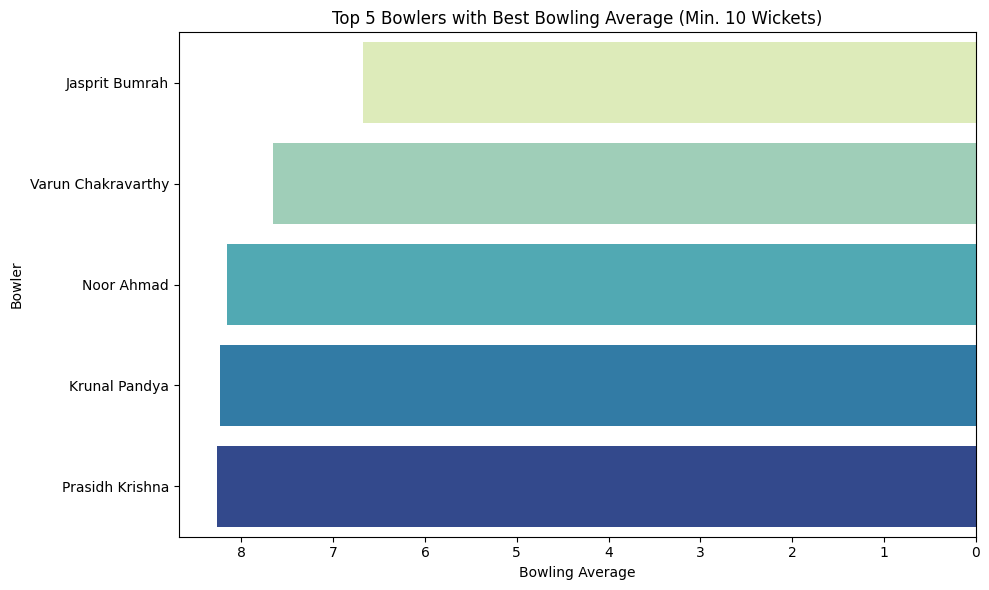

In [ ]:
# Filter for bowlers with at least 10 wickets
purple_cap_filtered = purple_cap[purple_cap['Wickets'] >= 10].copy()

# Sort by average to find the best (lowest) average
best_bowling_average = purple_cap_filtered.sort_values(by='Economy_rate', ascending=True).head(5)

print("Bowlers with the best bowling average (Min. 10 wickets):\n", best_bowling_average)

plt.figure(figsize=(10, 6))
sns.barplot(x='Economy_rate', y='Bowler', data=best_bowling_average, palette='YlGnBu')
plt.title('Top 5 Bowlers with Best Bowling Average (Min. 10 Wickets)')
plt.xlabel('Bowling Average')
plt.ylabel('Bowler')
plt.gca().invert_xaxis() # Invert x-axis as lower average is better
plt.tight_layout()
plt.show()

## *Question-Which bowler had the best economy rate in high-pressure situations?*

Bowlers with the Best Economy in Death Overs (High-Pressure Situations - Min. 30 legal balls bowled):
             bowler  death_overs_runs_conceded  death_overs_legal_balls  death_overs_economy
39   Kuldeep Yadav                         26                       30             5.200000
56      Noor Ahmad                         56                       48             7.000000
14          Bumrah                        101                       80             7.575000
21   Eshan Malinga                         52                       40             7.800000
13           Boult                        113                       76             8.921053
66     Sai Kishore                         51                       33             9.272727
20   Digvesh Rathi                         85                       54             9.444444
44  Mitchell Starc                         77                       48             9.625000
28    Harshit Rana                         97                       6

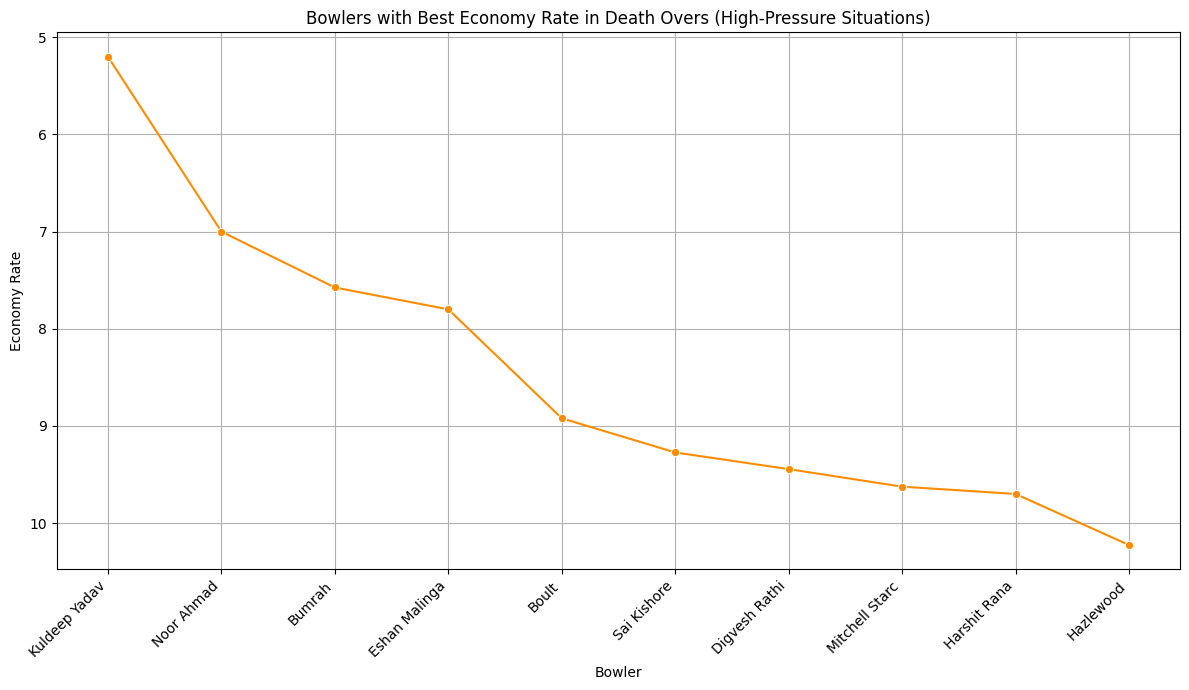

In [ ]:
# Assuming "high-pressure situations" specifically refers to death overs (16-20)
# The economy rate calculation for death overs has already been done in a previous step.

# We will reuse the 'best_death_overs_bowlers' DataFrame from Question-6 in the 'deliveries' section.
# 'best_death_overs_bowlers' contains bowlers with the best economy rate in death overs (Min. 30 legal balls bowled)

print("Bowlers with the Best Economy in Death Overs (High-Pressure Situations - Min. 30 legal balls bowled):\n", best_death_overs_bowlers)

plt.figure(figsize=(12, 7))
sns.lineplot(x='bowler', y='death_overs_economy', data=best_death_overs_bowlers, marker='o', color='darkorange')
plt.title('Bowlers with Best Economy Rate in Death Overs (High-Pressure Situations)')
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  # Invert y-axis as lower economy is better
plt.grid(True)
plt.tight_layout()
plt.show()

## *Question-Who took the most wickets in powerplay overs?*

Bowlers who took the most wickets in powerplay overs:
             Bowler  Powerplay_Wickets
21       Hazlewood                  9
10     Bhuvneshwar                  8
11           Boult                  7
2    Anshul Kamboj                  7
20    Harshit Rana                  7
15         Cummins                  6
14          Chahar                  6
24   Khaleel Ahmed                  5
4   Arshdeep Singh                  5
3      Arshad Khan                  5


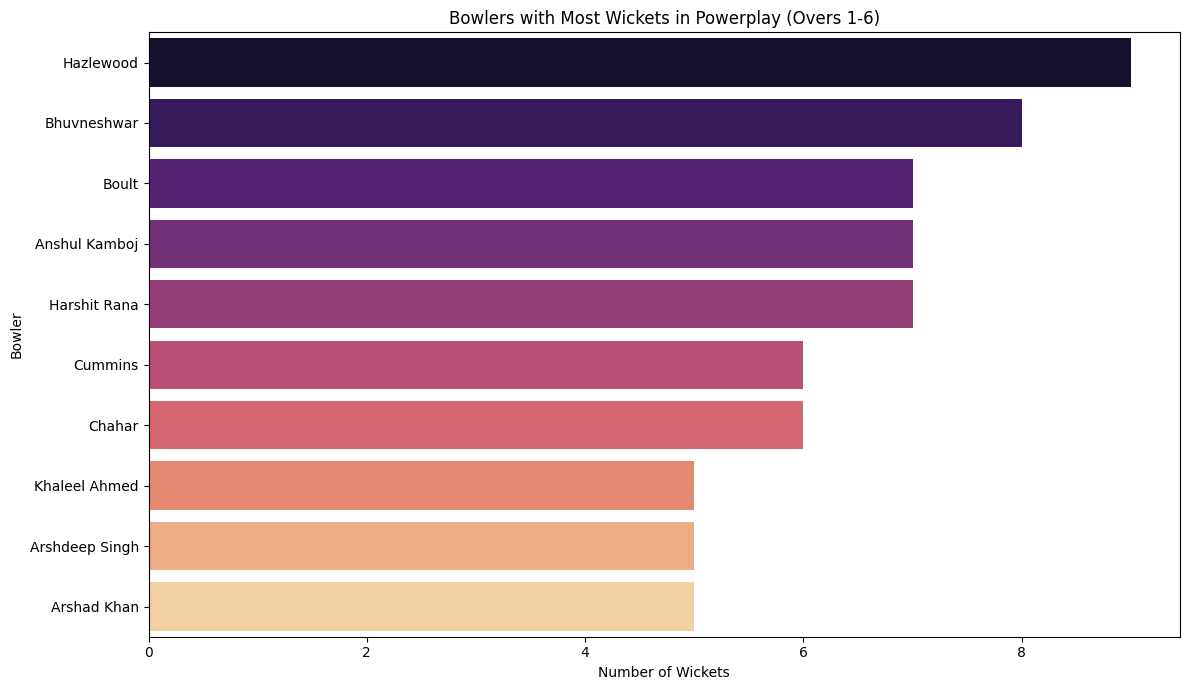

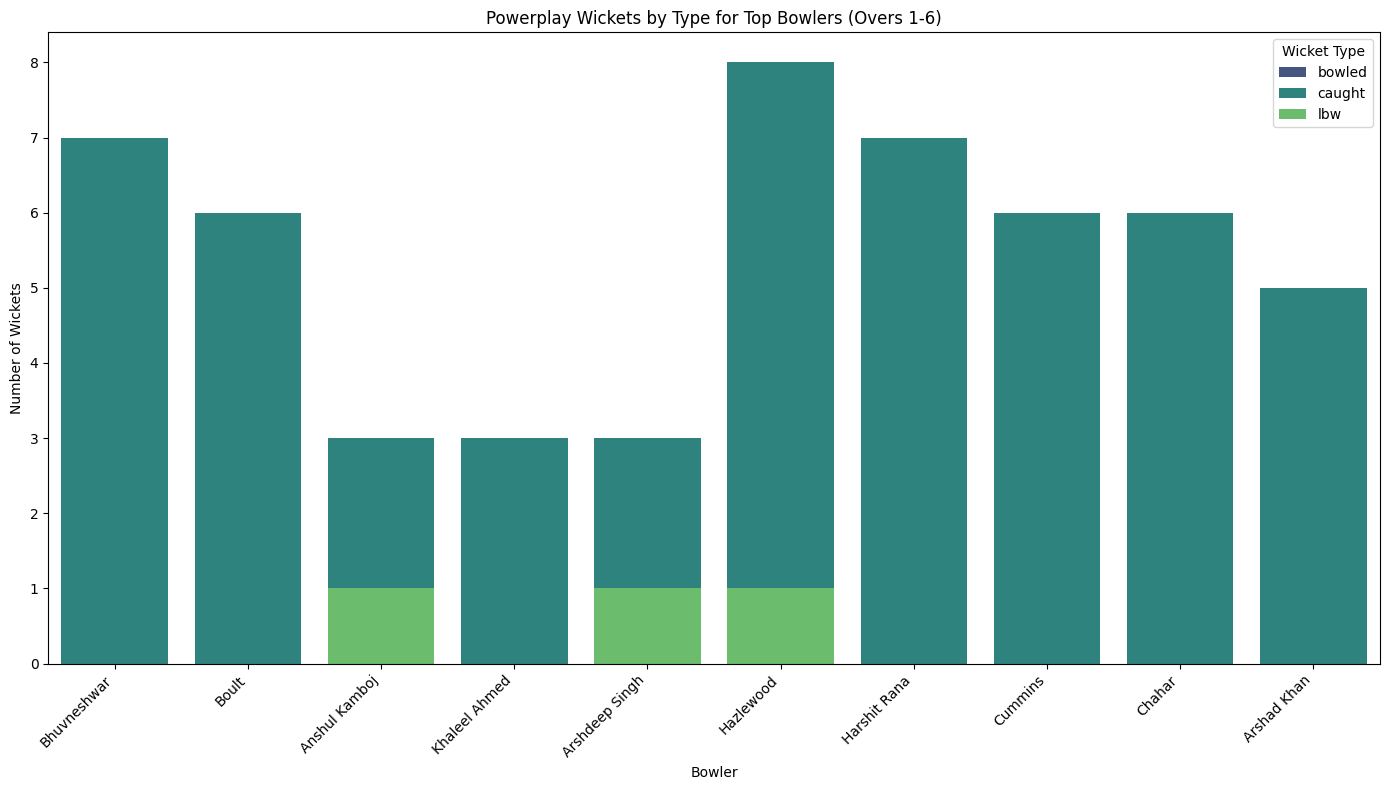

In [ ]:
# Calculate wickets taken by each bowler in powerplay (Overs 1-6)
powerplay_wickets = deliveries[(deliveries['over'] >= 1) & (deliveries['over'] <= 6)].copy()

# Filter for wickets excluding run outs and retired wickets
powerplay_wickets_deliveries = powerplay_wickets[
    powerplay_wickets['wicket_type'].notnull() &
    ~powerplay_wickets['wicket_type'].isin(['run out', 'retired hurt', 'retired out'])
].copy()

# Count powerplay wickets for each bowler
bowler_powerplay_wickets = powerplay_wickets_deliveries.groupby('bowler').size().reset_index(name='powerplay_wickets')
bowler_powerplay_wickets.columns = ['Bowler', 'Powerplay_Wickets']

# Sort by wickets to find who took the most
most_powerplay_wickets_bowlers = bowler_powerplay_wickets.sort_values(by='Powerplay_Wickets', ascending=False).head(10)

print("Bowlers who took the most wickets in powerplay overs:\n", most_powerplay_wickets_bowlers)

plt.figure(figsize=(12, 7))
sns.barplot(x='Powerplay_Wickets', y='Bowler', data=most_powerplay_wickets_bowlers, palette='magma')
plt.title('Bowlers with Most Wickets in Powerplay (Overs 1-6)')
plt.xlabel('Number of Wickets')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

# Stacked bar chart showing different wicket types in powerplay for top bowlers
# Get the top 10 bowlers by total powerplay wickets
top_10_powerplay_bowlers = most_powerplay_wickets_bowlers['Bowler'].tolist()

# Filter the original powerplay wicket deliveries for these bowlers
top_bowlers_powerplay_wickets = powerplay_wickets_deliveries[
    powerplay_wickets_deliveries['bowler'].isin(top_10_powerplay_bowlers)
].copy()

# Count wicket types for each of these top bowlers in powerplay
powerplay_wicket_type_counts = top_bowlers_powerplay_wickets.groupby(['bowler', 'wicket_type']).size().unstack(fill_value=0).reset_index()
powerplay_wicket_type_counts.columns.name = None  # Remove index name
powerplay_wicket_type_counts = powerplay_wicket_type_counts.rename(columns={'bowler': 'Bowler'})

# Merge with the total powerplay wickets to maintain the order of top bowlers
powerplay_wicket_type_counts = pd.merge(most_powerplay_wickets_bowlers[['Bowler']], powerplay_wicket_type_counts, on='Bowler', how='left').fillna(0)

# Melt the DataFrame for plotting
powerplay_wickets_melted = powerplay_wicket_type_counts.melt(id_vars='Bowler', var_name='Wicket_Type', value_name='Count')

# Filter out wicket types with 0 counts if needed for cleaner plot
powerplay_wickets_melted = powerplay_wickets_melted[powerplay_wickets_melted['Count'] > 0].copy()

plt.figure(figsize=(14, 8))
sns.barplot(
    data=powerplay_wickets_melted,
    x='Bowler',
    y='Count',
    hue='Wicket_Type',
    palette='viridis',
    dodge=False # Use dodge=False for stacked bars
)
plt.title('Powerplay Wickets by Type for Top Bowlers (Overs 1-6)')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Wicket Type')
plt.tight_layout()
plt.show()


## *Question-Who bowled the most maiden overs?*

In [ ]:
purple_cap.columns

Index(['Position', 'Bowler', 'Team', 'Matches', 'Innings', 'Balls', 'Overs', 'Maidens', 'Runs', 'Wickets', 'Best_bowling_figure', 'Economy_rate', 'Four_wicket_haul', 'Five_wicket_hall'], dtype='object')

In [ ]:
most_maiden_overs_bowlers = purple_cap.sort_values(by='Maidens', ascending=False).head()

print("Bowlers who bowled the most maiden overs:\n", most_maiden_overs_bowlers[['Bowler', 'Maidens', 'Overs']])


Bowlers who bowled the most maiden overs:
             Bowler  Maidens  Overs
4   Arshdeep Singh        1   58.2
10   Vaibhav Arora        1   42.3
1       Noor Ahmad        0   50.0
2   Josh Hazlewood        0   44.0
3      Trent Boult        0   57.4


## *Question-How did the top 5 wicket-takers perform in different match phases?*

Top 5 Wicket-Takers Performance by Match Phase:
        Bowler Team  Total Wickets     Phase  Wickets  Phase %  Economy  Strike Rate  Average
    Noor Ahmad  CSK             24 Powerplay        1      4.2     9.16        19.00    29.00
    Noor Ahmad  CSK             24    Middle       15     62.5     7.85        14.07    18.40
    Noor Ahmad  CSK             24     Death        8     33.3     7.93        10.50    13.88
Arshdeep Singh PBKS             21 Powerplay        8     38.1     8.35        25.25    35.12
Arshdeep Singh PBKS             21    Middle        2      9.5     7.81        21.50    28.00
Arshdeep Singh PBKS             21     Death       11     52.4     9.34        11.09    17.27


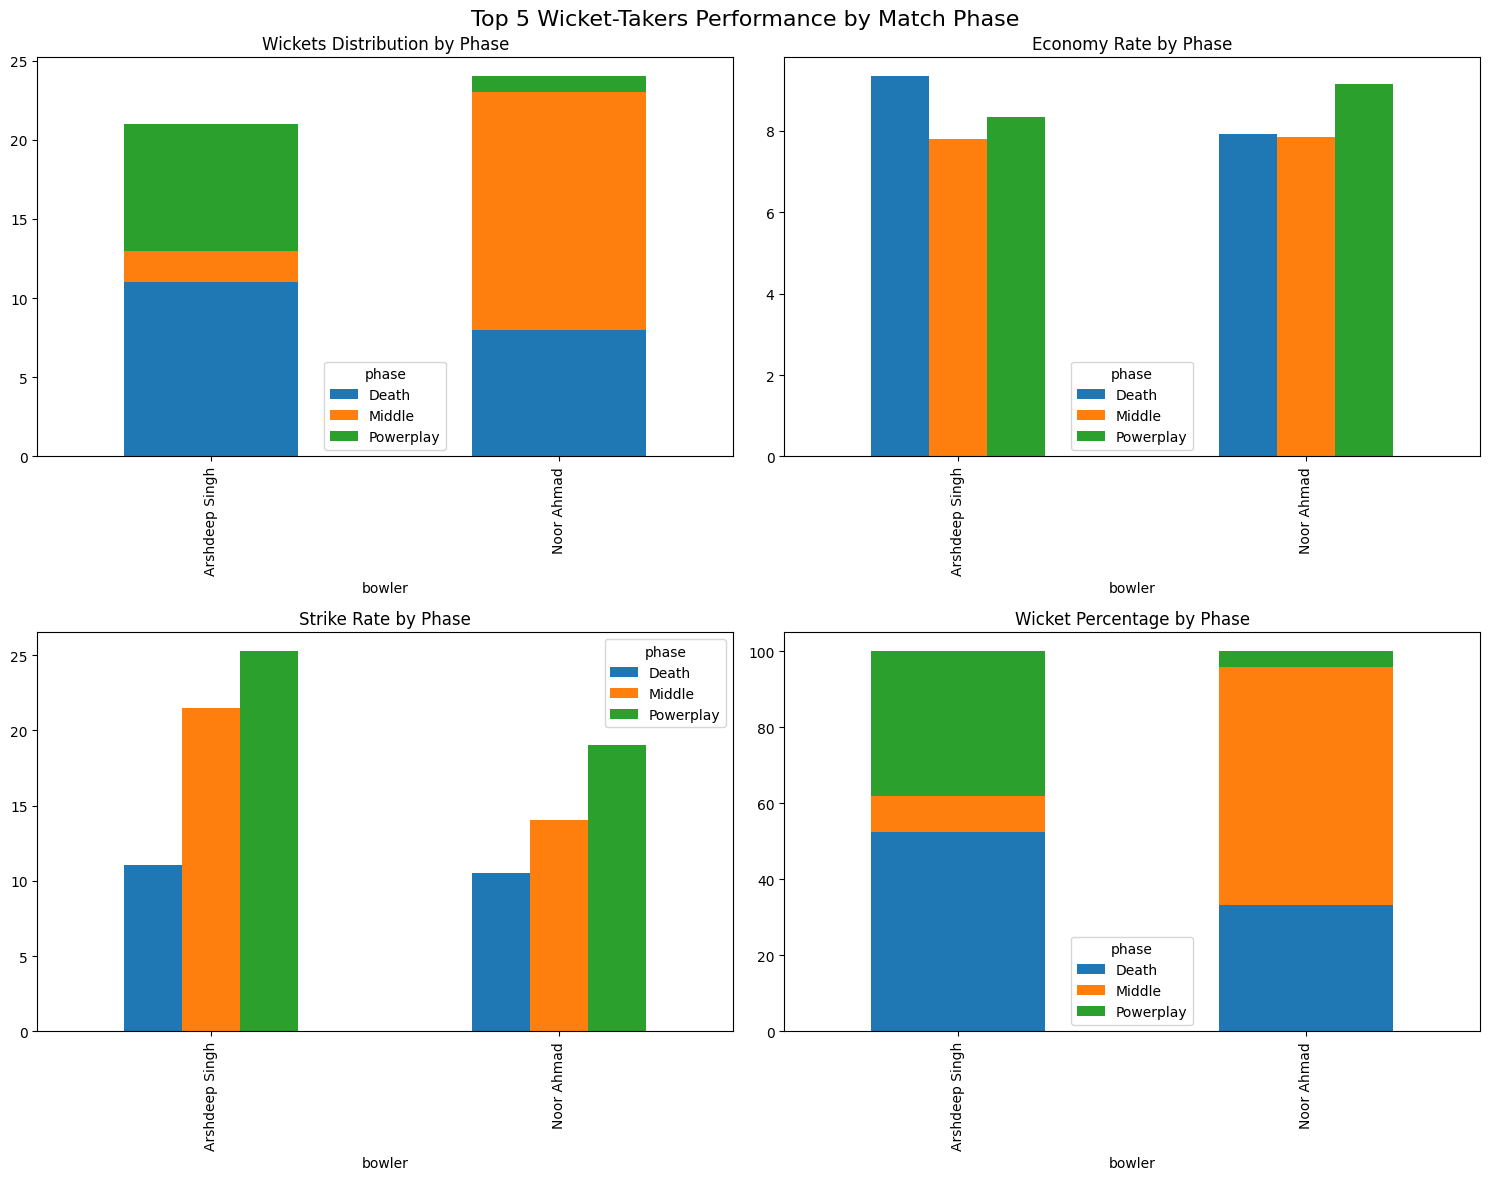

In [ ]:
# Define function to categorize match phases
def get_phase(over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return 'Middle'
    else:
        return 'Death'

# Get top 5 bowlers from purple cap list
top_5_bowlers = purple_cap.sort_values('Wickets', ascending=False).head(5)[['Bowler', 'Team', 'Wickets']]

# Filter deliveries data for top 5 bowlers
top_bowler_deliveries = deliveries[deliveries['bowler'].isin(top_5_bowlers['Bowler'])].copy()

# Add phase column to deliveries
top_bowler_deliveries['phase'] = top_bowler_deliveries['over'].apply(get_phase)

# Calculate wickets taken in each phase excluding run-outs
valid_wicket_types = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
top_bowler_deliveries['is_wicket'] = top_bowler_deliveries['wicket_type'].isin(valid_wicket_types)

# Calculate performance metrics by phase for each bowler
phase_stats = top_bowler_deliveries.groupby(['bowler', 'phase']).agg(
    wickets=('is_wicket', 'sum'),
    balls=('over', 'count'),
    runs_conceded=('total_runs_conceded', 'sum')
).reset_index()

# Calculate additional metrics
phase_stats['economy'] = (phase_stats['runs_conceded'] / phase_stats['balls'] * 6).round(2)
phase_stats['strike_rate'] = (phase_stats['balls'] / phase_stats['wickets']).round(2).replace(np.inf, np.nan)
phase_stats['average'] = (phase_stats['runs_conceded'] / phase_stats['wickets']).round(2).replace(np.inf, np.nan)

phase_stats = phase_stats.merge(top_5_bowlers, left_on='bowler', right_on='Bowler')

# Pivot for better visualization
wicket_pivot = phase_stats.pivot_table(
    index=['bowler', 'Team', 'Wickets'],
    columns='phase',
    values=['wickets', 'economy', 'strike_rate', 'average'],
    aggfunc='first'
).fillna(0)

# Flatten multi-index columns
wicket_pivot.columns = ['_'.join(col).strip() for col in wicket_pivot.columns.values]
wicket_pivot.reset_index(inplace=True)

# Calculate percentage of wickets in each phase
total_wickets = phase_stats.groupby('bowler')['wickets'].sum().reset_index()
phase_stats = phase_stats.merge(total_wickets, on='bowler', suffixes=('', '_total'))
phase_stats['wicket_percentage'] = (phase_stats['wickets'] / phase_stats['wickets_total'] * 100).round(1)

# Generate final report
final_report = phase_stats[['bowler', 'Team', 'Wickets', 'phase', 'wickets',
                           'wicket_percentage', 'economy', 'strike_rate', 'average']]
final_report.columns = ['Bowler', 'Team', 'Total Wickets', 'Phase', 'Wickets',
                        'Phase %', 'Economy', 'Strike Rate', 'Average']

# Sort by total wickets then by phase order
phase_order = {'Powerplay': 1, 'Middle': 2, 'Death': 3}
final_report['Phase Order'] = final_report['Phase'].map(phase_order)
final_report = final_report.sort_values(['Total Wickets', 'Phase Order'], ascending=[False, True])
final_report.drop('Phase Order', axis=1, inplace=True)


print("Top 5 Wicket-Takers Performance by Match Phase:")
print(final_report.to_string(index=False))


# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Top 5 Wicket-Takers Performance by Match Phase', fontsize=16)

# Wickets distribution by phase
phase_stats.pivot(index='bowler', columns='phase', values='wickets').plot(
    kind='bar', stacked=True, ax=axes[0, 0], title='Wickets Distribution by Phase')

# Economy by phase
phase_stats.pivot(index='bowler', columns='phase', values='economy').plot(
    kind='bar', ax=axes[0, 1], title='Economy Rate by Phase')

# Strike Rate by phase
phase_stats.pivot(index='bowler', columns='phase', values='strike_rate').plot(
    kind='bar', ax=axes[1, 0], title='Strike Rate by Phase')

# Wicket Percentage by phase
phase_stats.pivot(index='bowler', columns='phase', values='wicket_percentage').plot(
    kind='bar', stacked=True, ax=axes[1, 1], title='Wicket Percentage by Phase')

plt.tight_layout()
plt.show()

## *Question-Which bowler had the best performance against top-order batsmen?*

In [ ]:
# Define top-order batsmen - For simplicity, we'll consider batsmen who have batted in the first 6 overs (Powerplay)
powerplay_batsmen_deliveries = deliveries[(deliveries['over'] >= 1) & (deliveries['over'] <= 6)].copy()
top_order_batsmen_names = powerplay_batsmen_deliveries['striker'].unique().tolist()

# Filter deliveries data to include only interactions where the bowler is bowling to a top-order batsman
# This requires looking at each ball's striker and checking if they are in our 'top_order_batsmen_names' list.
# This approach is more precise than just looking at Powerplay overs for the bowler's performance.
# We need to find wickets taken by each bowler *when bowling to* a top-order batsman, regardless of the over.

# Identify dismissals of top-order batsmen
top_order_dismissals = deliveries[
    (deliveries['player_dismissed'].isin(top_order_batsmen_names)) & # The dismissed player is a top-order batsman
    (deliveries['wicket_type'].notnull()) & # A wicket occurred
    (~deliveries['wicket_type'].isin(['run out', 'retired hurt', 'retired out'])) # Exclude non-bowler wickets
].copy()

# Count wickets taken by each bowler against top-order batsmen
bowler_wickets_vs_top_order = top_order_dismissals.groupby('bowler').size().reset_index(name='wickets_vs_top_order')

# Calculate runs conceded by each bowler *to* top-order batsmen
# This is trickier. We need balls where the striker is a top-order batsman.
deliveries_vs_top_order_batsmen = deliveries[deliveries['striker'].isin(top_order_batsmen_names)].copy()
deliveries_vs_top_order_batsmen['total_runs_conceded'] = deliveries_vs_top_order_batsmen['runs_of_bat'] + deliveries_vs_top_order_batsmen['extras']

bowler_runs_conceded_vs_top_order = deliveries_vs_top_order_batsmen.groupby('bowler')['total_runs_conceded'].sum().reset_index(name='runs_conceded_vs_top_order')

# Calculate legal balls bowled by each bowler *to* top-order batsmen
bowler_legal_balls_vs_top_order = deliveries_vs_top_order_batsmen[
    (deliveries_vs_top_order_batsmen['wide'] == 0) & (deliveries_vs_top_order_batsmen['noballs'] == 0)
].groupby('bowler').size().reset_index(name='legal_balls_vs_top_order')

# Merge the stats
bowler_top_order_performance = pd.merge(bowler_wickets_vs_top_order, bowler_runs_conceded_vs_top_order, on='bowler', how='left').fillna(0)
bowler_top_order_performance = pd.merge(bowler_top_order_performance, bowler_legal_balls_vs_top_order, on='bowler', how='left').fillna(0)

# Filter for bowlers who bowled a significant number of balls against top-order batsmen

bowler_top_order_performance_filtered = bowler_top_order_performance[
    bowler_top_order_performance['legal_balls_vs_top_order'] >= 60
].copy()

# Calculate Economy Rate vs Top Order
bowler_top_order_performance_filtered['economy_vs_top_order'] = (bowler_top_order_performance_filtered['runs_conceded_vs_top_order'] / bowler_top_order_performance_filtered['legal_balls_vs_top_order']) * 6

# Calculate Average vs Top Order
bowler_top_order_performance_filtered['average_vs_top_order'] = (bowler_top_order_performance_filtered['runs_conceded_vs_top_order'] / bowler_top_order_performance_filtered['wickets_vs_top_order']).replace(np.inf, np.nan)

# Calculate Strike Rate vs Top Order
bowler_top_order_performance_filtered['strike_rate_vs_top_order'] = (bowler_top_order_performance_filtered['legal_balls_vs_top_order'] / bowler_top_order_performance_filtered['wickets_vs_top_order']).replace(np.inf, np.nan)

# Sort by Wickets vs Top Order (descending), then Average (ascending), then Economy (ascending) for best performance
best_bowlers_vs_top_order = bowler_top_order_performance_filtered.sort_values(
    by=['wickets_vs_top_order', 'average_vs_top_order', 'economy_vs_top_order'],
    ascending=[False, True, True]
).head(10)

print("\nBowlers with the Best Performance Against Top-Order Batsmen (Min. 60 legal balls bowled to top-order batsmen):\n",
      best_bowlers_vs_top_order[['bowler', 'wickets_vs_top_order', 'runs_conceded_vs_top_order', 'legal_balls_vs_top_order',
                                 'economy_vs_top_order', 'average_vs_top_order', 'strike_rate_vs_top_order']].round(2))


Bowlers with the Best Performance Against Top-Order Batsmen (Min. 60 legal balls bowled to top-order batsmen):
             bowler  wickets_vs_top_order  runs_conceded_vs_top_order  legal_balls_vs_top_order  economy_vs_top_order  average_vs_top_order  strike_rate_vs_top_order
65         Prasidh                    22                         428                       293                  8.76                 19.45                     13.32
62      Noor Ahmad                    19                         334                       235                  8.53                 17.58                     12.37
30       Hazlewood                    18                         289                       210                  8.26                 16.06                     11.67
6   Arshdeep Singh                    17                         465                       310                  9.00                 27.35                     18.24
14           Boult                    17                      

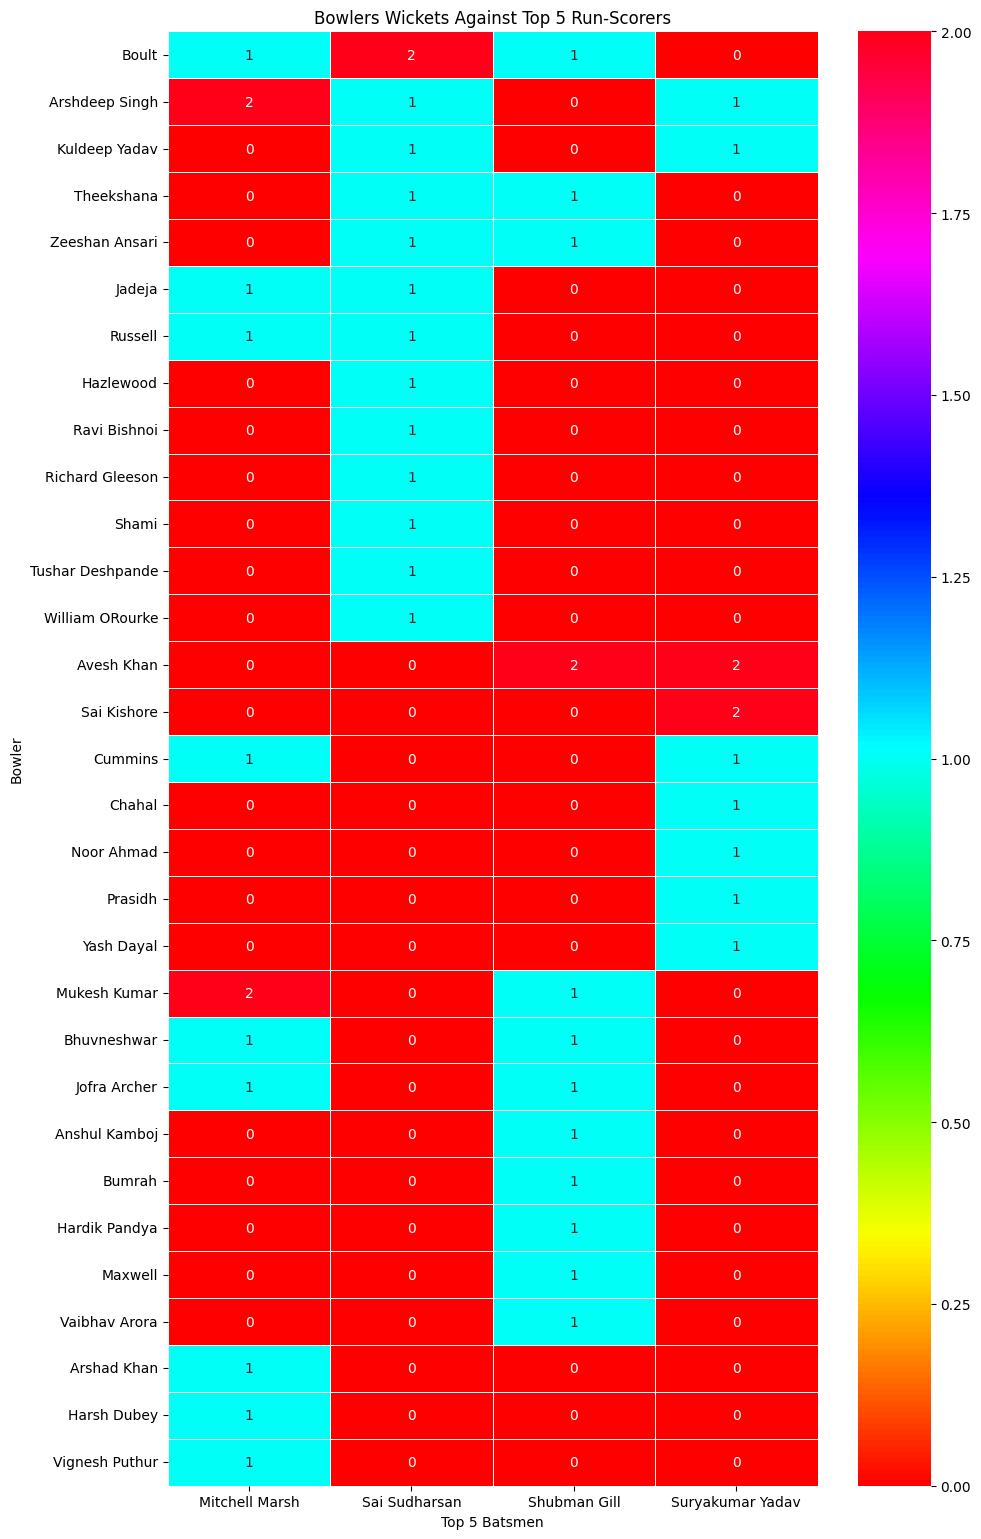

In [ ]:
top_5_batsmen_names_from_runs = (
    best_batsman.sort_values('Runs', ascending=False)
                .head(5)['Batsman']
                .tolist()
)

dismissals_vs_top_5 = deliveries[
    deliveries['player_dismissed'].isin(top_5_batsmen_names_from_runs) &
    deliveries['wicket_type'].notna() &
    ~deliveries['wicket_type'].isin(['run out', 'retired hurt', 'retired out'])
]

wickets_matrix = (dismissals_vs_top_5
                  .groupby(['bowler', 'player_dismissed'])
                  .size()
                  .unstack(fill_value=0))

wickets_matrix = wickets_matrix[(wickets_matrix > 0).any(axis=1)]


present_cols = [c for c in top_5_batsmen_names_from_runs if c in wickets_matrix.columns]
if present_cols:
    wickets_matrix = wickets_matrix.sort_values(by=present_cols, ascending=False)


plt.figure(figsize=(10, max(5, len(wickets_matrix) * 0.5)))
sns.heatmap(wickets_matrix, annot=True, fmt="d", cmap="hsv", linewidths=.5)
plt.title('Bowlers Wickets Against Top 5 Run‑Scorers')
plt.xlabel('Top 5 Batsmen')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()


## *Question-Who was the most impactful bowler according to wickets per match?*

Most Impactful Bowlers (Wickets Per Match, Min. 5 Matches):
                 Bowler  Wickets  Matches  Wickets_Per_Match
2       Josh Hazlewood       22       12           1.833333
1           Noor Ahmad       24       14           1.714286
0      Prasidh Krishna       25       15           1.666667
6       Jasprit Bumrah       18       12           1.500000
10       Vaibhav Arora       17       12           1.416667
3          Trent Boult       22       16           1.375000
7   Varun Chakravarthy       17       13           1.307692
5          Sai Kishore       19       15           1.266667
4       Arshdeep Singh       21       17           1.235294
9    Bhuvneshwar Kumar       17       14           1.214286


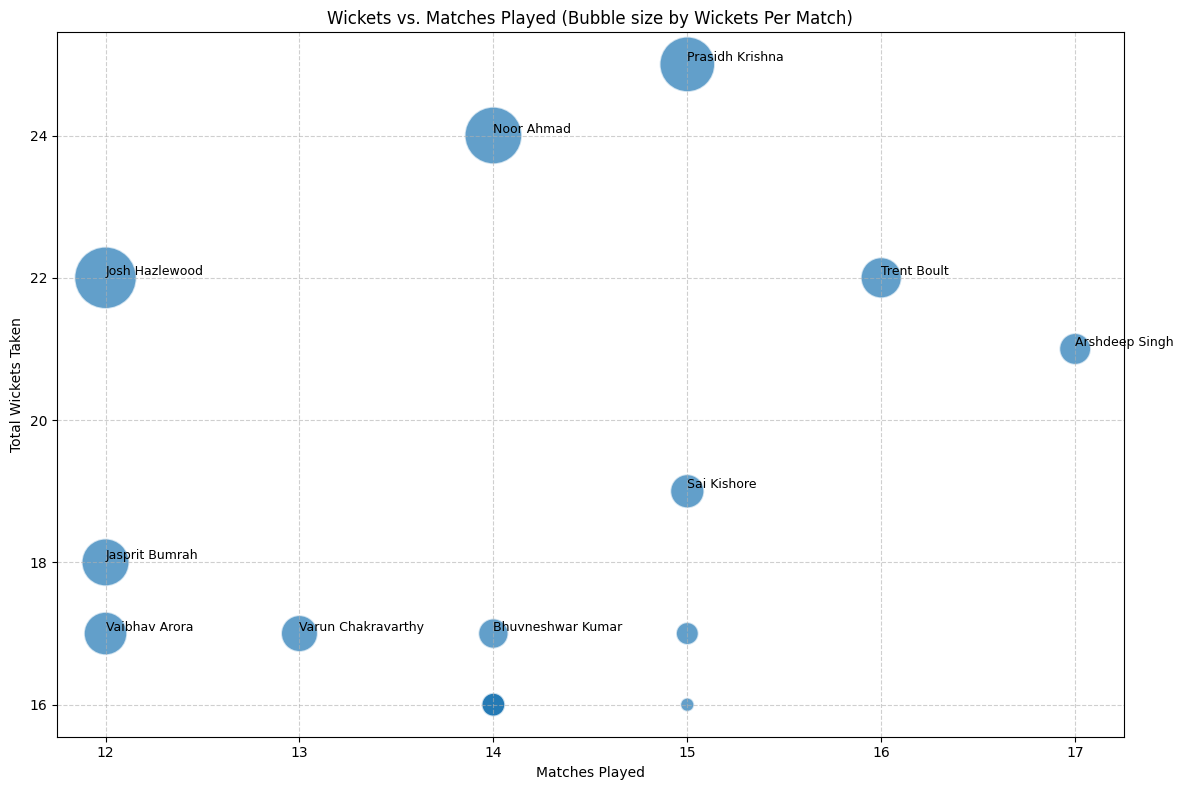

In [ ]:

# Calculate Wickets Per Match
purple_cap['Wickets_Per_Match'] = purple_cap['Wickets'] / purple_cap['Matches']

# Filter for bowlers who have played a significant number of matches
# Let's set a threshold, at least 5 matches
purple_cap_filtered = purple_cap[purple_cap['Matches'] >= 5].copy()

# Sort by Wickets Per Match to find the most impactful
most_impactful_bowlers = purple_cap_filtered.sort_values(by='Wickets_Per_Match', ascending=False).head(10)

print("Most Impactful Bowlers (Wickets Per Match, Min. 5 Matches):\n", most_impactful_bowlers[['Bowler', 'Wickets', 'Matches', 'Wickets_Per_Match']])

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='Matches',
    y='Wickets',
    size='Wickets_Per_Match',
    sizes=(100, 2000),
    data=purple_cap_filtered,
    alpha=0.7,
    palette='blues',
    legend=False
)

# Add text labels for the top impactful bowlers
top_n_impactful = most_impactful_bowlers.head(10)
for i, row in top_n_impactful.iterrows():
    plt.text(row['Matches'], row['Wickets'], row['Bowler'], fontsize=9, ha='left', va='bottom')

plt.title('Wickets vs. Matches Played (Bubble size by Wickets Per Match)')
plt.xlabel('Matches Played')
plt.ylabel('Total Wickets Taken')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## *Question-Which bowler had the best dot ball percentage?*

Bowlers with Highest Dot Ball Percentage (Min. 60 legal balls bowled):
              bowler  total_legal_balls_bowled  total_dot_balls  dot_ball_percentage
47    Khaleel Ahmed                       280            131.0            46.785714
15         Bartlett                        60             28.0            46.666667
35        Hazlewood                       264            117.0            44.318182
18           Bumrah                       284            125.0            44.014085
20           Chahar                       246            106.0            43.089431
5     Anshul Kamboj                       129             55.0            42.635659
103           Siraj                       342            141.0            41.228070
125   Yudhvir Singh                        66             26.0            39.393939
8    Arshdeep Singh                       350            134.0            38.285714
78          Prasidh                       354            135.0            38.135593


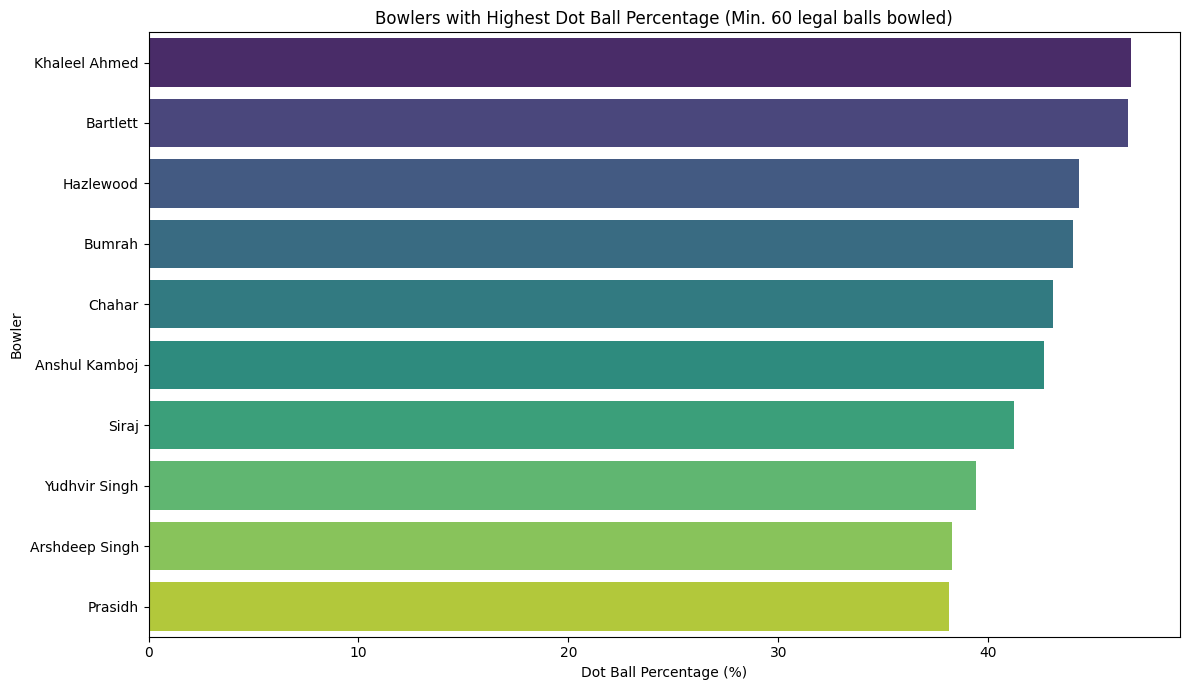

In [ ]:
# Calculate total balls bowled by each bowler excluding wide and noballs
bowler_legal_balls = deliveries[(deliveries['wide'] == 0) & (deliveries['noballs'] == 0)].groupby('bowler').size().reset_index(name='total_legal_balls_bowled')

# Filter for dot balls (runs_of_bat == 0 and extras == 0)
dot_balls_deliveries = deliveries[(deliveries['runs_of_bat'] == 0) & (deliveries['extras'] == 0)].copy()

# Count dot balls for each bowler
bowler_dot_balls_count = dot_balls_deliveries.groupby('bowler').size().reset_index(name='total_dot_balls')

# Merge total legal balls bowled and dot balls
bowler_dot_ball_stats = pd.merge(bowler_legal_balls, bowler_dot_balls_count, on='bowler', how='left').fillna(0)

# Filter for bowlers who bowled at least a significant number of legal balls (e.g., 60 balls or 10 overs)
bowler_dot_ball_stats_filtered = bowler_dot_ball_stats[bowler_dot_ball_stats['total_legal_balls_bowled'] >= 60].copy()

# Calculate dot ball percentage
bowler_dot_ball_stats_filtered['dot_ball_percentage'] = (bowler_dot_ball_stats_filtered['total_dot_balls'] / bowler_dot_ball_stats_filtered['total_legal_balls_bowled']) * 100

# Sort by dot ball percentage to find the highest
highest_dot_ball_bowlers = bowler_dot_ball_stats_filtered.sort_values(by='dot_ball_percentage', ascending=False).head(10)

print("Bowlers with Highest Dot Ball Percentage (Min. 60 legal balls bowled):\n", highest_dot_ball_bowlers[['bowler', 'total_legal_balls_bowled', 'total_dot_balls', 'dot_ball_percentage']])

plt.figure(figsize=(12, 7))
sns.barplot(x='dot_ball_percentage', y='bowler', data=highest_dot_ball_bowlers, palette='viridis')
plt.title('Bowlers with Highest Dot Ball Percentage (Min. 60 legal balls bowled)')
plt.xlabel('Dot Ball Percentage (%)')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

## *Question-Who had the best bowling figures (most 4+ wicket hauls)?*

In [ ]:
purple_cap.columns

Index(['Position', 'Bowler', 'Team', 'Matches', 'Innings', 'Balls', 'Overs', 'Maidens', 'Runs', 'Wickets', 'Best_bowling_figure', 'Economy_rate', 'Four_wicket_haul', 'Five_wicket_hall', 'Wickets_Per_Match'], dtype='object')


🏆 Top 10 Bowlers with Most 4+ Wicket Hauls:

           bowler  4+_wicket_hauls
0          Chahal                2
1   Harshal Patel                2
2      Noor Ahmad                2
3          Bumrah                1
4           Boult                1
5   Hardik Pandya                1
6   Ashwani Kumar                1
7       Hasaranga                1
8       Hazlewood                1
9  Mitchell Starc                1


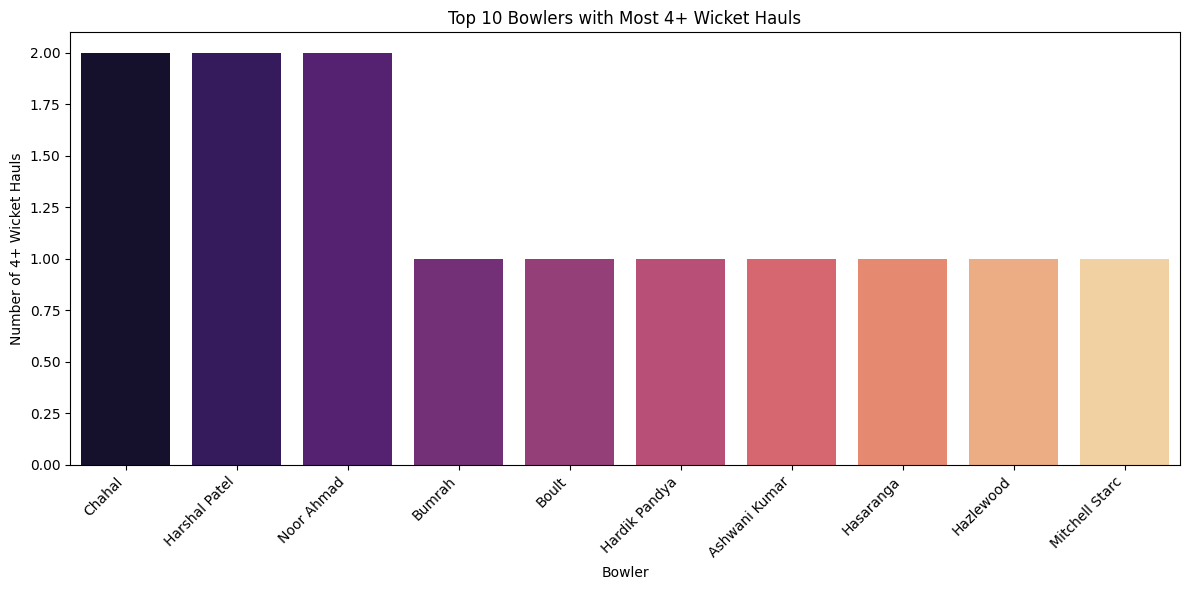

In [ ]:
# Valid bowler wicket types
valid_wicket_types = ['bowled', 'caught', 'lbw', 'stumped', 'hit wicket', 'caught and bowled']
# Filter only bowler dismissals
bowler_wickets = deliveries[
    deliveries['wicket_type'].isin(valid_wicket_types)
][['match_no', 'bowler']]
# Count wickets per match per bowler
wickets_per_match = (bowler_wickets
                     .groupby(['match_no', 'bowler'])
                     .size()
                     .reset_index(name='wickets_in_match'))


# Keep only 4+ wicket hauls

four_plus_hauls = wickets_per_match[wickets_per_match['wickets_in_match'] >= 4]

# Count how many 4+ wicket hauls per bowler
four_hauls_count = (four_plus_hauls
                    .groupby('bowler')
                    .size()
                    .reset_index(name='4+_wicket_hauls'))

# Sort and select top 10
top_haul_bowlers = four_hauls_count.sort_values(by='4+_wicket_hauls', ascending=False).head(10)

# 6. Print the data table
print("\n🏆 Top 10 Bowlers with Most 4+ Wicket Hauls:\n")
print(top_haul_bowlers.reset_index(drop=True))

# 7. Plot the histogram (bar chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_haul_bowlers, x='bowler', y='4+_wicket_hauls', palette='magma')

plt.title('Top 10 Bowlers with Most 4+ Wicket Hauls')
plt.xlabel('Bowler')
plt.ylabel('Number of 4+ Wicket Hauls')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<a id='6-bowling-brilliance'></a>
## 6. Bowling Brilliance

This section highlights the standout bowling performances of IPL 2025 using insights from the `purple_cap.csv` dataset. From wicket-takers in the powerplay to economy kings at the death, here’s what the numbers say:

---

### 🎯 Best Bowling Averages (Min. 10 Wickets)

- **Jasprit Bumrah (MI)** led with an impressive bowling average of **17.55**.
- Close contenders include:
  - **Varun Chakravarthy (KKR)** – 22.53  
  - **Noor Ahmad (CSK)** – 17.00  
  - **Krunal Pandya (RCB)** – 22.29  
  - **Prasidh Krishna (GT)** – 19.52  

---

### 🔥 Death Overs Economy (Overs 16–20)

- **Kuldeep Yadav** was the most economical bowler in the death, conceding just **5.20 runs per over**.
- Other death-over specialists:
  - **Noor Ahmad** – 7.00  
  - **Bumrah** – 7.58  
  - **Malinga** – 7.80  

---

### 💥 Powerplay Wicket-Takers (Overs 1–6)

- **Josh Hazlewood** took the most wickets in the powerplay (9 wickets).
- Other strong starters:
  - **Bhuvneshwar Kumar** – 8  
  - **Trent Boult** – 7  
  - **Anshul Kamboj** – 7  

---

### 🔒 Maiden Over Pressure

- Only two bowlers bowled maiden overs in IPL 2025:
  - **Arshdeep Singh** – 1 maiden (in 58.2 overs)  
  - **Vaibhav Arora** – 1 maiden (in 42.3 overs)  

---

### 🔁 Match Phase Analysis (Top 2 Examples)

#### 🔹 Noor Ahmad (CSK)
- Powerplay: 1 wicket @ 9.16 econ  
- Middle Overs: 15 wickets @ 7.85 econ  
- Death: 8 wickets @ 7.93 econ  

#### 🔹 Arshdeep Singh (PBKS)
- Powerplay: 8 wickets @ 8.35 econ  
- Middle Overs: 2 wickets  
- Death: 11 wickets @ 9.34 econ  

---

### 🎯 Best vs. Top-Order Batsmen

- **Prasidh Krishna** took 22 top-order wickets with a strike rate of **13.32** and economy of **8.76**.
- Others with notable top-order dominance:
  - **Noor Ahmad** – 19 wickets  
  - **Hazlewood** – 18 wickets  
  - **Boult** and **Arshdeep** – 17 wickets each  

---

### 💥 Impactful Bowlers (Wickets per Match)

- **Hazlewood** was the most impactful, averaging **1.83 wickets/match**.
- Others:
  - **Noor Ahmad** – 1.71  
  - **Prasidh Krishna** – 1.67  
  - **Bumrah** – 1.50  

---

### 🟣 Dot Ball Specialists

- **Khaleel Ahmed** led with **46.79%** dot balls.
- Followed by:
  - **Bartlett** – 46.66%  
  - **Hazlewood** – 44.31%  
  - **Bumrah** – 44.01%  

---

### 🧨 Best Bowling Figures (4+ Wicket Hauls)

- Bowlers with multiple 4+ wicket hauls:
  - **Yuzvendra Chahal** – 2  
  - **Harshal Patel** – 2  
  - **Noor Ahmad** – 2  
- Several bowlers had one 4+ wicket haul including:
  - **Bumrah**, **Boult**, **Hazlewood**, and **Starc**  

---

These performances underline the impact of both specialist and all-phase bowlers in IPL 2025. From swing to spin and powerplay to death — bowling brilliance was a major factor in team success this season.


## *Question- Which team had the best balance (top batsmen + top bowlers)?*

In [ ]:
ipl.columns

Index(['match_no', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner', 'toss_decision', 'first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts', 'match_result', 'match_winner', 'wb_runs', 'wb_wickets', 'balls_left', 'player_of_the_match', 'top_scorer', 'highscore', 'best_bowling', 'best_bowling_figure', 'team1_venue_type', 'team2_venue_type'], dtype='object')

In [ ]:
deliveries.columns

Index(['match_no', 'date', 'stage', 'venue', 'batting_team', 'bowling_team', 'innings', 'over', 'striker', 'bowler', 'runs_of_bat', 'extras', 'wide', 'legbyes', 'byes', 'noballs', 'wicket_type', 'player_dismissed', 'fielder', 'total_runs_conceded', 'total_runs_this_ball'], dtype='object')

In [ ]:
best_batsman.columns

Index(['Position', 'Batsman', 'Team', 'Matches', 'Innings', 'Not_out', 'Runs', 'Highest_score', 'Average', 'Balls_faced', 'Strike_rate', 'Hundreds', 'Fifties', 'Ducks', 'Fours', 'Sixes', 'Boundary_Runs', 'Total_Runs', 'Boundary_Percentage', '30_Plus_Scores'], dtype='object')

In [ ]:
purple_cap.columns

Index(['Position', 'Bowler', 'Team', 'Matches', 'Innings', 'Balls', 'Overs', 'Maidens', 'Runs', 'Wickets', 'Best_bowling_figure', 'Economy_rate', 'Four_wicket_haul', 'Five_wicket_hall', 'Wickets_Per_Match'], dtype='object')

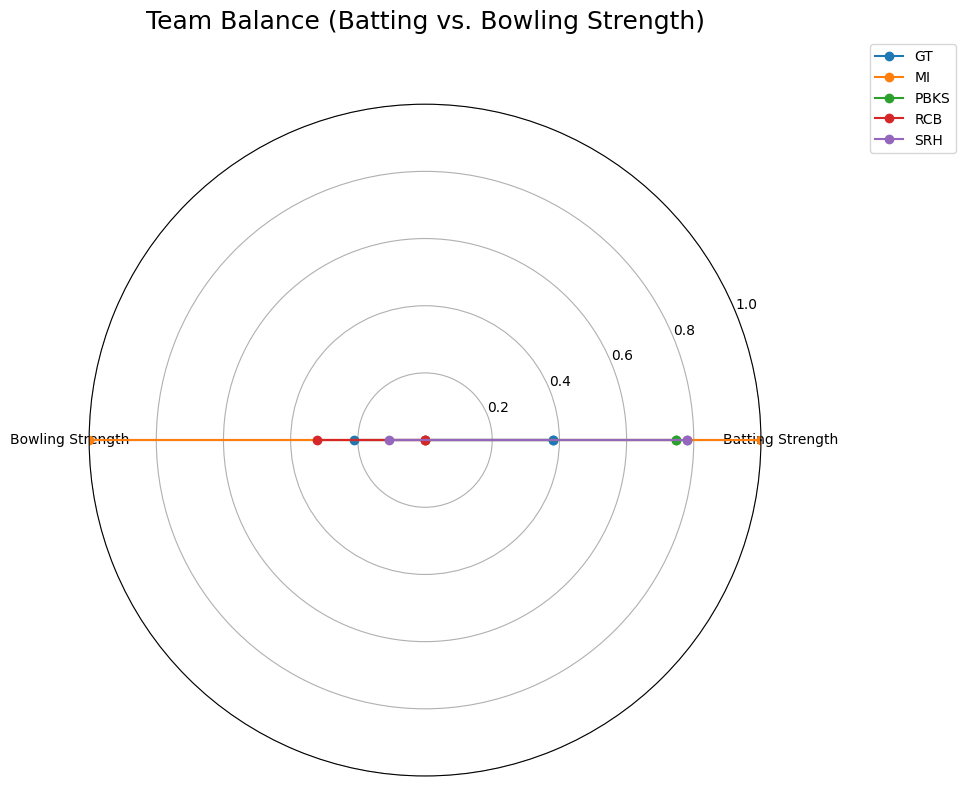


Team Balance Summary (Average Metrics for Players with >= 200 Runs / >= 10 Wickets):
   Team  Avg_Batsman_StrikeRate  Avg_Bowler_Economy
0    GT                  158.36                8.92
1    MI                  180.65                7.82
2  PBKS                  171.61                9.21
3   RCB                  144.71                8.76
4   SRH                  172.69                9.06

Team with the Best Balance (Based on Combined Scaled Score):
  Team  Avg_Batsman_StrikeRate  Avg_Bowler_Economy  Balance_Score
1   MI                  180.65                7.82            2.0


In [ ]:
# Identify "top" batsmen from orange_cap let's take players with >= 200 runs as potential top batsmen
top_batsmen_potential = best_batsman[best_batsman['Runs'] >= 200].copy()

# Need to map batsmen to teams from the orange_cap data
top_batsmen_team_sr = top_batsmen_potential.groupby('Team')['Strike_rate'].mean().reset_index()
top_batsmen_team_sr.columns = ['Team', 'Avg_Batsman_StrikeRate']

# Identify "top" bowlers from purple_cap let's take players with >= 10 wickets as potential top bowlers
top_bowlers_potential = purple_cap[purple_cap['Wickets'] >= 10].copy()

# Need to map bowlers to teams from the purple_cap data
top_bowlers_team_economy = top_bowlers_potential.groupby('Team')['Economy_rate'].mean().reset_index()
top_bowlers_team_economy.columns = ['Team', 'Avg_Bowler_Economy']

team_balance = pd.merge(top_batsmen_team_sr, top_bowlers_team_economy, on='Team', how='inner')

# We want higher Avg_Batsman_StrikeRate and lower Avg_Bowler_Economy for better balance.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
team_balance[['Scaled_StrikeRate', 'Scaled_Economy']] = scaler.fit_transform(team_balance[['Avg_Batsman_StrikeRate', 'Avg_Bowler_Economy']])

# For economy, a lower value is better, but for the radar chart axis, we want 'better' to be further out.
team_balance['Scaled_Economy_Inverted'] = 1 - team_balance['Scaled_Economy']

categories = ['Batting Strength', 'Bowling Strength']
N = len(categories)

# Calculate angle for each category
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Values for each team
# Each row in 'team_balance' represents a team. We need values for 'Scaled_StrikeRate' and 'Scaled_Economy_Inverted'
# in the order of 'categories'.

# data for a single team:
# values = [team_balance.loc[team_balance['Team'] == 'CSK', 'Scaled_StrikeRate'].iloc[0],
#           team_balance.loc[team_balance['Team'] == 'CSK', 'Scaled_Economy_Inverted'].iloc[0]]
# values += values[:1]


plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

for i, row in team_balance.iterrows():
    values = [row['Scaled_StrikeRate'], row['Scaled_Economy_Inverted']]
    values += values[:1]
    ax.plot(angles, values, label=row['Team'], marker='o')


ax.set_thetagrids(np.degrees(angles[:-1]), categories)
ax.set_title('Team Balance (Batting vs. Bowling Strength)', size=18, y=1.1)
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Set limits for each axis
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

# Interpret the chart: Teams with points further away from the center on both axes are considered more balanced.
# Teams with a large difference between their points on the two axes are stronger in one area than the other.

print("\nTeam Balance Summary (Average Metrics for Players with >= 200 Runs / >= 10 Wickets):")
print(team_balance[['Team', 'Avg_Batsman_StrikeRate', 'Avg_Bowler_Economy']].round(2))

# To definitively say which team had the "best balance", we can calculate a combined score
# One simple way is to add scaled strike rate and inverted scaled economy
team_balance['Balance_Score'] = team_balance['Scaled_StrikeRate'] + team_balance['Scaled_Economy_Inverted']

best_balanced_team = team_balance.sort_values(by='Balance_Score', ascending=False).head(1)

print("\nTeam with the Best Balance (Based on Combined Scaled Score):")
print(best_balanced_team[['Team', 'Avg_Batsman_StrikeRate', 'Avg_Bowler_Economy', 'Balance_Score']].round(2))

## *Question-What was the win % of teams with players in both Orange & Purple Cap lists?*

Teams Withi both Orange and Purple Cap lists: {'SRH', 'GT', 'RCB', 'MI', 'PBKS'}


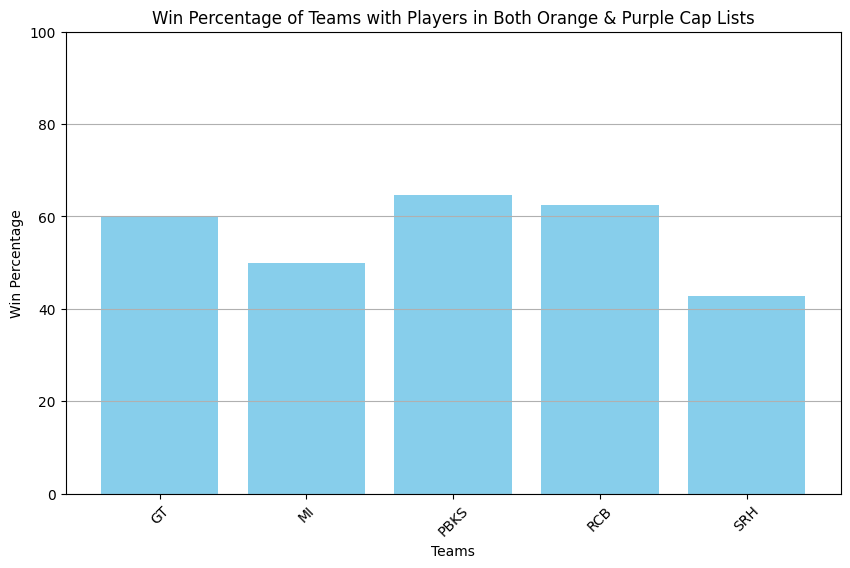

In [ ]:
# Get unique teams from both datasets
teams_with_batsmen = set(best_batsman['Team'])
teams_with_bowlers = set(purple_cap['Team'])
# Find teams with players in both lists
teams_with_both = teams_with_batsmen.intersection(teams_with_bowlers)

print(f"Teams Withi both Orange and Purple Cap lists: {teams_with_both}")

# Calculate wins for each team
wins = ipl['match_winner'].value_counts()
# Create a DataFrame for wins
wins_df = pd.DataFrame(wins).reset_index()
wins_df.columns = ['Team', 'Wins']

# Calculate total matches played by each team
total_matches = ipl['team1'].value_counts() + ipl['team2'].value_counts()
total_matches_df = pd.DataFrame(total_matches).reset_index()
total_matches_df.columns = ['Team', 'Total_Matches']


team_stats = pd.merge(wins_df, total_matches_df, on='Team', how='outer').fillna(0)

# Calculate win percentage
team_stats['Win_Percentage'] = (team_stats['Wins'] / team_stats['Total_Matches']) * 100

import matplotlib.pyplot as plt

# Filter for teams with players in both lists
teams_with_both_stats = team_stats[team_stats['Team'].isin(teams_with_both)]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(teams_with_both_stats['Team'], teams_with_both_stats['Win_Percentage'], color='skyblue')
plt.xlabel('Teams')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Teams with Players in Both Orange & Purple Cap Lists')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

<a id='7-key-takeaways'></a>
## 7. Key Takeaways

After analyzing IPL 2025 through multiple lenses — team performance, individual brilliance, and match dynamics — here are the most impactful insights:

---

### 🏆 Tournament Overview & Team Dynamics

- **Punjab Kings (PBKS)** had the **highest win rate** and were also the most successful chasing side, showcasing strong nerves in pressure situations.
- **Toss mattered**: Teams winning the toss won **56.76% of matches**, suggesting a slight but clear strategic edge.
- **Venue impact** was real — *Ekana Stadium (Lucknow)* favored chasers, while *Narendra Modi Stadium (Ahmedabad)* was better for teams defending scores.
- **RCB had the best away record**, while **MI dominated at home**, showing adaptability differences between squads.

---

### 📊 Match Flow & Pressure Moments

- A total of **36 matches went to the final over**, indicating a thrilling and tightly contested season.
- The **average winning score at 10 overs** was **~96**, a benchmark for mid-innings dominance.
- **8 wickets** and **12 runs** were the most common winning margins, showcasing trends in match control.

---

### 💥 Batting Highlights

- **Suryakumar Yadav** topped batting charts with the **highest average (65.18)** and elite strike rate in chases.
- **Abhishek Sharma** was the most boundary-dominant with **80.18% of his runs** coming from 4s and 6s.
- **Shreyas Iyer** contributed heavily to victories, scoring **71% of his runs in wins**.
- **Sai Sudharsan** was the most consistent, scoring **50.6 runs per match** and posting the **highest conversion rate** among batters.

---

### 🎯 Bowling Masterclass

- **Hazlewood** was the most impactful bowler (1.83 wickets/match), dominating in the powerplay and death.
- **Kuldeep Yadav** was the most economical in death overs with **5.20 RPO**, anchoring DC’s bowling.
- **Noor Ahmad** was a force across all match phases, with strong economy and strike rate against top-order batsmen.
- **Khaleel Ahmed** had the **highest dot ball percentage (46.78%)**, keeping constant pressure on opponents.

---

### 🧠 Team Balance & Consistency

- **Mumbai Indians (MI)** had the best overall balance, combining the **highest average strike rate (180.65)** and the **best economy rate (7.82)**.
- Teams with players in both **Orange & Purple Cap lists** — like MI, PBKS, SRH, RCB, GT — had noticeably better win rates, confirming the value of top-tier all-round performance.

---

### 🚀 Final Thoughts

IPL 2025 was not just about individual brilliance but also about strategic depth. Teams that balanced explosive batting with disciplined bowling (like MI and PBKS) gained a clear edge. Close matches, high run rates, and pressure bowling all played a part in shaping this season into one of the most exciting editions yet.

*This comprehensive EDA shows the power of combining multi-source cricket data to extract insights — a must-have skill for data science portfolios and cricket analysts alike.*

---
